<a href="https://colab.research.google.com/github/Foha2001/FouedHamouda/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WTI

## Import dataset

In [ ]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
pd.set_option('display.max_columns', 14)
pd.set_option('display.max_rows',10)
## import data
df = pd.read_excel('subset.xlsx',parse_dates=['date'])
display(df)


date    wti    GP        coal  solarthermal  solarpvthermalhybrid  \
0    2006-10-16  59.91  5.13   49.049999        4063.0                1007.0   
1    2006-10-17  58.91  6.26   49.250000        4063.0                1007.0   
2    2006-10-18  57.66  6.07   49.400002        4063.0                1007.0   
3    2006-10-19  58.55  6.77   48.750000        4063.0                1007.0   
4    2006-10-20  57.35  6.88   49.000000        4063.0                1007.0   
...         ...    ...   ...         ...           ...                   ...   
6121 2023-07-20  75.65  2.61  109.750000           NaN                   NaN   
6122 2023-07-21  77.06  2.61  110.500000           NaN                   NaN   
6123 2023-07-22    NaN   NaN         NaN           NaN                   NaN   
6124 2023-07-23    NaN   NaN         NaN           NaN                   NaN   
6125 2023-07-24  78.81  2.68  111.050003           NaN                   NaN   

      solarpv  ...         I           SRV       GOP     GIPIO        M2  \
0      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
1      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
2      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
3      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
4      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
...       ...  ...       ...           ...       ...       ...       ...   
6121      NaN  ...       NaN  8.669682e-06       NaN       NaN       NaN   
6122      NaN  ...       NaN  1.981221e-08       NaN       NaN       NaN   
6123      NaN  ...       NaN  3.057106e-06       NaN       NaN       NaN   
6124      NaN  ...       NaN  3.057106e-06       NaN       NaN       NaN   
6125      NaN  ...       NaN  3.057106e-06       NaN       NaN       NaN   

           IPI       UMP  
0    -0.004812  0.022727  
1    -0.004812  0.022727  
2    -0.004812  0.022727  
3    -0.004812  0.022727  
4    -0.004812  0.022727  
...        ...       ...  
6121       NaN       NaN  
6122       NaN       NaN  
6123       NaN       NaN  
6124       NaN       NaN  
6125       NaN       NaN  

[6126 rows x 36 columns]

In [ ]:
filtered_df= df

In [ ]:
display(filtered_df)

date    wti    GP        coal  solarthermal  solarpvthermalhybrid  \
0    2006-10-16  59.91  5.13   49.049999        4063.0                1007.0   
1    2006-10-17  58.91  6.26   49.250000        4063.0                1007.0   
2    2006-10-18  57.66  6.07   49.400002        4063.0                1007.0   
3    2006-10-19  58.55  6.77   48.750000        4063.0                1007.0   
4    2006-10-20  57.35  6.88   49.000000        4063.0                1007.0   
...         ...    ...   ...         ...           ...                   ...   
6121 2023-07-20  75.65  2.61  109.750000           NaN                   NaN   
6122 2023-07-21  77.06  2.61  110.500000           NaN                   NaN   
6123 2023-07-22    NaN   NaN         NaN           NaN                   NaN   
6124 2023-07-23    NaN   NaN         NaN           NaN                   NaN   
6125 2023-07-24  78.81  2.68  111.050003           NaN                   NaN   

      solarpv  ...         I           SRV       GOP     GIPIO        M2  \
0      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
1      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
2      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
3      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
4      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
...       ...  ...       ...           ...       ...       ...       ...   
6121      NaN  ...       NaN  8.669682e-06       NaN       NaN       NaN   
6122      NaN  ...       NaN  1.981221e-08       NaN       NaN       NaN   
6123      NaN  ...       NaN  3.057106e-06       NaN       NaN       NaN   
6124      NaN  ...       NaN  3.057106e-06       NaN       NaN       NaN   
6125      NaN  ...       NaN  3.057106e-06       NaN       NaN       NaN   

           IPI       UMP  
0    -0.004812  0.022727  
1    -0.004812  0.022727  
2    -0.004812  0.022727  
3    -0.004812  0.022727  
4    -0.004812  0.022727  
...        ...       ...  
6121       NaN       NaN  
6122       NaN       NaN  
6123       NaN       NaN  
6124       NaN       NaN  
6125       NaN       NaN  

[6126 rows x 36 columns]

In [ ]:
# prompt: replace missing values with median for all columns except the three first column

filtered_df = filtered_df.copy()
for column in filtered_df.columns[4:]:
  filtered_df[column] = filtered_df[column].fillna(filtered_df[column].median())

In [ ]:
# prompt: delete missing values for three first columns

filtered_df = filtered_df.dropna(axis=0, how='any', subset=['wti', 'GP', 'coal'])

In [ ]:
filtered_df

date    wti    GP        coal  solarthermal  solarpvthermalhybrid  \
0    2006-10-16  59.91  5.13   49.049999        4063.0                1007.0   
1    2006-10-17  58.91  6.26   49.250000        4063.0                1007.0   
2    2006-10-18  57.66  6.07   49.400002        4063.0                1007.0   
3    2006-10-19  58.55  6.77   48.750000        4063.0                1007.0   
4    2006-10-20  57.35  6.88   49.000000        4063.0                1007.0   
...         ...    ...   ...         ...           ...                   ...   
6119 2023-07-18  75.76  2.52  108.949997        8424.0                2513.0   
6120 2023-07-19  75.40  2.51  108.000000        8424.0                2513.0   
6121 2023-07-20  75.65  2.61  109.750000        8424.0                2513.0   
6122 2023-07-21  77.06  2.61  110.500000        8424.0                2513.0   
6125 2023-07-24  78.81  2.68  111.050003        8424.0                2513.0   

      solarpv  ...         I           SRV       GOP     GIPIO        M2  \
0      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
1      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
2      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
3      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
4      6281.0  ...  2.852672  2.066540e-06 -0.018791 -0.009474  0.002455   
...       ...  ...       ...           ...       ...       ...       ...   
6119  24718.0  ...  1.812210  9.486715e-06 -0.000531  0.004863  0.002054   
6120  24718.0  ...  1.812210  1.046119e-06 -0.000531  0.004863  0.002054   
6121  24718.0  ...  1.812210  8.669682e-06 -0.000531  0.004863  0.002054   
6122  24718.0  ...  1.812210  1.981221e-08 -0.000531  0.004863  0.002054   
6125  24718.0  ...  1.812210  3.057106e-06 -0.000531  0.004863  0.002054   

           IPI       UMP  
0    -0.004812  0.022727  
1    -0.004812  0.022727  
2    -0.004812  0.022727  
3    -0.004812  0.022727  
4    -0.004812  0.022727  
...        ...       ...  
6119  0.002074  0.000000  
6120  0.002074  0.000000  
6121  0.002074  0.000000  
6122  0.002074  0.000000  
6125  0.002074  0.000000  

[4171 rows x 36 columns]

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


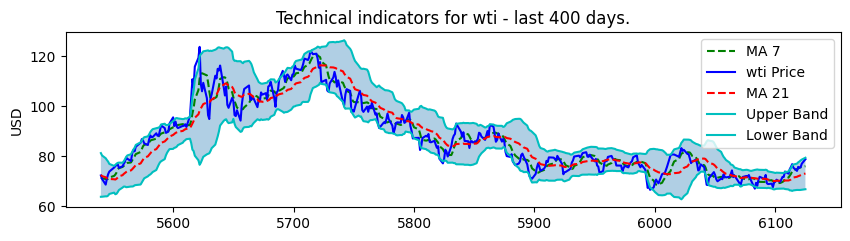

        date    wti    GP       coal  solarthermal  solarpvthermalhybrid  \
0 2006-11-13  58.59  7.26  47.750000        4063.0                1007.0   
1 2006-11-14  58.28  7.42  47.400002        4063.0                1007.0   
2 2006-11-15  58.79  7.45  48.799999        4063.0                1007.0   
3 2006-11-16  56.23  7.59  48.450001        4063.0                1007.0   
4 2006-11-17  55.90  7.23  47.200001        4063.0                1007.0   

   solarpv  ...  lower_band        EMA  logmomentum  absolute of 3 comp  \
0   6281.0  ...   56.622668  59.060059     4.053349           82.805731   
1   6281.0  ...   56.528485  58.540020     4.047952           82.812135   
2   6281.0  ...   56.592219  58.706673     4.056816           82.818426   
3   6281.0  ...   56.226011  57.055558     4.011506           82.824606   
4   6281.0  ...   55.856246  56.285186     4.005513           82.830672   

   angle of 3 comp  absolute of 9 comp  angle of 9 comp  
0         0.027910           58.40

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


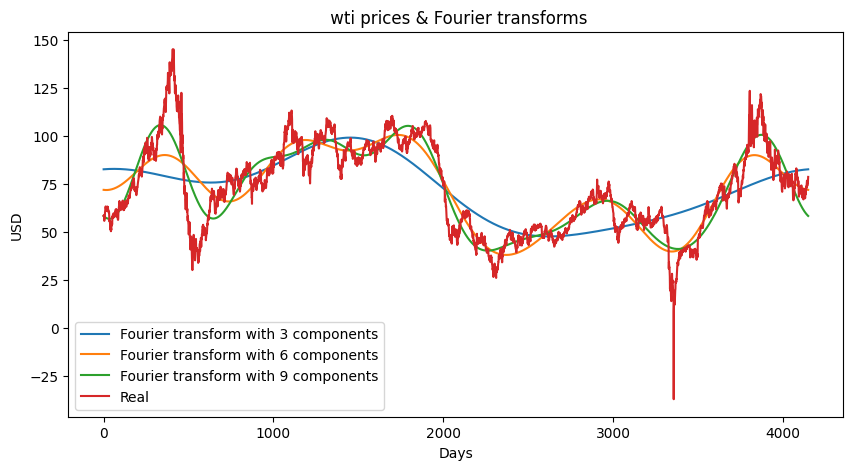

In [ ]:
# Calculate technical indicators
def get_technical_indicators(data):
    # Create 7 and 21 days Moving Average
    data['MA7'] = data.iloc[:,1].rolling(window=7).mean()
    data['MA21'] = data.iloc[:,1].rolling(window=21).mean()

    # Create MACD
    data['MACD'] = data.iloc[:,1].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 1].rolling(20).std()
    data['upper_band'] = data['MA21'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA21'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,1].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,1] - 1)

    return data
T_df = get_technical_indicators(filtered_df)

def plot_technical_indicators(dataset, last_days):
       plt.figure(figsize=(10, 5))
       shape_0 = dataset.shape[0]
       xmacd_ = shape_0 - last_days

       dataset = dataset.iloc[-last_days:, :]
       x_ = range(3, dataset.shape[0])
       x_ = list(dataset.index)

       # Plot first subplot
       plt.subplot(2, 1, 1)
       plt.plot(dataset['MA7'], label='MA 7', color='g', linestyle='--')
       plt.plot(dataset['wti'], label='wti Price', color='b')
       plt.plot(dataset['MA21'], label='MA 21', color='r', linestyle='--')
       plt.plot(dataset['upper_band'], label='Upper Band', color='c')
       plt.plot(dataset['lower_band'], label='Lower Band', color='c')
       plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
       plt.title('Technical indicators for wti - last {} days.'.format(last_days))
       plt.ylabel('USD')
       plt.legend()
       plt.savefig('TI_wti.jpg', format='jpeg', dpi=350)
       plt.show()

plot_technical_indicators(T_df, 400)
#Drop the first 21 rows
#For doing the fourier
dataset = T_df.iloc[20:,:].reset_index(drop=True)

#Getting the Fourier transform features
def get_fourier_transfer(dataset):
    # Get the columns for doing fourier
    data_FT = dataset[['date', 'wti']]

    close_fft = np.fft.fft(np.asarray(data_FT['wti'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_com_df = pd.DataFrame()
    for num_ in [3, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        fft_ = np.fft.ifft(fft_list_m10)
        fft_com = pd.DataFrame({'fft': fft_})
        fft_com['absolute of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.abs(x))
        fft_com['angle of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.angle(x))
        fft_com = fft_com.drop(columns='fft')
        fft_com_df = pd.concat([fft_com_df, fft_com], axis=1)

    return fft_com_df

#Get Fourier features
dataset_F = get_fourier_transfer(dataset)
Final_data = pd.concat([dataset, dataset_F], axis=1)


print(Final_data.head())


Final_data.to_csv("Finaldata_with_Fourier_wti.csv", index=False)



def plot_Fourier(dataset):
    data_FT = dataset[['date', 'wti']]

    close_fft = np.fft.fft(np.asarray(data_FT['wti'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    plt.figure(figsize=(10, 5))
    fft_list = np.asarray(fft_df['fft'].tolist())
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
    plt.plot(data_FT['wti'], label='Real')
    plt.xlabel('Days')
    plt.ylabel('USD')
    plt.title(' wti prices & Fourier transforms')
    plt.legend()
    plt.savefig('FOURRIER_wti.jpg', format='jpeg', dpi=350)
    plt.show()

plot_Fourier(dataset)



## Preprocessing

In [ ]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
# %% --------------------------------------- Load Data  -----------------------------------------------------------------
dataset = pd.read_csv('Finaldata_with_Fourier_wti.csv', parse_dates=['date'])
news = pd.read_csv("averaged_sentiment_wti.csv", parse_dates=["Date"])


In [ ]:
dataset

date    wti    GP        coal  solarthermal  solarpvthermalhybrid  \
0    2006-11-13  58.59  7.26   47.750000        4063.0                1007.0   
1    2006-11-14  58.28  7.42   47.400002        4063.0                1007.0   
2    2006-11-15  58.79  7.45   48.799999        4063.0                1007.0   
3    2006-11-16  56.23  7.59   48.450001        4063.0                1007.0   
4    2006-11-17  55.90  7.23   47.200001        4063.0                1007.0   
...         ...    ...   ...         ...           ...                   ...   
4146 2023-07-18  75.76  2.52  108.949997        8424.0                2513.0   
4147 2023-07-19  75.40  2.51  108.000000        8424.0                2513.0   
4148 2023-07-20  75.65  2.61  109.750000        8424.0                2513.0   
4149 2023-07-21  77.06  2.61  110.500000        8424.0                2513.0   
4150 2023-07-24  78.81  2.68  111.050003        8424.0                2513.0   

      solarpv  ...  lower_band        EMA  logmomentum  absolute of 3 comp  \
0      6281.0  ...   56.622668  59.060059     4.053349           82.805731   
1      6281.0  ...   56.528485  58.540020     4.047952           82.812135   
2      6281.0  ...   56.592219  58.706673     4.056816           82.818426   
3      6281.0  ...   56.226011  57.055558     4.011506           82.824606   
4      6281.0  ...   55.856246  56.285186     4.005513           82.830672   
...       ...  ...         ...        ...          ...                 ...   
4146  24718.0  ...   66.537557  75.404081     4.314283           82.772026   
4147  24718.0  ...   66.544010  75.401360     4.309456           82.778992   
4148  24718.0  ...   66.573942  75.567120     4.312811           82.785846   
4149  24718.0  ...   66.652837  76.562373     4.331523           82.792587   
4150  24718.0  ...   66.849756  78.060791     4.354270           82.799215   

      angle of 3 comp  absolute of 9 comp  angle of 9 comp  
0            0.027910           58.407432        -0.027556  
1            0.027682           58.327299        -0.027639  
2            0.027453           58.249444        -0.027717  
3            0.027224           58.173877        -0.027789  
4            0.026995           58.100609        -0.027854  
...               ...                 ...              ...  
4146         0.029042           58.841851        -0.027049  
4147         0.028817           58.750505        -0.027162  
4148         0.028591           58.661379        -0.027269  
4149         0.028364           58.574483        -0.027370  
4150         0.028137           58.489830        -0.027466  

[4151 rows x 48 columns]

## sentiment analysis

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
import numpy as np

news['Date'] = pd.to_datetime(news['Date'], format='%b %d, %Y')

# Calculate the confidence interval
news['confidence_interval'] = 1.96 * news['sentiment_score'].std() / np.sqrt(len(news))

# Calculate the moving average
news['sentiment_score_moving_avg'] = news['sentiment_score'].rolling(window=7).mean()

# Plot the sentiment_score over time with the confidence interval and moving average
plt.figure(figsize=(8, 4))
plt.plot(news['Date'], news['sentiment_score'], label='Sentiment Score',color='grey')
plt.plot(news['Date'], news['sentiment_score_moving_avg'], label='Moving Average',color='black')
plt.fill_between(news['Date'],
                 news['sentiment_score'] - news['confidence_interval'],
                 news['sentiment_score'] + news['confidence_interval'],
                 alpha=0.3, color='gray')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score over Time for wti')
year_formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(year_formatter)
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.savefig('sentimentscore_wti.jpg', format='jpeg', dpi=350)
plt.show()

In [ ]:
import pandas as pd
df1 = pd.read_csv('Finaldata_with_Fourier_wti.csv')
df2 = pd.read_csv('averaged_sentiment_wti.csv')
# Convert the 'date' column in df1 to a common format
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

# Convert the 'date' column in df2 to a common format
df2['Date'] = pd.to_datetime(df2['Date'], format='%b %d, %Y')
df2 = df2.rename(columns={'Date': 'date'})
import pandas as pd

# Merge the first two DataFrames
merged_df = pd.merge(df1, df2, on='date')


In [ ]:
merged_df.columns

Index(['date', 'wti', 'GP', 'coal', 'solarthermal', 'solarpvthermalhybrid',
       'solarpv', 'wind', 'hydropower', 'marineandtidal', 'bioenergy',
       'geothermal', 'bioenergyLCOE', 'geothermalLCOE', 'offshorewindLCOE',
       'solarphotovoltaicLCOE', 'concentratedsolarLCOE', 'hydropowerLCOE',
       'onshorewindLCOE', 'AC_HYD_E', 'AC_SOLAR_E', 'AC_WIND_E', 'GR', 'EPI',
       'TEMP', 'EEPH', 'co2_per_capita', 'TB', 'LTY', 'I', 'SRV', 'GOP',
       'GIPIO', 'M2', 'IPI', 'UMP', 'MA7', 'MA21', 'MACD', '20SD',
       'upper_band', 'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
       'angle of 3 comp', 'absolute of 9 comp', 'angle of 9 comp',
       'sentiment_score'],
      dtype='object')

In [ ]:
merged_df

date    wti    GP        coal  solarthermal  solarpvthermalhybrid  \
0    2009-07-24  66.96  3.37   67.750000        9470.0                2094.0   
1    2009-09-21  69.74  3.35   68.000000        9470.0                2094.0   
2    2009-09-24  65.74  3.56   68.250000        9470.0                2094.0   
3    2009-10-21  81.03  4.80   73.449997        9470.0                2094.0   
4    2009-12-02  76.62  4.67   76.650002        9470.0                2094.0   
...         ...    ...   ...         ...           ...                   ...   
2155 2023-07-14  75.44  2.50  104.150002        8424.0                2513.0   
2156 2023-07-18  75.76  2.52  108.949997        8424.0                2513.0   
2157 2023-07-20  75.65  2.61  109.750000        8424.0                2513.0   
2158 2023-07-21  77.06  2.61  110.500000        8424.0                2513.0   
2159 2023-07-24  78.81  2.68  111.050003        8424.0                2513.0   

      solarpv  ...        EMA  logmomentum  absolute of 3 comp  \
0     19150.0  ...  66.497994     4.189048           76.001229   
1     19150.0  ...  70.509094     4.230331           76.284639   
2     19150.0  ...  67.009966     4.170379           76.315017   
3     19150.0  ...  80.318167     4.382402           76.537492   
4     19150.0  ...  77.039591     4.325721           76.977884   
...       ...  ...        ...          ...                 ...   
2155  24718.0  ...  75.736733     4.309993           82.757756   
2156  24718.0  ...  75.404081     4.314283           82.772026   
2157  24718.0  ...  75.567120     4.312811           82.785846   
2158  24718.0  ...  76.562373     4.331523           82.792587   
2159  24718.0  ...  78.060791     4.354270           82.799215   

      angle of 3 comp  absolute of 9 comp  angle of 9 comp  sentiment_score  
0           -0.036077           57.633113         0.025320    -7.819159e-06  
1           -0.026261           60.745578         0.026600    -1.964745e-04  
2           -0.025485           61.074273         0.026334    -1.073899e-04  
3           -0.020478           63.393506         0.023656    -4.409052e-04  
4           -0.012597           67.511670         0.016968    -1.622744e-07  
...               ...                 ...              ...              ...  
2155         0.029491           59.031148        -0.026806    -9.395247e-01  
2156         0.029042           58.841851        -0.027049    -5.847864e-01  
2157         0.028591           58.661379        -0.027269    -1.012795e-02  
2158         0.028364           58.574483        -0.027370     9.996300e-01  
2159         0.028137           58.489830        -0.027466    -5.000216e-01  

[2160 rows x 49 columns]

## **with macroeconomic variables**
## will repeate all code

In [ ]:
# keep only these variables in merged_df : 'date', 'wti', 'GP', 'coal', 'GR', 'EPI', 'TB', 'LTY', 'I', 'SRV', 'GOP',
#        'GIPIO', 'M2', 'IPI', 'UMP', 'MA7', 'MA21', 'MACD', '20SD',
#        'upper_band', 'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
#        'angle of 3 comp', 'absolute of 9 comp', 'angle of 9 comp',
#        'sentiment_score'

cols_to_keep = ['date', 'wti', 'GP', 'coal', 'GR', 'EPI', 'TB', 'LTY', 'I', 'SRV', 'GOP',
       'GIPIO', 'M2', 'IPI', 'UMP', 'MA7', 'MA21', 'MACD', '20SD',
       'upper_band', 'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
       'angle of 3 comp', 'absolute of 9 comp', 'angle of 9 comp']

merged_df = merged_df[cols_to_keep]


In [ ]:
merged_df.columns

Index(['date', 'wti', 'GP', 'coal', 'solarthermal', 'solarpvthermalhybrid',
       'solarpv', 'wind', 'hydropower', 'marineandtidal', 'bioenergy',
       'geothermal', 'bioenergyLCOE', 'geothermalLCOE', 'offshorewindLCOE',
       'solarphotovoltaicLCOE', 'concentratedsolarLCOE', 'hydropowerLCOE',
       'onshorewindLCOE', 'AC_HYD_E', 'AC_SOLAR_E', 'AC_WIND_E', 'GR', 'EPI',
       'TEMP', 'EEPH', 'co2_per_capita', 'TB', 'LTY', 'I', 'SRV', 'GOP',
       'GIPIO', 'M2', 'IPI', 'UMP', 'MA7', 'MA21', 'MACD', '20SD',
       'upper_band', 'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
       'angle of 3 comp', 'absolute of 9 comp', 'angle of 9 comp',
       'sentiment_score'],
      dtype='object')

#Repeate codes here

In [ ]:
dataset = merged_df
# prompt: show only missing value in dataset

dataset[dataset.isnull().any(axis=1)]
# prompt: drop missing values from dataset

dataset = dataset.dropna()

In [ ]:
dataset = merged_df
# Check NA and fill them
dataset.isnull().sum()
dataset.iloc[:, 3:] = pd.concat([dataset.iloc[:, 2:].ffill(), dataset.iloc[:, 2:].bfill()]).groupby(level=0).mean()


In [ ]:
dataset.head()

date    wti    GP       coal  solarthermal  solarpvthermalhybrid  \
0 2009-07-24  66.96  3.37  67.750000        9470.0                2094.0   
1 2009-09-21  69.74  3.35  68.000000        9470.0                2094.0   
2 2009-09-24  65.74  3.56  68.250000        9470.0                2094.0   
3 2009-10-21  81.03  4.80  73.449997        9470.0                2094.0   
4 2009-12-02  76.62  4.67  76.650002        9470.0                2094.0   

   solarpv  ...        EMA  logmomentum  absolute of 3 comp  angle of 3 comp  \
0  19150.0  ...  66.497994     4.189048           76.001229        -0.036077   
1  19150.0  ...  70.509094     4.230331           76.284639        -0.026261   
2  19150.0  ...  67.009966     4.170379           76.315017        -0.025485   
3  19150.0  ...  80.318167     4.382402           76.537492        -0.020478   
4  19150.0  ...  77.039591     4.325721           76.977884        -0.012597   

   absolute of 9 comp  angle of 9 comp  sentiment_score  
0           57.633113         0.025320    -7.819159e-06  
1           60.745578         0.026600    -1.964745e-04  
2           61.074273         0.026334    -1.073899e-04  
3           63.393506         0.023656    -4.409052e-04  
4           67.511670         0.016968    -1.622744e-07  

[5 rows x 49 columns]

## GAN model

### preprocessing GAN

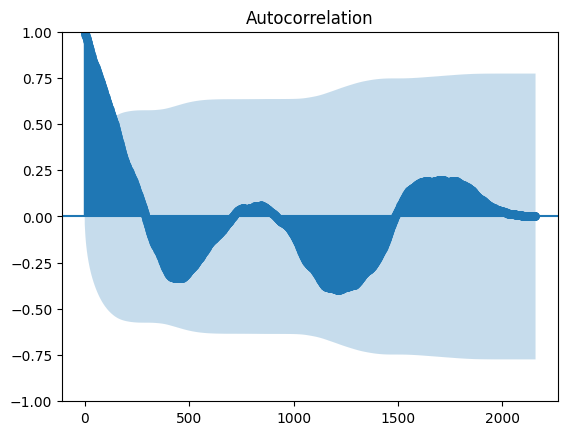

X shape:  (2156, 3, 48)
y shape:  (2156, 1)
X_train shape:  (1401, 3, 48)
y_train shape:  (1401, 1)
y_c_train shape:  (1401, 3, 1)
X_test shape:  (755, 3, 48)
y_test shape:  (755, 1)
y_c_test shape:  (755, 3, 1)
index_train shape: (1401,)
index_test shape: (755,)


In [ ]:
# %% --------------------------------------- Data Preprocessing  -----------------------------------------------------------------
import pandas as pd
# Set the date to datetime data
datetime_series = pd.to_datetime(dataset['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='date')
dataset = dataset.drop(columns='date')

# Get features and target
X_value = pd.DataFrame(dataset.iloc[:,:])
y_value = pd.DataFrame(dataset.iloc[:, 0])

# Autocorrelation Check
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=len(y_value)-1)
plt.show()

# Normalized the data
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))

# Reshape the data
'''Set the data input steps and output steps,
    we use 30 days data to predict 1 day price here,
    reshape it to (None, input_step, number of features) used for LSTM input'''
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1

# Get X/y dataset
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

# get the train test predict index
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

# Split train/test dataset
def split_train_test(data):
    train_size = round(len(X) * 0.65)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

# Get data and check shape
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)
# %% --------------------------------------- Save dataset -----------------------------------------------------------------
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("yc_train.npy", yc_train)
np.save("yc_test.npy", yc_test)
np.save('index_train.npy', index_train)
np.save('index_test.npy', index_test)
np.save('train_predict_index.npy', index_train)
np.save('test_predict_index.npy', index_test)



### define GAN (GRU-CNN)

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU,LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error


X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential()
    model.add(GRU(128, input_shape=(input_dim, feature_size), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='linear'))
    return model
def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net


model = make_discriminator_model()
print(model.summary())



/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)                   │ (None, 2, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 1, 64)               │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 1, 128)              │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 220)                 │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 220)                 │          48,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             221 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,301 (501.18 KB)

 Trainable params: 128,301 (501.18 KB)

 Non-trainable params: 0 (0.00 B)

None


### Train the GAN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 15, D_loss: 1.3828074932098389, G_loss: 0.6952763199806213
Epoch 30, D_loss: 1.384145736694336, G_loss: 0.6930242776870728
Epoch 45, D_loss: 1.3803130388259888, G_loss: 0.698527455329895
Epoch 60, D_loss: 1.3824973106384277, G_loss: 0.6980956196784973
Epoch 75, D_loss: 1.3793456554412842, G_loss: 0.6962127089500427
Epoch 90, D_loss: 1.3771159648895264, G_loss: 0.6972015500068665
Epoch 105, D_loss: 1.3755874633789062, G_loss: 0.6988811492919922
Epoch 120, D_loss: 1.3728886842727661, G_loss: 0.6958087682723999
Epoch 135, D_loss: 1.3675897121429443, G_loss: 0.700737714767456
Epoch 150, D_loss: 1.3636037111282349, G_loss: 0.7029659152030945
Epoch 165, D_loss: 1.3556346893310547, G_loss: 0.7166677713394165
Epoch 180, D_loss: 1.3462960720062256, G_loss: 0.7292292714118958
Epoch 195, D_loss: 1.3382283449172974, G_loss: 0.7533877491950989
Epoch 210, D_loss: 1.3365516662597656, G_loss: 0.7454679608345032
Epoch 225, D_loss: 1.3257359266281128, G_loss: 0.7390893697738647
Epoch 240, D_loss: 

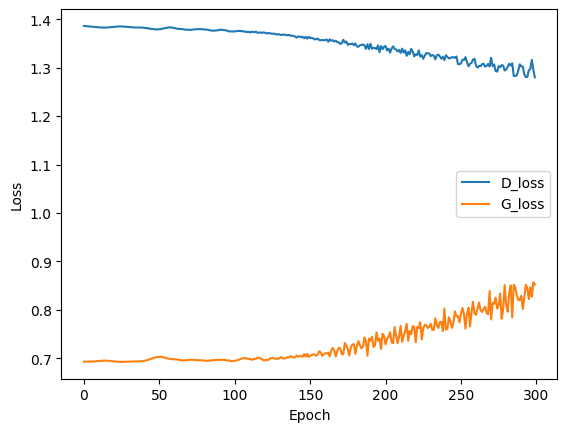

In [ ]:
class GAN:
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(self.generator, 'gen_model_3_1_%d.keras' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                print(f'Epoch {epoch + 1}, D_loss: {loss["d_loss"].numpy()}, G_loss: {loss["g_loss"].numpy()}')

            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price)


if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]

    # For Bayesian
    opt = {"lr": 0.00016, "epoch": 300, 'bs': 128}

    generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, opt)

### plot traing results

----- predicted price ----- [[-0.00547492]
 [ 0.12672752]
 [ 0.25259545]
 ...
 [-0.17140552]
 [-0.1709319 ]
 [-0.2057007 ]]
----- rescaled predicted price ----- [[65.96094 ]
 [73.54472 ]
 [80.76514 ]
 ...
 [56.44232 ]
 [56.469494]
 [54.47498 ]]
----- SHAPE rescaled predicted price ----- (1401, 1)


<ipython-input-66-59c6c035039e>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-66-59c6c035039e>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


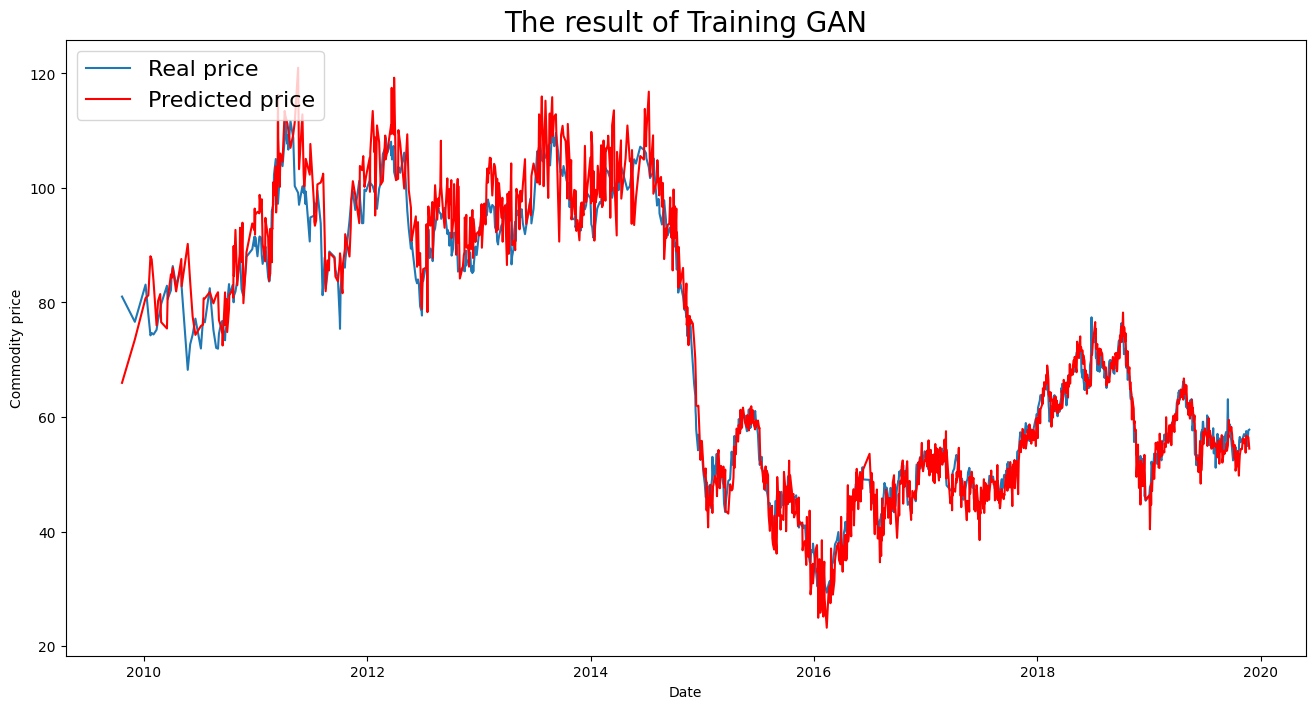

-- Train RMSE --  4.273061261947682


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------

# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)
test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Commodity price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training GAN", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Train RMSE -- ', RMSE)


In [ ]:
print('-- Train RMSE -- ', RMSE)

-- Train RMSE --  4.189531695521203


### TESTING RESULT GAN

<ipython-input-67-3790d87e4cf8>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-67-3790d87e4cf8>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


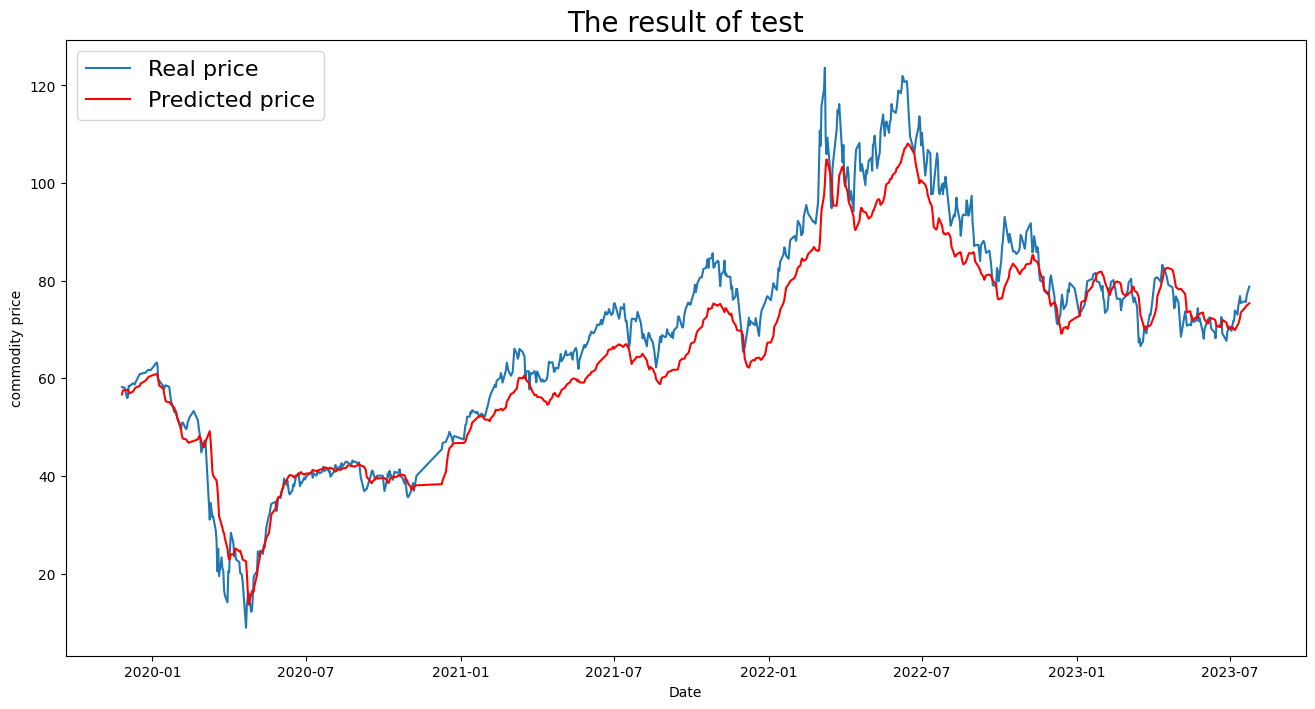

-- RMSE --  6.591060855440544


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from sklearn.metrics import mean_squared_error


########### Test dataset #########

# Load scaler/ index
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)

# Load test dataset/ model
G_model = tf.keras.models.load_model('gen_model_3_1_194.keras')
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of test", fontsize=20)
    plt.savefig('test_resultGAN.jpg', format='jpeg', dpi=350)
    plt.show()
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- RMSE -- ', RMSE)

    return predict_result, RMSE


test_predicted, test_RMSE = get_test_plot(X_test, y_test)



In [ ]:
 !pip install shap
 import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.6 MB/s eta 0:00:00


In [ ]:
# Assuming X_train is a representative sample of your training data
explainer = shap.DeepExplainer(G_model, X_train)
shap_values = explainer.shap_values(X_train)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


StagingError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py", line 269, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_TensorListStack


### export results

In [ ]:
import pandas as pd
from pickle import load


# 1. Reshape and Inverse Transform
y_predicted = G_model(X_test)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(y_predicted.numpy().reshape(-1, 1))  # Reshape and convert to numpy

# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price GAN GRU'])

# 3. Align Indices (adjust based on your original data index)
# Assuming 'test_predict_index' is available and corresponds to the time index
df_y_test.index = test_predict_index
df_predicted.index = test_predict_index

# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted], axis=1)
combined_df.index.name = 'Date'
print(combined_df.head())  # Display the first few rows

combined_df.to_excel("pred_act_GAN_GRU_CNN_macro_wti.xlsx")


            Real Price  Predicted Price GAN GRU
Date                                           
2019-12-18       60.93                58.216431
2019-12-24       61.17                58.736122
2019-12-27       61.76                59.359085
2019-12-30       61.66                59.761639
2020-01-06       63.27                60.151951


### define GAN(LSTM-CNN)

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU,LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error


X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential()
    model.add(LSTM(128, input_shape=(input_dim, feature_size), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='linear'))
    return model
def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net


model = make_discriminator_model()
print(model.summary())



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 2, 32)             128       
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 64)             10304     
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 128)            41088     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 220)               28160     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 220)               0         
                                                                 
 dense_8 (Dense)             (None, 220)              

### Train the GAN

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 15, D_loss: 1.3798933029174805, G_loss: 0.6966314315795898
Epoch 30, D_loss: 1.3744025230407715, G_loss: 0.6975725889205933
Epoch 45, D_loss: 1.3767530918121338, G_loss: 0.6924638152122498
Epoch 60, D_loss: 1.372930645942688, G_loss: 0.6968268156051636
Epoch 75, D_loss: 1.347782850265503, G_loss: 0.7119304537773132
Epoch 90, D_loss: 1.378085970878601, G_loss: 0.6881726384162903
Epoch 105, D_loss: 1.3096966743469238, G_loss: 0.7345777750015259
Epoch 120, D_loss: 1.4245221614837646, G_loss: 0.6218056082725525
Epoch 135, D_loss: 1.2909471988677979, G_loss: 0.7813863158226013
Epoch 150, D_loss: 1.44478178024292, G_loss: 0.5790529847145081
Epoch 165, D_loss: 1.2187243700027466, G_loss: 0.8927309513092041
Epoch 180, D_loss: 1.4398224353790283, G_loss: 0.5234218835830688
Epoch 195, D_loss: 1.2257928848266602, G_loss: 0.884934663772583
Epoch 210, D_loss: 1.4080357551574707, G_loss: 0.5959867835044861
Epoch 225, D_loss: 1.3024877309799194, G_loss: 0.9166192412376404
Epoch 240, D_loss: 1.1

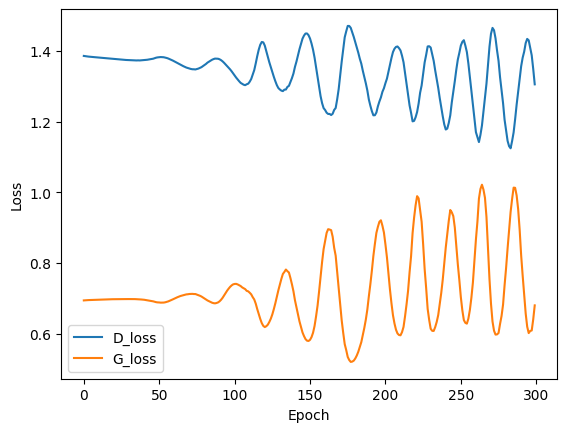

In [ ]:
class GAN:
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(self.generator, 'gen_model_3_1_%d.keras' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                print(f'Epoch {epoch + 1}, D_loss: {loss["d_loss"].numpy()}, G_loss: {loss["g_loss"].numpy()}')

            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price)


if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]

    # For Bayesian
    opt = {"lr": 0.00016, "epoch": 300, 'bs': 128}

    generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, opt)

###Plot Train results

----- predicted price ----- [[0.32442805]
 [0.3154402 ]
 [0.3670275 ]
 ...
 [0.08833293]
 [0.06332091]
 [0.07860605]]
----- rescaled predicted price ----- [[69.38482 ]
 [68.663   ]
 [72.80598 ]
 ...
 [50.424015]
 [48.415302]
 [49.64285 ]]
----- SHAPE rescaled predicted price ----- (1414, 1)


<ipython-input-21-59c6c035039e>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-21-59c6c035039e>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


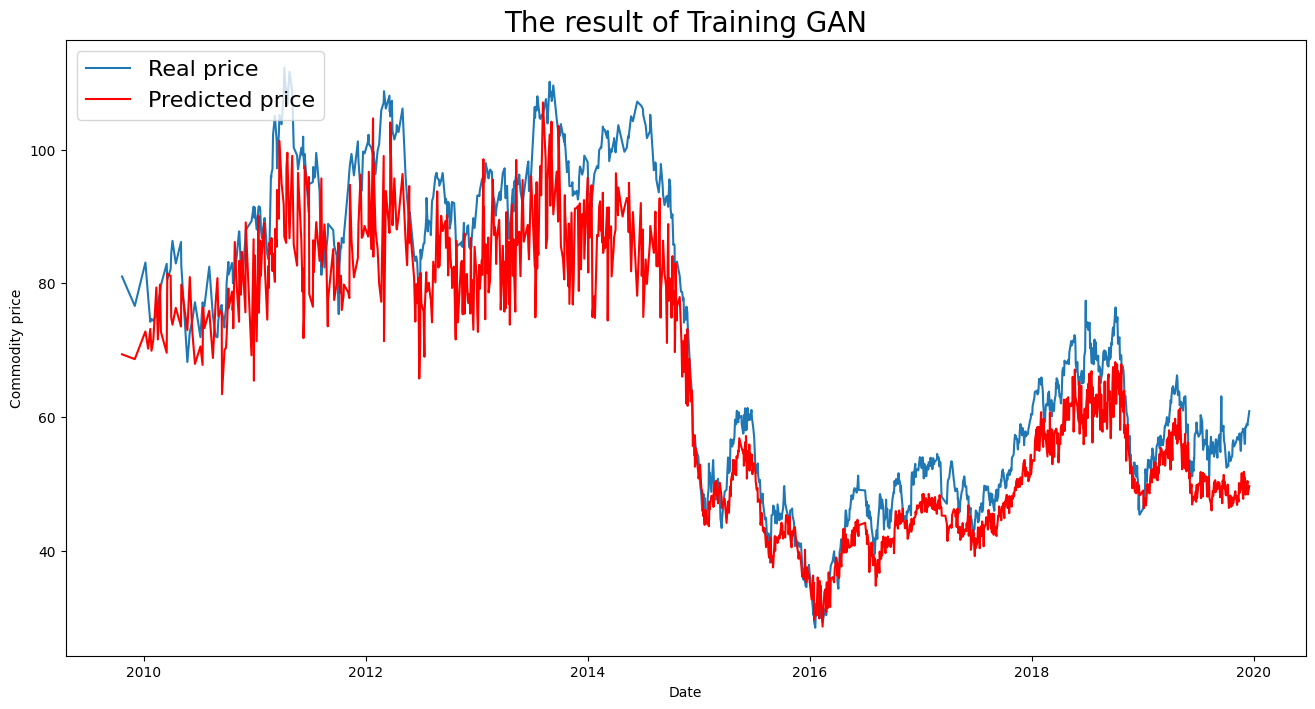

-- Train RMSE --  8.300485665036758


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------

# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)
test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Commodity price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training GAN", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Train RMSE -- ', RMSE)


### Testing result GAN

<ipython-input-22-db0841eb51dc>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-22-db0841eb51dc>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


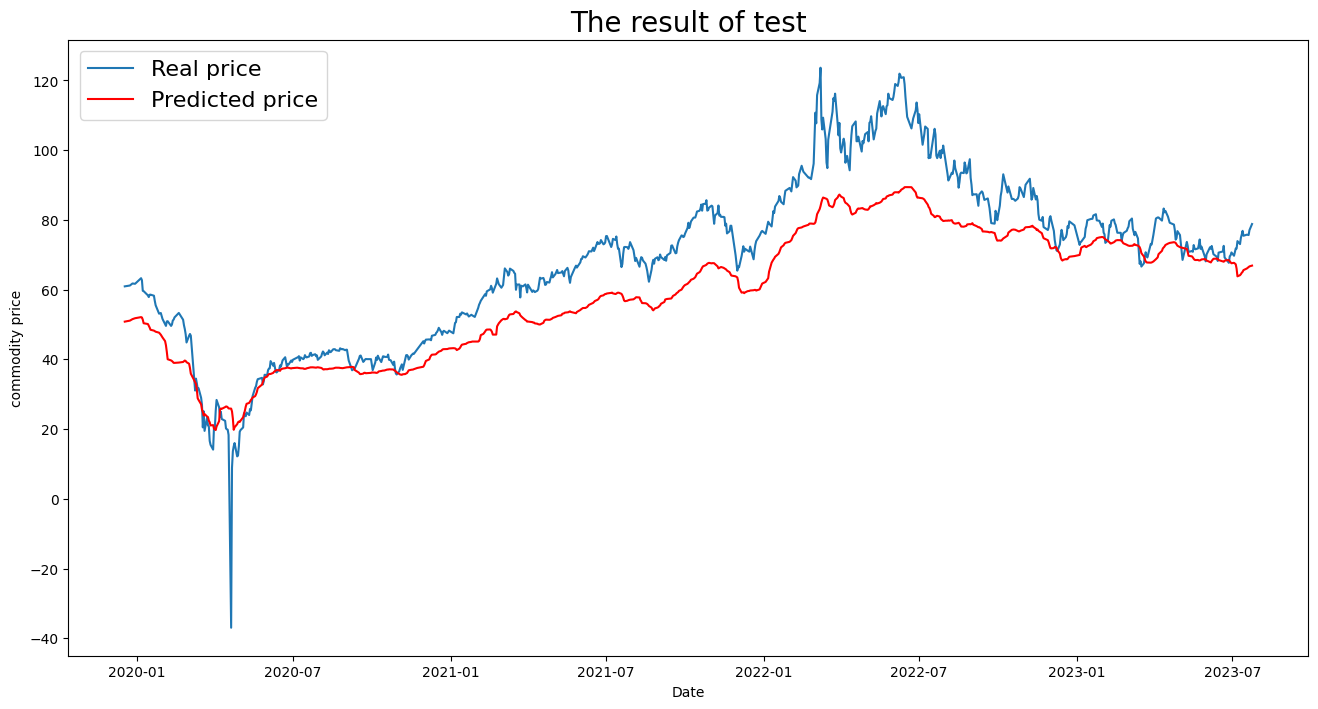

-- RMSE --  12.510666646645946


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from sklearn.metrics import mean_squared_error


########### Test dataset #########

# Load scaler/ index
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)

# Load test dataset/ model
G_model = tf.keras.models.load_model('gen_model_3_1_299.keras')
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of test", fontsize=20)
    plt.savefig('test_resultGAN.jpg', format='jpeg', dpi=350)
    plt.show()
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- RMSE -- ', RMSE)

    return predict_result, RMSE


test_predicted, test_RMSE = get_test_plot(X_test, y_test)



In [ ]:
!pip install shap
import shap


explainer = shap.KernelExplainer(G_model, X_train_reshaped)
shap_values = explainer.shap_values(X_train_reshaped)

Provided model function fails when applied to the provided data set.


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input [[ 0.29423484 -0.8189081  -0.8189081  ... -0.3369058  -0.36694464
   0.7179791 ]
 [ 0.32885072 -0.82068354 -0.82068354 ... -0.28223532 -0.29637656
   0.6457269 ]
 [ 0.2790437  -0.8020417  -0.8020417  ... -0.1963314  -0.17113806
   0.46927953]
 ...
 [ 0.18839496 -0.9023524  -0.9023524  ... -0.97947174 -0.8369795
  -0.88388073]
 [ 0.18789689 -0.90324014 -0.90324014 ... -0.9776829  -0.8415776
  -0.8814901 ]
 [ 0.19499439 -0.92543274 -0.92543274 ... -0.97676104 -0.84385556
  -0.880026  ]]. Expected shape (None, 3, 48), but input has incompatible shape (1414, 144)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1414, 144), dtype=float32)
  • training=None
  • mask=None

### export results

In [ ]:
import pandas as pd
from pickle import load


# 1. Reshape and Inverse Transform
y_predicted = G_model(X_test)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(y_predicted.numpy().reshape(-1, 1))  # Reshape and convert to numpy

# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price GAN LSTM'])

# 3. Align Indices (adjust based on your original data index)
# Assuming 'test_predict_index' is available and corresponds to the time index
df_y_test.index = test_predict_index
df_predicted.index = test_predict_index

# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted], axis=1)
combined_df.index.name = 'Date'
print(combined_df.head())  # Display the first few rows

combined_df.to_excel("pred_act_GAN_LSTM_CNN_macro_wti.xlsx")


            Real Price  Predicted Price GAN LSTM
Date                                            
2019-12-18       60.93                 50.814915
2019-12-24       61.17                 51.103298
2019-12-27       61.76                 51.530094
2019-12-30       61.66                 51.789886
2020-01-06       63.27                 52.107677


##LSTM

###  Baseline LSTM

Epoch 1/50
23/23 - 5s - loss: 0.1030 - val_loss: 0.2183 - 5s/epoch - 226ms/step
Epoch 2/50
23/23 - 0s - loss: 0.2770 - val_loss: 0.3417 - 480ms/epoch - 21ms/step
Epoch 3/50
23/23 - 1s - loss: 0.1393 - val_loss: 0.0262 - 718ms/epoch - 31ms/step
Epoch 4/50
23/23 - 1s - loss: 0.0447 - val_loss: 0.0310 - 667ms/epoch - 29ms/step
Epoch 5/50
23/23 - 1s - loss: 0.0214 - val_loss: 0.0199 - 609ms/epoch - 26ms/step
Epoch 6/50
23/23 - 1s - loss: 0.0028 - val_loss: 0.0085 - 693ms/epoch - 30ms/step
Epoch 7/50
23/23 - 1s - loss: 0.0038 - val_loss: 0.0212 - 609ms/epoch - 26ms/step
Epoch 8/50
23/23 - 0s - loss: 0.0046 - val_loss: 0.0080 - 338ms/epoch - 15ms/step
Epoch 9/50
23/23 - 0s - loss: 0.0065 - val_loss: 0.0240 - 335ms/epoch - 15ms/step
Epoch 10/50
23/23 - 0s - loss: 0.0083 - val_loss: 0.0100 - 340ms/epoch - 15ms/step
Epoch 11/50
23/23 - 0s - loss: 0.0102 - val_loss: 0.0295 - 343ms/epoch - 15ms/step
Epoch 12/50
23/23 - 0s - loss: 0.0133 - val_loss: 0.0109 - 348ms/epoch - 15ms/step
Epoch 13/50
23/

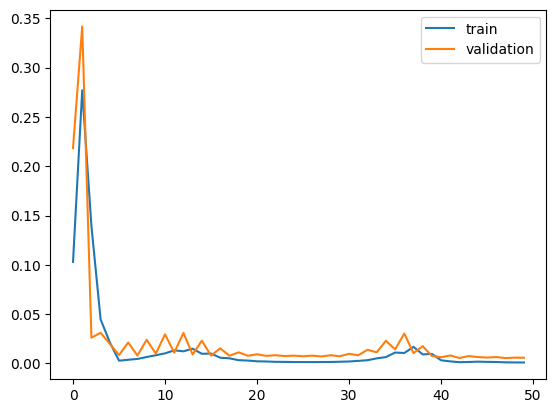

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               158720    
 al)                                                             
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 175233 (684.50 KB)
Trainable params: 175233 (684.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
0.07618664011046108


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot
from pickle import load

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model

model = basic_lstm(input_dim, feature_size)
model.save('LSTM_3to1.keras')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

### plot train results

<ipython-input-25-4795d543c8dd>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-25-4795d543c8dd>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


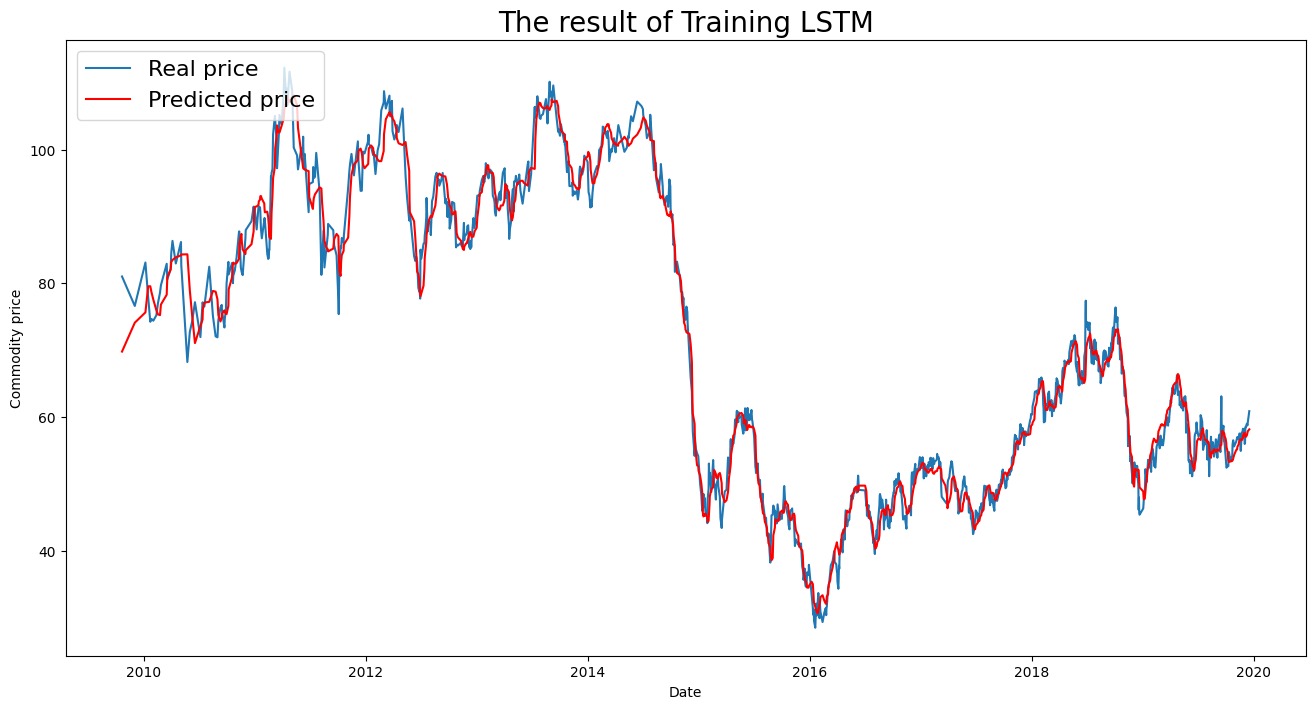

----- Train_RMSE_LSTM ----- 2.493500201530485


In [ ]:
# %% --------------------------------------- Plot the TRAIN result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):


    train_yhat = model.predict(X_train, verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
    #
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training LSTM", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

### testing tesults LSTM

<ipython-input-26-98329db18c19>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-26-98329db18c19>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


            predicted_price  predicted_price  predicted_price  \
2023-07-07              NaN              NaN              NaN   
2023-07-10              NaN              NaN              NaN   
2023-07-11              NaN              NaN              NaN   
2023-07-12              NaN              NaN              NaN   
2023-07-13              NaN              NaN              NaN   
2023-07-14              NaN              NaN              NaN   
2023-07-18              NaN              NaN              NaN   
2023-07-20              NaN              NaN              NaN   
2023-07-21              NaN              NaN              NaN   
2023-07-24              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2023-07-07              NaN              NaN              NaN   
2023-07-10              NaN              NaN              NaN   
2023-07-11              NaN              NaN              NaN   
2023-07-12              

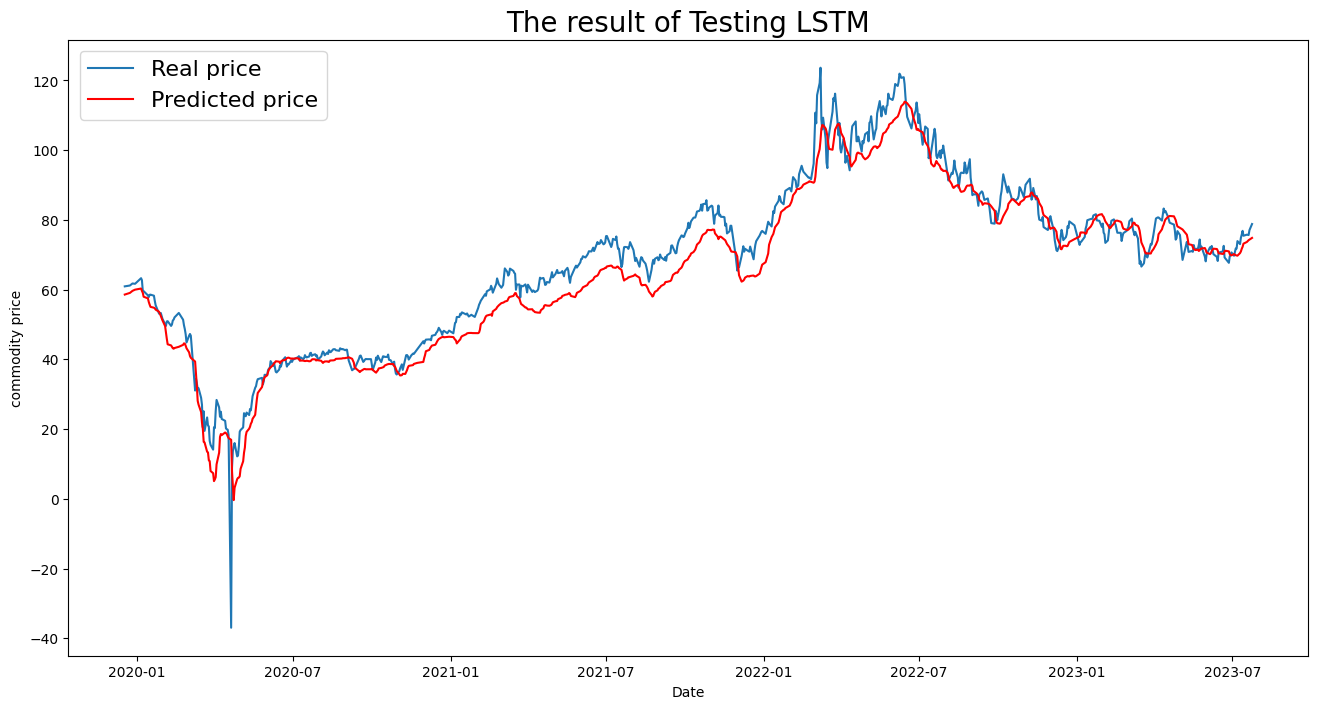

----- Test_RMSE_LSTM ----- 6.118548697101949


In [ ]:
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    print(predict_result.tail(10))

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing LSTM", fontsize=20)
    plt.savefig('test_resultLSTM_coal.jpg', format='jpeg', dpi=350)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE
test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)

### export results

In [ ]:
import pandas as pd
# 1. Reshape and Inverse Transform
yhat = model.predict(X_test, verbose=0)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(yhat.reshape(-1, 1))  # Reshape
test_dates = dataset.index[-len(y_test):]
# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price'])

df_y_test = pd.DataFrame({'Date': test_dates, 'Real Price': rescaled_y_test.flatten()})
df_predicted_y = pd.DataFrame({'Predicted Value LSTM': rescaled_predicted_y.flatten()})
# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted_y], axis=1)
# Reset the index to make 'Date' a regular column
combined_df = combined_df.reset_index()

# Get the index of the 'Date' column
date_index = combined_df.columns.get_loc('Date')

# Delete the column before 'Date'
if date_index > 0:
  column_to_delete = combined_df.columns[date_index - 1]
  combined_df = combined_df.drop(column_to_delete, axis=1)

# Set 'Date' back as the index
combined_df = combined_df.set_index('Date')


print(combined_df.head())  # Display the first few rows


combined_df.to_excel("pred_act_LSTM_macro_wti.xlsx")

            Real Price  Predicted Value LSTM
Date                                        
2019-12-18       60.93             58.577911
2019-12-24       61.17             59.052547
2019-12-27       61.76             59.639748
2019-12-30       61.66             59.983894
2020-01-06       63.27             60.306557


## GRU

### Baseline GRU

Epoch 1/50
12/12 - 15s - loss: 0.1900 - val_loss: 0.0762 - 15s/epoch - 1s/step
Epoch 2/50
12/12 - 0s - loss: 0.0815 - val_loss: 0.0399 - 382ms/epoch - 32ms/step
Epoch 3/50
12/12 - 0s - loss: 0.0387 - val_loss: 0.0247 - 404ms/epoch - 34ms/step
Epoch 4/50
12/12 - 0s - loss: 0.0159 - val_loss: 0.0191 - 208ms/epoch - 17ms/step
Epoch 5/50
12/12 - 0s - loss: 0.0066 - val_loss: 0.0172 - 210ms/epoch - 17ms/step
Epoch 6/50
12/12 - 0s - loss: 0.0035 - val_loss: 0.0160 - 242ms/epoch - 20ms/step
Epoch 7/50
12/12 - 0s - loss: 0.0029 - val_loss: 0.0157 - 219ms/epoch - 18ms/step
Epoch 8/50
12/12 - 0s - loss: 0.0028 - val_loss: 0.0156 - 208ms/epoch - 17ms/step
Epoch 9/50
12/12 - 0s - loss: 0.0026 - val_loss: 0.0154 - 258ms/epoch - 21ms/step
Epoch 10/50
12/12 - 0s - loss: 0.0026 - val_loss: 0.0150 - 246ms/epoch - 21ms/step
Epoch 11/50
12/12 - 0s - loss: 0.0025 - val_loss: 0.0147 - 224ms/epoch - 19ms/step
Epoch 12/50
12/12 - 0s - loss: 0.0025 - val_loss: 0.0144 - 208ms/epoch - 17ms/step
Epoch 13/50
12/1

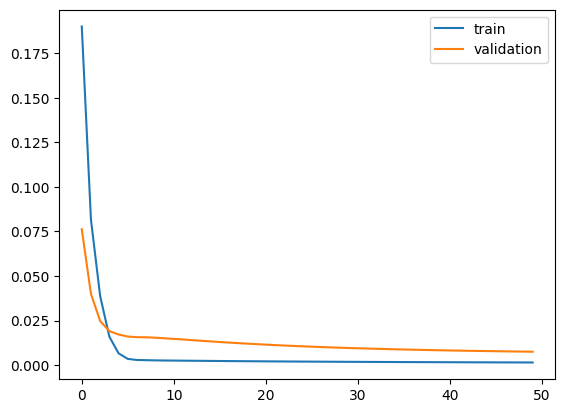

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 3, 128)            59904     
                                                                 
 gru_4 (GRU)                 (None, 64)                37248     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 99265 (387.75 KB)
Trainable params: 99265 (387.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


0.0866466611712777


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot
from pickle import load

# Load data
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

# Parameters
LR = 0.0001
BATCH_SIZE = 128
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]


def basic_GRU(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
    model = Sequential()
    model.add(GRU(units=128, return_sequences = True, input_shape=(input_dim, feature_size)))  # 256, return_sequences = True
    # model.add(GRU(units=256, recurrent_dropout = 0.2)) #, return_sequences = True
    model.add(GRU(units=64, input_shape=(input_dim, feature_size)))
    #model.add(Dense(128))
    model.add(Dense(32))
    # model.add(Dense(32))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate=LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model


model = basic_GRU(input_dim, output_dim, feature_size)
print(model.summary())
model.save('GRU_30to3.h5')

yhat = model.predict(X_test, verbose=0)
# print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)


### plot Training results

<ipython-input-29-6e68c62c1067>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-29-6e68c62c1067>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


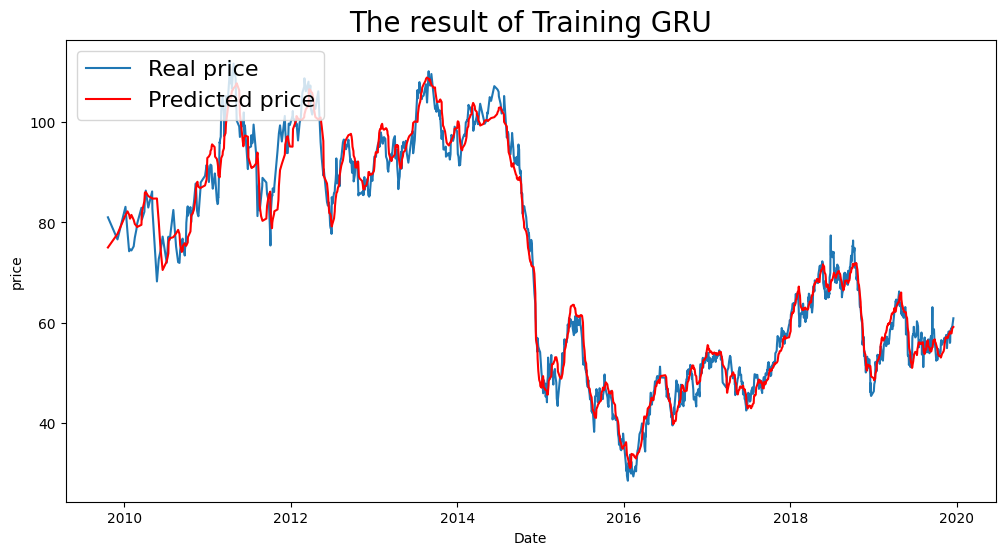

----- Train_RMSE_GRU ----- 3.0571613263848563


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):
    train_yhat = model.predict(X_train, verbose=0)

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(12, 6))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training GRU", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_GRU -----", train_RMSE)

### testing results GRU

<ipython-input-30-45bd035c2624>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-30-45bd035c2624>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


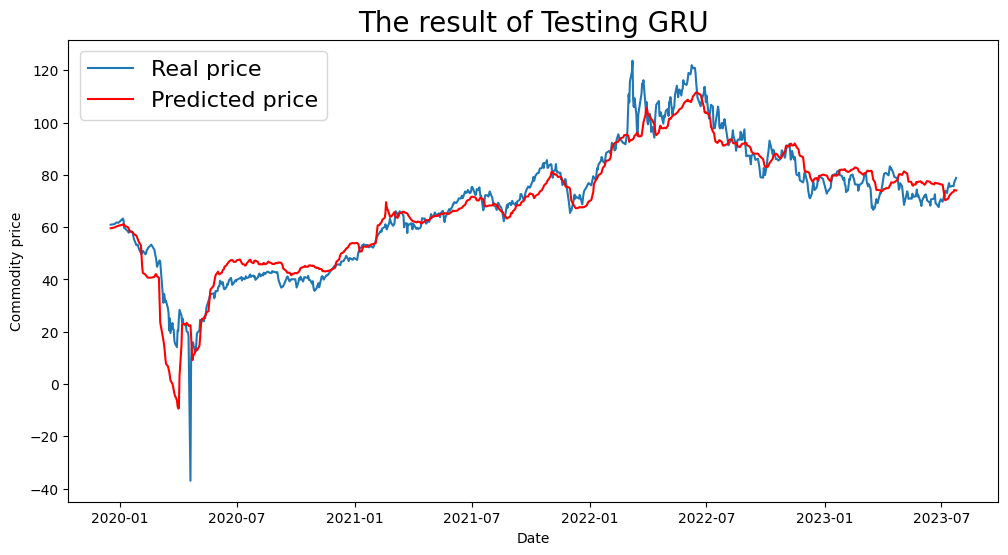

----- Test_RMSE_GRU ----- 6.958593287929141


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(12, 6))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing GRU", fontsize=20)
    plt.savefig('test_resultGRU_coal.jpg', format='jpeg', dpi=350)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE


test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_GRU -----", test_RMSE)

### export results

In [ ]:
import pandas as pd
# 1. Reshape and Inverse Transform
yhat = model.predict(X_test, verbose=0)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(yhat.reshape(-1, 1))  # Reshape
test_dates = dataset.index[-len(y_test):]
# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price'])

df_y_test = pd.DataFrame({'Date': test_dates, 'Real Price': rescaled_y_test.flatten()})
df_predicted_y = pd.DataFrame({'Predicted Price GRU wti': rescaled_predicted_y.flatten()})
# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted_y], axis=1)

# Get the index of the 'Date' column
date_index = combined_df.columns.get_loc('Date')

# Delete the column before 'Date'
if date_index > 0:
  column_to_delete = combined_df.columns[date_index - 1]
  combined_df = combined_df.drop(column_to_delete, axis=1)

# Set 'Date' back as the index
combined_df = combined_df.set_index('Date')

print(combined_df.head())  # Display the first few rows


combined_df.to_excel("pred_act_GRU_macro_wti.xlsx")

            Real Price  Predicted Price GRU wti
Date                                           
2019-12-18       60.93                59.572155
2019-12-24       61.17                59.877880
2019-12-27       61.76                60.239876
2019-12-30       61.66                60.546680
2020-01-06       63.27                60.924381


## plot all results

In [ ]:
import pandas as pd

# Read the Excel files
df1 = pd.read_excel("pred_act_GAN_LSTM_CNN_macro_wti.xlsx")
df2 = pd.read_excel("pred_act_GAN_GRU_CNN_macro_wti.xlsx")
df3 = pd.read_excel("pred_act_GRU_macro_wti.xlsx")
df4 = pd.read_excel("pred_act_LSTM_macro_wti.xlsx")

# Now merge the dataframes on 'Date' and 'Real Value'
merged_df = df1.merge(df2, on=['Date', 'Real Price'], how='outer')
merged_df = merged_df.merge(df3, on=['Date', 'Real Price'], how='outer')
merged_df = merged_df.merge(df4, on=['Date', 'Real Price'], how='outer')

merged_df = merged_df.fillna(0)  # Replace 0 with an appropriate fill value if necessary

# Write the combined DataFrame to a new Excel file
merged_df.to_excel("all_predictions_macro_wti.xlsx", index=False)

### with macro

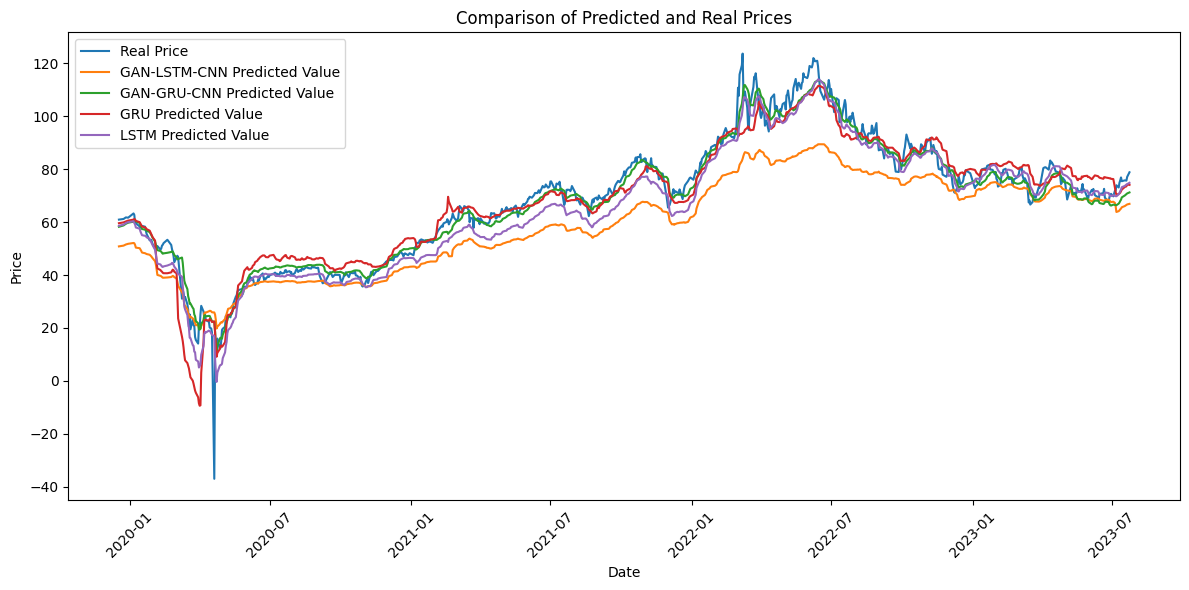

In [ ]:
# prompt: plot merged_df

import pandas as pd
import matplotlib.pyplot as plt
# Read the Excel file
merged_df = pd.read_excel("all_predictions_macro_wti.xlsx")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Real Price'], label='Real Price')
plt.plot(merged_df['Date'], merged_df['Predicted Price GAN LSTM'], label='GAN-LSTM-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Price GAN GRU'], label='GAN-GRU-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Price GRU wti'], label='GRU Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Value LSTM'], label='LSTM Predicted Value')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Comparison of Predicted and Real Prices")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
# Save the plot as JPEG
plt.savefig('price_predictions_comparison_macro_wti.jpeg', format='jpeg', dpi=300)

plt.show()




### with RE & SA

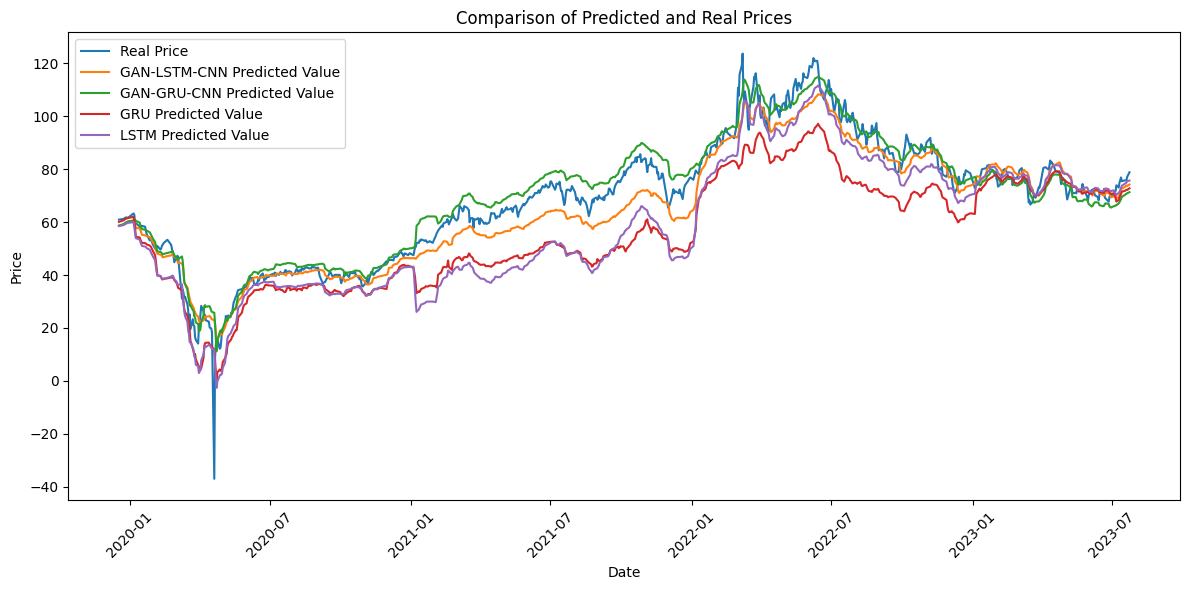

In [ ]:
# prompt: plot merged_df

import pandas as pd
import matplotlib.pyplot as plt
# Read the Excel file
merged_df = pd.read_excel("all_predictions_WTI_all.xlsx")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Real Price'], label='Real Price')
plt.plot(merged_df['Date'], merged_df['Predicted PriceGANLSTM'], label='GAN-LSTM-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted PriceGANGRU'], label='GAN-GRU-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted  Price GRU'], label='GRU Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Price LSTM'], label='LSTM Predicted Value')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Comparison of Predicted and Real Prices")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
# Save the plot as JPEG
plt.savefig('price_predictions_comparison.jpeg', format='jpeg', dpi=300)

plt.show()




# Natural Gas

## import dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
# %% --------------------------------------- Load Data  -----------------------------------------------------------------
dataset = pd.read_csv('Finaldata_with_Fourier_GP.csv', parse_dates=['date'])
news = pd.read_csv("averaged_sentiment_GP.csv", parse_dates=["Date"])


In [ ]:
dataset

date    wti    GP        coal  solarthermal  solarpvthermalhybrid  \
0    2006-11-13  58.59  7.26   47.750000        4063.0                1007.0   
1    2006-11-14  58.28  7.42   47.400002        4063.0                1007.0   
2    2006-11-15  58.79  7.45   48.799999        4063.0                1007.0   
3    2006-11-16  56.23  7.59   48.450001        4063.0                1007.0   
4    2006-11-17  55.90  7.23   47.200001        4063.0                1007.0   
...         ...    ...   ...         ...           ...                   ...   
4186 2023-07-18  75.76  2.52  108.949997        8424.0                2513.0   
4187 2023-07-19  75.40  2.51  108.000000        8424.0                2513.0   
4188 2023-07-20  75.65  2.61  109.750000        8424.0                2513.0   
4189 2023-07-21  77.06  2.61  110.500000        8424.0                2513.0   
4190 2023-07-24  78.81  2.68  111.050003        8424.0                2513.0   

      solarpv     wind  hydropower  marineandtidal  ...      MACD      20SD  \
0      6281.0   4141.0      1140.0           809.0  ... -0.007443  0.437004   
1      6281.0   4141.0      1140.0           809.0  ... -0.028570  0.402837   
2      6281.0   4141.0      1140.0           809.0  ... -0.046841  0.327560   
3      6281.0   4141.0      1140.0           809.0  ... -0.069931  0.325777   
4      6281.0   4141.0      1140.0           809.0  ... -0.063150  0.316149   
...       ...      ...         ...             ...  ...       ...       ...   
4186  24718.0  10773.0      2674.0          1585.0  ... -0.084050  0.135113   
4187  24718.0  10773.0      2674.0          1585.0  ... -0.079036  0.132724   
4188  24718.0  10773.0      2674.0          1585.0  ... -0.082185  0.120537   
4189  24718.0  10773.0      2674.0          1585.0  ... -0.083715  0.107678   
4190  24718.0  10773.0      2674.0          1585.0  ... -0.089544  0.084497   

      upper_band  lower_band       EMA  logmomentum  absolute of 3 comp  \
0       7.828770    6.080754  7.240798     1.834180            6.548677   
1       7.869484    6.258135  7.360266     1.859418            6.552691   
2       7.775597    6.465355  7.420089     1.864080            6.556690   
3       7.844411    6.541304  7.533363     1.885553            6.560676   
4       7.847060    6.582464  7.331121     1.829376            6.564647   
...          ...         ...       ...          ...                 ...   
4186    2.741655    2.201203  2.505095     0.418710            6.528392   
4187    2.754973    2.224075  2.508365     0.412110            6.532478   
4188    2.741551    2.259402  2.576122     0.476234            6.536549   
4189    2.733451    2.302740  2.598707     0.476234            6.540605   
4190    2.706613    2.368625  2.652902     0.518794            6.544648   

      angle of 3 comp  absolute of 9 comp  angle of 9 comp  
0            0.040375            4.291060        -0.004565  
1            0.040261            4.295265        -0.004400  
2            0.040146            4.299651        -0.004235  
3            0.040031            4.304218        -0.004069  
4            0.039915            4.308967        -0.003903  
...               ...                 ...              ...  
4186         0.040936            4.272738        -0.005377  
4187         0.040825            4.276043        -0.005216  
4188         0.040713            4.279527        -0.005055  
4189         0.040601            4.283191        -0.004892  
4190         0.040488            4.287035        -0.004729  

[4191 rows x 48 columns]

In [ ]:
import pandas as pd
df1 = pd.read_csv('Finaldata_with_Fourier_GP.csv')
df2 = pd.read_csv('averaged_sentiment_GP.csv')
# Convert the 'date' column in df1 to a common format
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

# Convert the 'date' column in df2 to a common format
df2['Date'] = pd.to_datetime(df2['Date'], format='%b %d, %Y')
df2 = df2.rename(columns={'Date': 'date'})
import pandas as pd

# Merge the first two DataFrames
merged_df = pd.merge(df1, df2, on='date')


In [ ]:
merged_df

date    wti    GP        coal  solarthermal  solarpvthermalhybrid  \
0   2009-09-22  71.50  3.37   69.000000        9470.0                2094.0   
1   2009-09-28  66.69  3.54   69.099998        9470.0                2094.0   
2   2009-09-30  70.46  3.25   70.900002        9470.0                2094.0   
3   2009-12-15  70.62  5.53   77.099998        9470.0                2094.0   
4   2010-02-17  77.27  5.47   74.400002       11170.0                2610.0   
..         ...    ...   ...         ...           ...                   ...   
884 2023-06-27  67.68  2.68  115.000000        8424.0                2513.0   
885 2023-07-11  74.87  2.57  105.900002        8424.0                2513.0   
886 2023-07-14  75.44  2.50  104.150002        8424.0                2513.0   
887 2023-07-19  75.40  2.51  108.000000        8424.0                2513.0   
888 2023-07-21  77.06  2.61  110.500000        8424.0                2513.0   

     solarpv     wind  hydropower  marineandtidal  ...      20SD  upper_band  \
0    19150.0  10773.0      2417.0          1774.0  ...  0.461931    3.687195   
1    19150.0  10773.0      2417.0          1774.0  ...  0.554156    4.018313   
2    19150.0  10773.0      2417.0          1774.0  ...  0.529852    4.046371   
3    19150.0  10773.0      2417.0          1774.0  ...  0.787409    5.831009   
4    24623.0  12010.0      2464.0          1810.0  ...  0.132748    5.782163   
..       ...      ...         ...             ...  ...       ...         ...   
884  24718.0  10773.0      2674.0          1585.0  ...  0.246984    2.599682   
885  24718.0  10773.0      2674.0          1585.0  ...  0.238890    2.827780   
886  24718.0  10773.0      2674.0          1585.0  ...  0.169566    2.774846   
887  24718.0  10773.0      2674.0          1585.0  ...  0.132724    2.754973   
888  24718.0  10773.0      2674.0          1585.0  ...  0.107678    2.733451   

     lower_band       EMA  logmomentum  absolute of 3 comp  angle of 3 comp  \
0      1.839472  3.355007     0.862890            5.290082        -0.047651   
1      1.801687  3.552037     0.932164            5.267818        -0.047325   
2      1.926963  3.294671     0.810930            5.256689        -0.047155   
3      2.681372  5.462578     1.510722            4.964121        -0.040963   
4      5.251170  5.512777     1.497388            4.738932        -0.033709   
..          ...       ...          ...                 ...              ...   
884    1.611746  2.617269     0.518794            6.469737         0.042427   
885    1.872220  2.558195     0.451076            6.507756         0.041482   
886    2.096582  2.505859     0.405465            6.520180         0.041156   
887    2.224075  2.508365     0.412110            6.532478         0.040825   
888    2.302740  2.598707     0.476234            6.540605         0.040601   

     absolute of 9 comp  angle of 9 comp  sentiment_score  
0              3.617257         0.001571        -0.000200  
1              3.616661         0.000761        -0.000003  
2              3.617067         0.000354         0.998071  
3              3.771273        -0.009219         0.000130  
4              4.020689        -0.012902        -0.251219  
..                  ...              ...              ...  
884            4.245089        -0.007502        -0.999983  
885            4.258893        -0.006164         1.000000  
886            4.266665        -0.005695        -0.995425  
887            4.276043        -0.005216        -0.999852  
888            4.283191        -0.004892        -0.534995  

[889 rows x 49 columns]

## with macroeconomic variables

will repeate all code

In [ ]:
dataset = merged_df
# Check NA and fill them
dataset.isnull().sum()
dataset.iloc[:, 3:] = pd.concat([dataset.iloc[:, 2:].ffill(), dataset.iloc[:, 2:].bfill()]).groupby(level=0).mean()


In [ ]:
dataset.head()

date    wti    GP  coal  solarthermal  solarpvthermalhybrid  solarpv  \
0 2009-09-22  71.50  3.37  3.37     69.000000                9470.0   2094.0   
1 2009-09-28  66.69  3.54  3.54     69.099998                9470.0   2094.0   
2 2009-09-30  70.46  3.25  3.25     70.900002                9470.0   2094.0   
3 2009-12-15  70.62  5.53  5.53     77.099998                9470.0   2094.0   
4 2010-02-17  77.27  5.47  5.47     74.400002               11170.0   2610.0   

      wind  hydropower  marineandtidal  ...      20SD  upper_band  lower_band  \
0  19150.0     10773.0          2417.0  ... -0.084286    0.461931    3.687195   
1  19150.0     10773.0          2417.0  ... -0.167279    0.554156    4.018313   
2  19150.0     10773.0          2417.0  ... -0.139191    0.529852    4.046371   
3  19150.0     10773.0          2417.0  ... -0.429431    0.787409    5.831009   
4  24623.0     12010.0          2464.0  ...  0.009947    0.132748    5.782163   

        EMA  logmomentum  absolute of 3 comp  angle of 3 comp  \
0  1.839472     3.355007            0.862890         5.290082   
1  1.801687     3.552037            0.932164         5.267818   
2  1.926963     3.294671            0.810930         5.256689   
3  2.681372     5.462578            1.510722         4.964121   
4  5.251170     5.512777            1.497388         4.738932   

   absolute of 9 comp  angle of 9 comp  sentiment_score  
0           -0.047651         3.617257         0.001571  
1           -0.047325         3.616661         0.000761  
2           -0.047155         3.617067         0.000354  
3           -0.040963         3.771273        -0.009219  
4           -0.033709         4.020689        -0.012902  

[5 rows x 49 columns]

In [ ]:
# keep only these variables in merged_df : 'date', 'wti', 'GP', 'coal', 'GR', 'EPI', 'TB', 'LTY', 'I', 'SRV', 'GOP',
#        'GIPIO', 'M2', 'IPI', 'UMP', 'MA7', 'MA21', 'MACD', '20SD',
#        'upper_band', 'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
#        'angle of 3 comp', 'absolute of 9 comp', 'angle of 9 comp',
#        '

cols_to_keep = ['date', 'wti', 'GP', 'coal', 'GR', 'EPI', 'TB', 'LTY', 'I', 'SRV', 'GOP',
       'GIPIO', 'M2', 'IPI', 'UMP', 'MA7', 'MA21', 'MACD', '20SD',
       'upper_band', 'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
       'angle of 3 comp', 'absolute of 9 comp', 'angle of 9 comp'
       ]

merged_df = merged_df[cols_to_keep]


In [ ]:
merged_df.head()

date    wti    GP  coal        GR        EPI     TB   LTY     I  \
0 2009-09-22  71.50  3.37  3.37  150.8270  87.292029  4.576  0.11  3.39   
1 2009-09-28  66.69  3.54  3.54  150.8270  87.292029  4.576  0.11  3.39   
2 2009-09-30  70.46  3.25  3.25  150.8270  87.292029  4.576  0.14  3.39   
3 2009-12-15  70.62  5.53  5.53  150.8270  87.292029  4.576  0.05  3.73   
4 2010-02-17  77.27  5.47  5.47  188.4685  94.218776  4.776  0.10  3.73   

        SRV  ...      MACD      20SD  upper_band  lower_band       EMA  \
0  1.640043  ...  2.763333 -0.084286    0.461931    3.687195  1.839472   
1  1.640043  ...  2.910000 -0.167279    0.554156    4.018313  1.801687   
2  1.640043  ...  2.986667 -0.139191    0.529852    4.046371  1.926963   
3  1.640043  ...  4.256190 -0.429431    0.787409    5.831009  2.681372   
4  3.156842  ...  5.516667  0.009947    0.132748    5.782163  5.251170   

   logmomentum  absolute of 3 comp  angle of 3 comp  absolute of 9 comp  \
0     3.355007            0.862890         5.290082           -0.047651   
1     3.552037            0.932164         5.267818           -0.047325   
2     3.294671            0.810930         5.256689           -0.047155   
3     5.462578            1.510722         4.964121           -0.040963   
4     5.512777            1.497388         4.738932           -0.033709   

   angle of 9 comp  
0         3.617257  
1         3.616661  
2         3.617067  
3         3.771273  
4         4.020689  

[5 rows x 27 columns]

## GAN Model

### preprocessing GAN

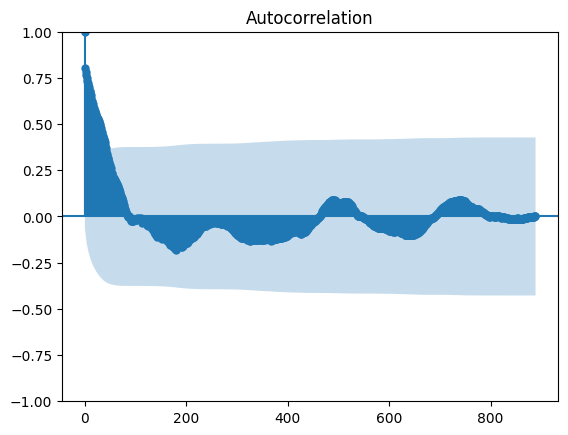

X shape:  (886, 3, 48)
y shape:  (886, 1)
X_train shape:  (576, 3, 48)
y_train shape:  (576, 1)
y_c_train shape:  (576, 3, 1)
X_test shape:  (310, 3, 48)
y_test shape:  (310, 1)
y_c_test shape:  (310, 3, 1)
index_train shape: (576,)
index_test shape: (310,)


In [ ]:
# %% --------------------------------------- Data Preprocessing  -----------------------------------------------------------------
import pandas as pd
# Set the date to datetime data
datetime_series = pd.to_datetime(dataset['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='date')
dataset = dataset.drop(columns='date')

# Get features and target
X_value = pd.DataFrame(dataset.iloc[:,:])
y_value = pd.DataFrame(dataset.iloc[:, 1])

# Autocorrelation Check
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=len(y_value)-1)
plt.show()

# Normalized the data
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))

# Reshape the data
'''Set the data input steps and output steps,
    we use 30 days data to predict 1 day price here,
    reshape it to (None, input_step, number of features) used for LSTM input'''
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1

# Get X/y dataset
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

# get the train test predict index
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

# Split train/test dataset
def split_train_test(data):
    train_size = round(len(X) * 0.65)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

# Get data and check shape
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)
# %% --------------------------------------- Save dataset -----------------------------------------------------------------
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("yc_train.npy", yc_train)
np.save("yc_test.npy", yc_test)
np.save('index_train.npy', index_train)
np.save('index_test.npy', index_test)
np.save('train_predict_index.npy', index_train)
np.save('test_predict_index.npy', index_test)



### define GAN GRU CNN

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU,LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error


X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential()
    model.add(GRU(128, input_shape=(input_dim, feature_size), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='linear'))
    return model
def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net


model = make_discriminator_model()
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             10304     
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            41088     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 220)               28160     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 220)               0         
                                                                 
 dense_1 (Dense)             (None, 220)               4

### Train the GAN

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 15, D_loss: 1.3827486038208008, G_loss: 0.6893002986907959
Epoch 30, D_loss: 1.3832061290740967, G_loss: 0.6874821782112122
Epoch 45, D_loss: 1.3714866638183594, G_loss: 0.7111793160438538
Epoch 60, D_loss: 1.3838443756103516, G_loss: 0.6917860507965088
Epoch 75, D_loss: 1.3606992959976196, G_loss: 0.7029378414154053
Epoch 90, D_loss: 1.3901164531707764, G_loss: 0.6588699817657471
Epoch 105, D_loss: 1.3525915145874023, G_loss: 0.7422583699226379
Epoch 120, D_loss: 1.3938074111938477, G_loss: 0.6683726906776428
Epoch 135, D_loss: 1.3229094743728638, G_loss: 0.7483487725257874
Epoch 150, D_loss: 1.4060628414154053, G_loss: 0.6299062371253967
Epoch 165, D_loss: 1.2998194694519043, G_loss: 0.8190827965736389
Epoch 180, D_loss: 1.363008737564087, G_loss: 0.6461360454559326
Epoch 195, D_loss: 1.3534600734710693, G_loss: 0.7221775650978088
Epoch 210, D_loss: 1.273841381072998, G_loss: 0.7994601726531982
Epoch 225, D_loss: 1.3009119033813477, G_loss: 0.7170388698577881
Epoch 240, D_loss:

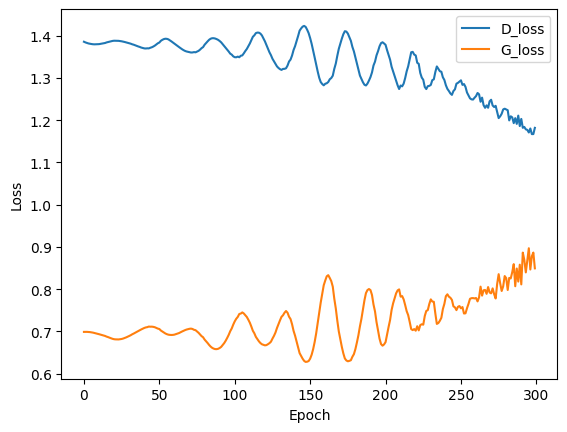

In [ ]:
class GAN:
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(self.generator, 'gen_model_3_1_%d.keras' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                print(f'Epoch {epoch + 1}, D_loss: {loss["d_loss"].numpy()}, G_loss: {loss["g_loss"].numpy()}')

            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price)


if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]

    # For Bayesian
    opt = {"lr": 0.00016, "epoch": 300, 'bs': 128}

    generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, opt)

### Plot train results

----- predicted price ----- [[-0.9352212 ]
 [-0.7610338 ]
 [-0.6917454 ]
 [-0.6997184 ]
 [-0.6975852 ]
 [-0.7919853 ]
 [-0.5891261 ]
 [-0.77455467]
 [-0.89230466]
 [-0.98526865]
 [-0.7586596 ]
 [-0.7304814 ]
 [-0.63508934]
 [-0.8138736 ]
 [-0.8681884 ]
 [-0.81291556]
 [-0.5735341 ]
 [-0.6921236 ]
 [-0.60325164]
 [-0.7122717 ]
 [-0.82652074]
 [-0.66098017]
 [-0.73300904]
 [-0.72453   ]
 [-0.6465568 ]
 [-0.799539  ]
 [-0.8572559 ]
 [-0.64988583]
 [-0.6376193 ]
 [-0.7564916 ]
 [-0.7838525 ]
 [-0.65317154]
 [-0.80478936]
 [-0.9017977 ]
 [-0.73800534]
 [-0.73438203]
 [-0.824625  ]
 [-0.78461397]
 [-0.8731436 ]
 [-0.5094697 ]
 [-0.7100659 ]
 [-0.8014437 ]
 [-0.78818655]
 [-0.7372939 ]
 [-0.64959157]
 [-0.82276016]
 [-0.83359474]
 [-0.55985755]
 [-0.7231191 ]
 [-0.68296665]
 [-0.6679742 ]
 [-0.71098936]
 [-0.8042564 ]
 [-0.6398787 ]
 [-0.77760196]
 [-0.63457674]
 [-0.6622386 ]
 [-0.6822733 ]
 [-0.8049492 ]
 [-0.71843773]
 [-0.8161306 ]
 [-0.7202597 ]
 [-0.8792191 ]
 [-0.7401796 ]
 [-0.6078018

<ipython-input-11-59c6c035039e>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-11-59c6c035039e>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


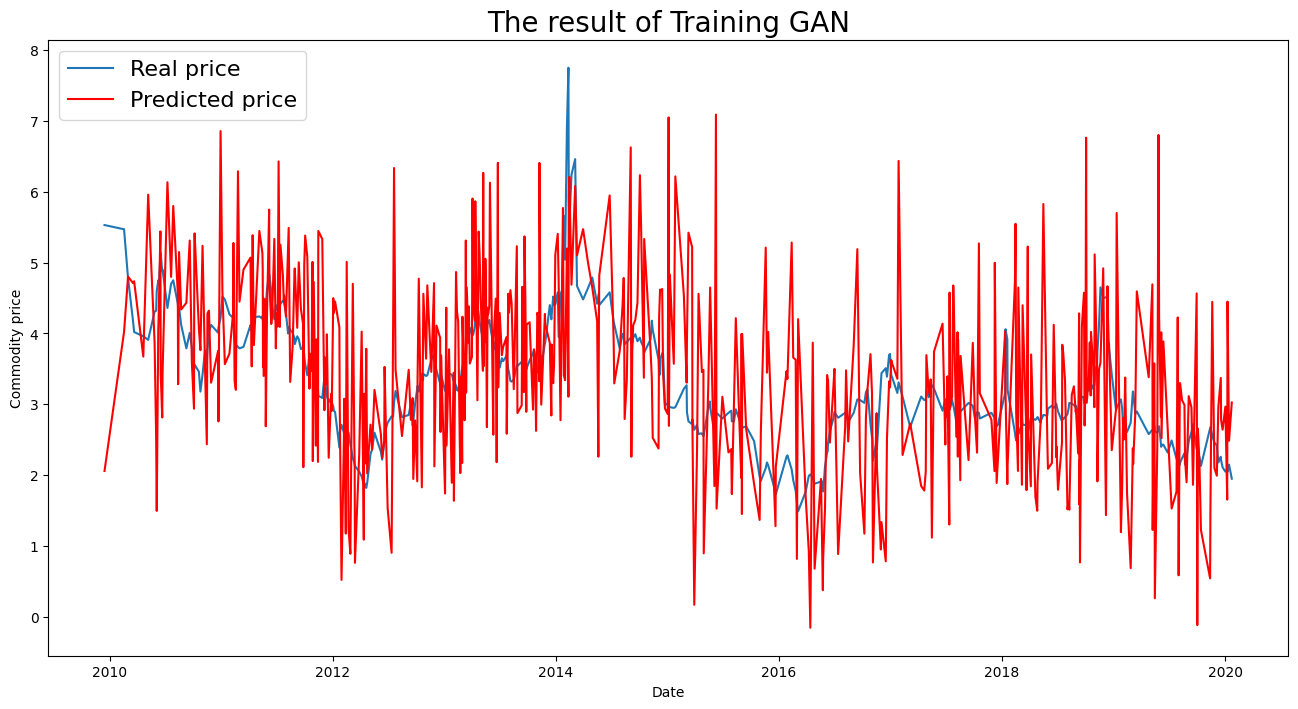

-- Train RMSE --  1.221169408380769


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------

# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)
test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Commodity price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training GAN", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Train RMSE -- ', RMSE)


### test Gan results

<ipython-input-12-db0841eb51dc>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-12-db0841eb51dc>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


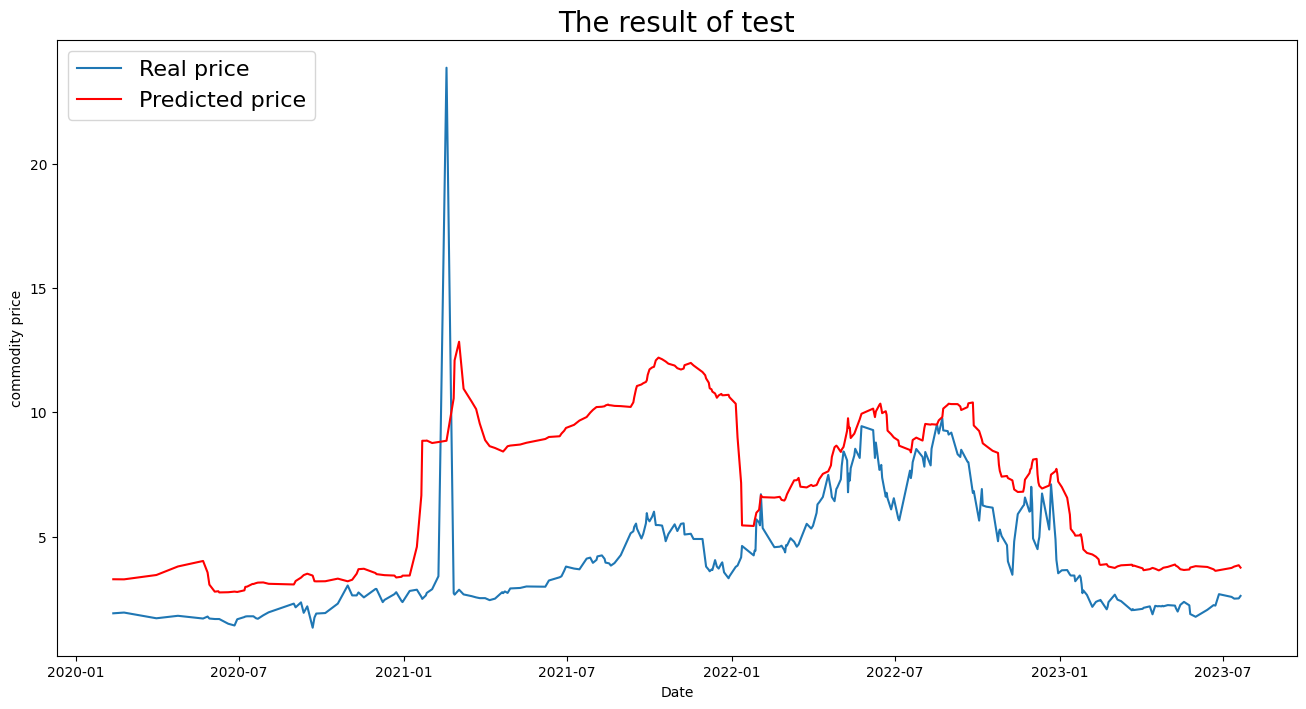

-- RMSE --  3.8372459873161775


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from sklearn.metrics import mean_squared_error


########### Test dataset #########

# Load scaler/ index
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)

# Load test dataset/ model
G_model = tf.keras.models.load_model('gen_model_3_1_299.keras')
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of test", fontsize=20)
    plt.savefig('test_resultGAN.jpg', format='jpeg', dpi=350)
    plt.show()
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- RMSE -- ', RMSE)

    return predict_result, RMSE


test_predicted, test_RMSE = get_test_plot(X_test, y_test)



### export results

In [ ]:
import pandas as pd
from pickle import load

# Assuming 'y_test', 'G_model', 'X_test', and 'y_scaler' are available from previous cells

# 1. Reshape and Inverse Transform
y_predicted = G_model(X_test)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(y_predicted.numpy().reshape(-1, 1))  # Reshape and convert to numpy

# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price'])

# 3. Align Indices (adjust based on your original data index)
# Assuming 'test_predict_index' is available and corresponds to the time index
df_y_test.index = test_predict_index
df_predicted.index = test_predict_index

# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted], axis=1)

print(combined_df.head())  # Display the first few rows
combined_df.to_excel("pred_act_GAN_GRU_CNN_GP.xlsx")

            Real Price  Predicted Price
2020-02-12        1.91         3.279969
2020-02-24        1.94         3.276332
2020-03-31        1.71         3.450932
2020-04-24        1.81         3.794509
2020-05-22        1.70         4.015324


### define GAN LSTM CNN

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU,LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error


X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential()
    model.add(LSTM(128, input_shape=(input_dim, feature_size), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='linear'))
    return model
def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net


model = make_discriminator_model()
print(model.summary())



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 2, 32)             128       
                                                                 
 conv1d_13 (Conv1D)          (None, 1, 64)             10304     
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 128)            41088     
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 220)               28160     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 220)               0         
                                                                 
 dense_15 (Dense)            (None, 220)              

### train the GAN

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 15, D_loss: 1.3616230487823486, G_loss: 0.7051068544387817
Epoch 30, D_loss: 1.3305683135986328, G_loss: 0.7171816229820251
Epoch 45, D_loss: 1.32944917678833, G_loss: 0.7003926038742065
Epoch 60, D_loss: 1.4220163822174072, G_loss: 0.5990017056465149
Epoch 75, D_loss: 1.4129738807678223, G_loss: 0.6332958936691284
Epoch 90, D_loss: 1.3730459213256836, G_loss: 0.6870965957641602
Epoch 105, D_loss: 1.3229726552963257, G_loss: 0.7205123901367188
Epoch 120, D_loss: 1.2664532661437988, G_loss: 0.7302778959274292
Epoch 135, D_loss: 1.376250982284546, G_loss: 0.6470432281494141
Epoch 150, D_loss: 1.3085947036743164, G_loss: 0.7348858714103699
Epoch 165, D_loss: 1.2009305953979492, G_loss: 0.8083510994911194
Epoch 180, D_loss: 1.4516077041625977, G_loss: 0.5755670070648193
Epoch 195, D_loss: 1.230617880821228, G_loss: 0.7965179085731506
Epoch 210, D_loss: 1.3197801113128662, G_loss: 0.6409048438072205
Epoch 225, D_loss: 1.5095170736312866, G_loss: 0.5911125540733337
Epoch 240, D_loss: 1

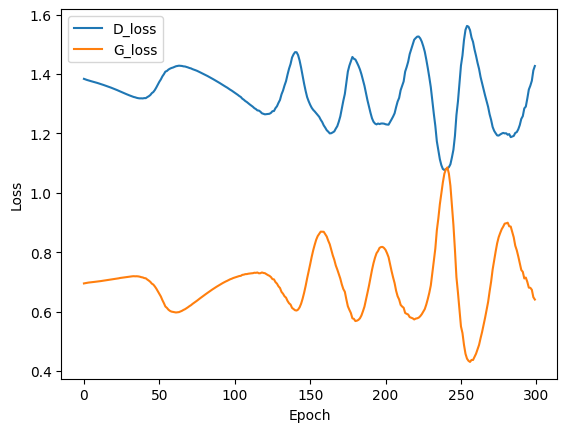

In [ ]:
class GAN:
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(self.generator, 'gen_model_3_1_%d.keras' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                print(f'Epoch {epoch + 1}, D_loss: {loss["d_loss"].numpy()}, G_loss: {loss["g_loss"].numpy()}')

            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price)


if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]

    # For Bayesian
    opt = {"lr": 0.00016, "epoch": 300, 'bs': 128}

    generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, opt)

### Plot train result

----- predicted price ----- [[-0.749067  ]
 [-0.47848874]
 [-0.59330815]
 [-0.78920126]
 [-0.63747144]
 [-0.77280205]
 [-0.66293734]
 [-0.760374  ]
 [-0.7648035 ]
 [-0.7281081 ]
 [-0.7567061 ]
 [-0.84961563]
 [-0.6547516 ]
 [-0.8041366 ]
 [-0.8465552 ]
 [-0.6294059 ]
 [-0.66796404]
 [-0.7516234 ]
 [-0.72773165]
 [-0.57387906]
 [-0.82412785]
 [-0.7093206 ]
 [-0.79032475]
 [-0.64420265]
 [-0.822532  ]
 [-0.5851677 ]
 [-0.6762982 ]
 [-0.72005004]
 [-0.67274135]
 [-0.73861295]
 [-0.7618016 ]
 [-0.75899255]
 [-0.831369  ]
 [-0.6450344 ]
 [-0.6274789 ]
 [-0.69639677]
 [-0.7625162 ]
 [-0.75901824]
 [-0.82263315]
 [-0.74906164]
 [-0.6872458 ]
 [-0.67839843]
 [-0.6917046 ]
 [-0.5060279 ]
 [-0.66064215]
 [-0.7324759 ]
 [-0.8547841 ]
 [-0.48628762]
 [-0.67327017]
 [-0.7967188 ]
 [-0.8656288 ]
 [-0.55504185]
 [-0.6364337 ]
 [-0.8089252 ]
 [-0.77269113]
 [-0.8042411 ]
 [-0.6150927 ]
 [-0.7226675 ]
 [-0.7854771 ]
 [-0.7920848 ]
 [-0.63881594]
 [-0.6334624 ]
 [-0.8372943 ]
 [-0.9201984 ]
 [-0.8296574

<ipython-input-21-59c6c035039e>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-21-59c6c035039e>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


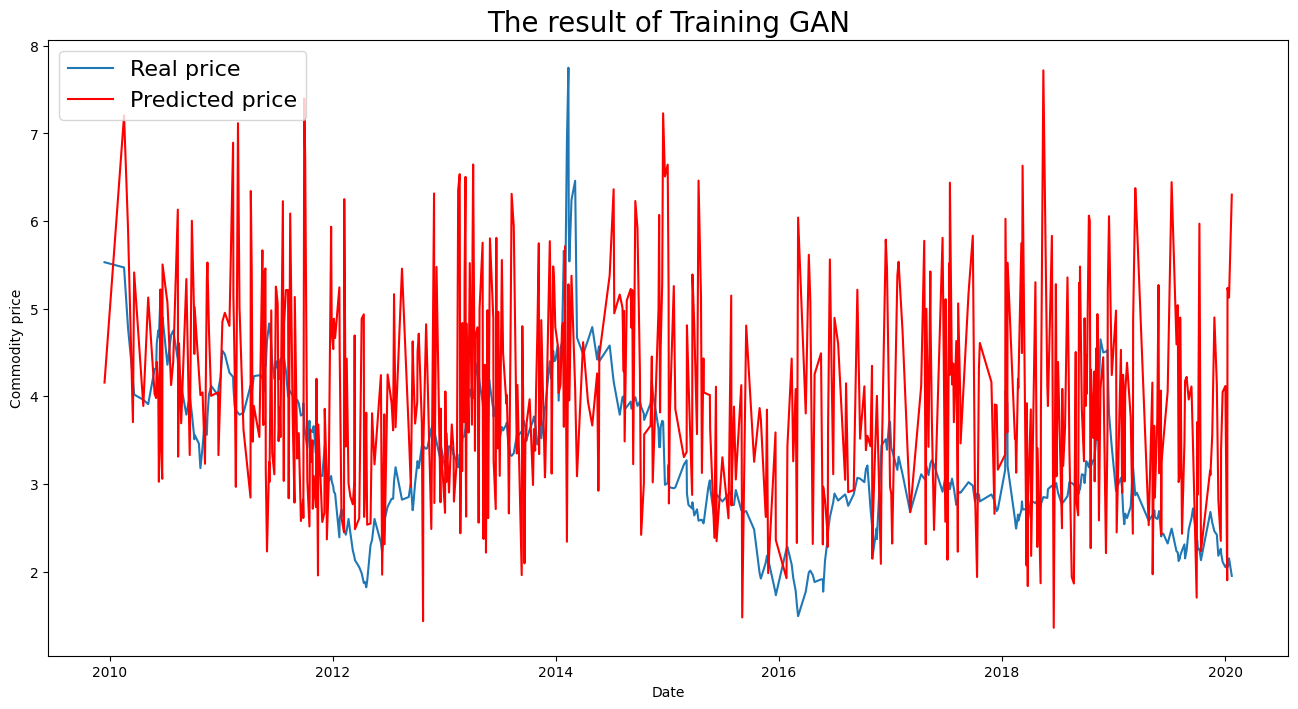

-- Train RMSE --  1.4693629821166414


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------

# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)
test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Commodity price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training GAN", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Train RMSE -- ', RMSE)


### testing GAN results

<ipython-input-22-db0841eb51dc>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-22-db0841eb51dc>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


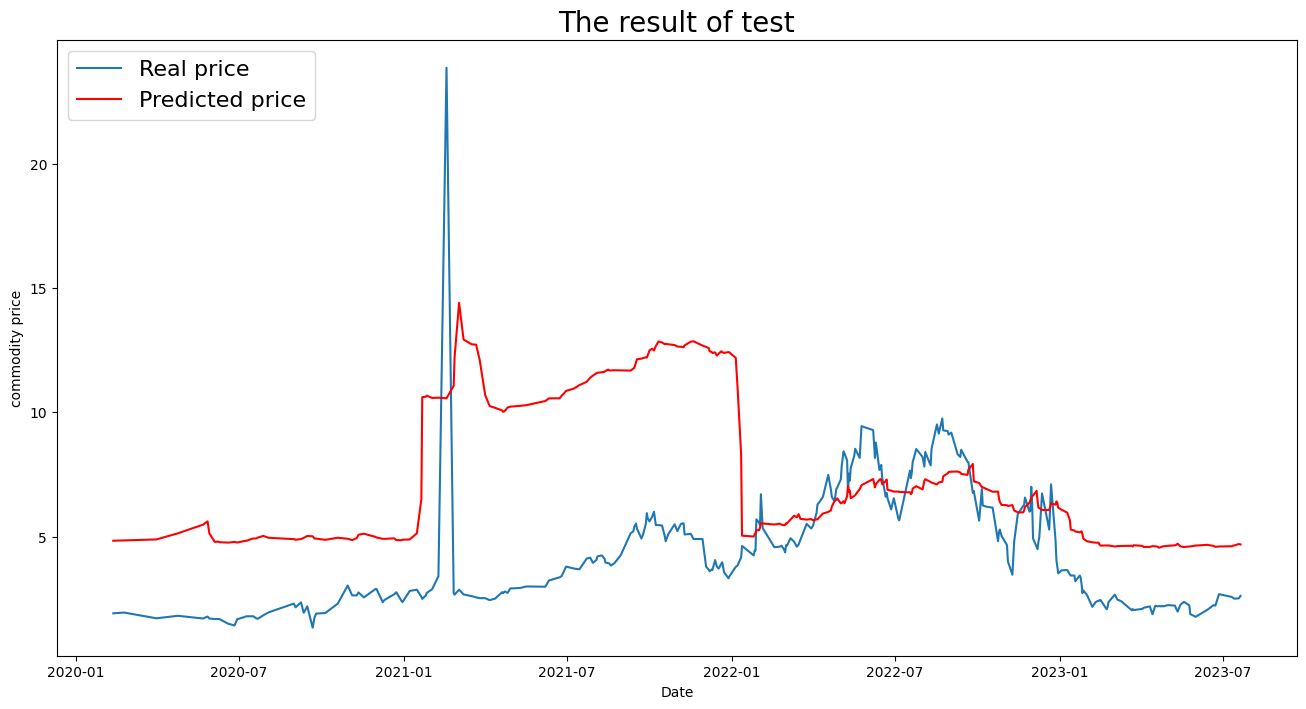

-- RMSE --  4.525825263980511


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from sklearn.metrics import mean_squared_error


########### Test dataset #########

# Load scaler/ index
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)

# Load test dataset/ model
G_model = tf.keras.models.load_model('gen_model_3_1_299.keras')
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of test", fontsize=20)
    plt.savefig('test_resultGAN.jpg', format='jpeg', dpi=350)
    plt.show()
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- RMSE -- ', RMSE)

    return predict_result, RMSE


test_predicted, test_RMSE = get_test_plot(X_test, y_test)



### export results

In [ ]:
import pandas as pd
from pickle import load


# 1. Reshape and Inverse Transform
y_predicted = G_model(X_test)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(y_predicted.numpy().reshape(-1, 1))  # Reshape and convert to numpy

# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price'])

# 3. Align Indices (adjust based on your original data index)
# Assuming 'test_predict_index' is available and corresponds to the time index
df_y_test.index = test_predict_index
df_predicted.index = test_predict_index

# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted], axis=1)

print(combined_df.head())  # Display the first few rows

combined_df.to_excel("pred_act_GAN_LSTM_CNN_GP.xlsx")


            Real Price  Predicted Price
2020-02-12        1.91         4.830002
2020-02-24        1.94         4.843511
2020-03-31        1.71         4.881431
2020-04-24        1.81         5.128436
2020-05-22        1.70         5.478167


## LSTM

### baseline LSTM

Epoch 1/50
9/9 - 4s - loss: 0.1411 - val_loss: 0.3544 - 4s/epoch - 467ms/step
Epoch 2/50
9/9 - 0s - loss: 0.2699 - val_loss: 0.1915 - 156ms/epoch - 17ms/step
Epoch 3/50
9/9 - 0s - loss: 0.6039 - val_loss: 0.2140 - 157ms/epoch - 17ms/step
Epoch 4/50
9/9 - 0s - loss: 0.0310 - val_loss: 0.3108 - 172ms/epoch - 19ms/step
Epoch 5/50
9/9 - 0s - loss: 0.0481 - val_loss: 0.3201 - 159ms/epoch - 18ms/step
Epoch 6/50
9/9 - 0s - loss: 0.0026 - val_loss: 0.2062 - 161ms/epoch - 18ms/step
Epoch 7/50
9/9 - 0s - loss: 0.0054 - val_loss: 0.1857 - 179ms/epoch - 20ms/step
Epoch 8/50
9/9 - 0s - loss: 0.0030 - val_loss: 0.1950 - 195ms/epoch - 22ms/step
Epoch 9/50
9/9 - 0s - loss: 0.0016 - val_loss: 0.1909 - 204ms/epoch - 23ms/step
Epoch 10/50
9/9 - 0s - loss: 0.0013 - val_loss: 0.1942 - 200ms/epoch - 22ms/step
Epoch 11/50
9/9 - 0s - loss: 0.0010 - val_loss: 0.1860 - 265ms/epoch - 29ms/step
Epoch 12/50
9/9 - 0s - loss: 9.8450e-04 - val_loss: 0.1791 - 316ms/epoch - 35ms/step
Epoch 13/50
9/9 - 0s - loss: 9.1217

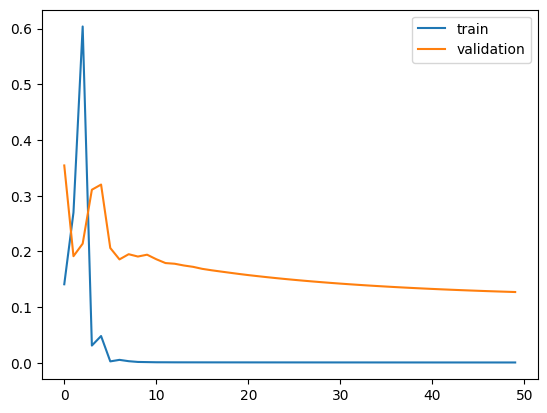

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               181248    
 al)                                                             
                                                                 
 dense_21 (Dense)            (None, 64)                16448     
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 197761 (772.50 KB)
Trainable params: 197761 (772.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
0.35655447171796223


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot
from pickle import load

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model

model = basic_lstm(input_dim, feature_size)
model.save('LSTM_3to1.keras')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

### Plot train result

<ipython-input-25-4795d543c8dd>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-25-4795d543c8dd>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


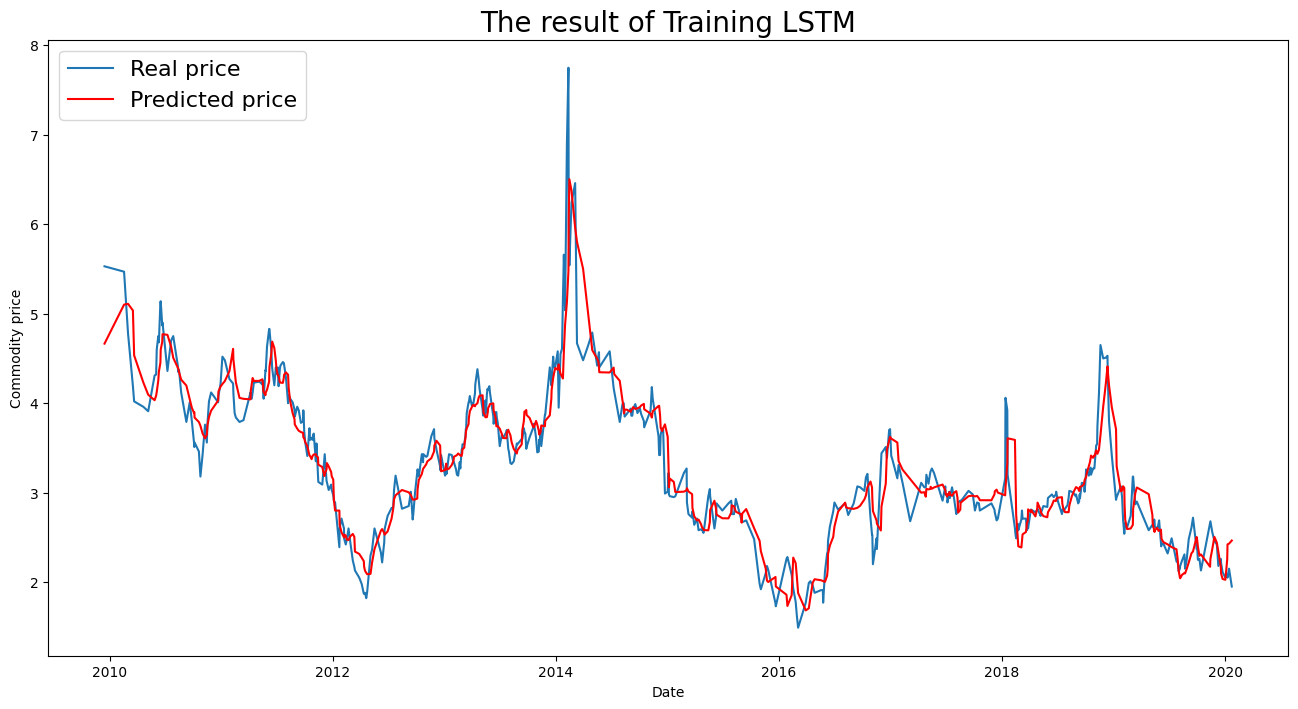

----- Train_RMSE_LSTM ----- 0.284791139653078


In [ ]:
# %% --------------------------------------- Plot the TRAIN result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):


    train_yhat = model.predict(X_train, verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
    #
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training LSTM", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

### testing result

<ipython-input-26-98329db18c19>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-26-98329db18c19>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


            predicted_price  predicted_price  predicted_price  \
2023-05-26              NaN              NaN              NaN   
2023-06-01              NaN              NaN              NaN   
2023-06-14              NaN              NaN              NaN   
2023-06-21              NaN              NaN              NaN   
2023-06-23              NaN              NaN              NaN   
2023-06-27              NaN              NaN              NaN   
2023-07-11              NaN              NaN              NaN   
2023-07-14              NaN              NaN              NaN   
2023-07-19              NaN              NaN              NaN   
2023-07-21              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2023-05-26              NaN              NaN              NaN   
2023-06-01              NaN              NaN              NaN   
2023-06-14              NaN              NaN              NaN   
2023-06-21              

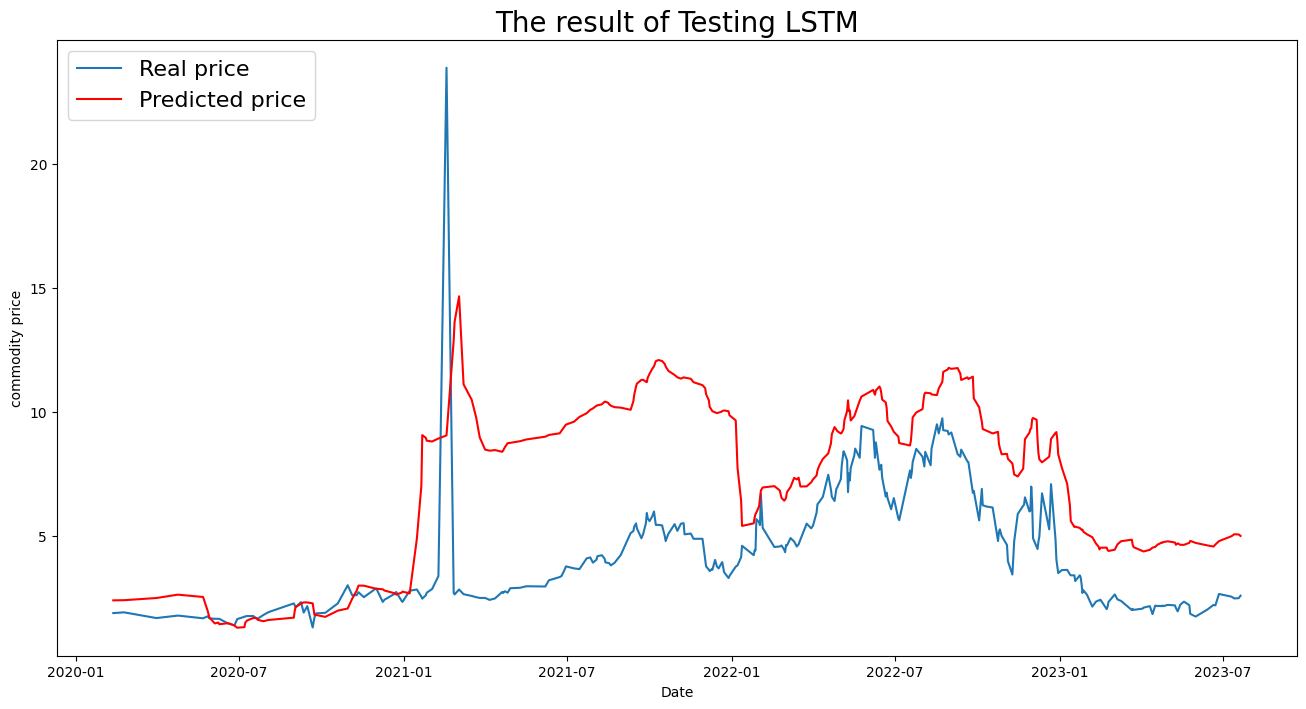

----- Test_RMSE_LSTM ----- 4.016586110889593


In [ ]:
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    print(predict_result.tail(10))

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing LSTM", fontsize=20)
    plt.savefig('test_resultLSTM_coal.jpg', format='jpeg', dpi=350)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE
test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)

### export results LSTM

In [ ]:
import pandas as pd
# 1. Reshape and Inverse Transform
yhat = model.predict(X_test, verbose=0)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(yhat.reshape(-1, 1))  # Reshape
test_dates = dataset.index[-len(y_test):]
# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price'])

df_y_test = pd.DataFrame({'Date': test_dates, 'Real Price': rescaled_y_test.flatten()})
df_predicted_y = pd.DataFrame({'Predicted Value LSTM': rescaled_predicted_y.flatten()})
# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted_y], axis=1)
print(combined_df.head())  # Display the first few rows


combined_df.to_excel("pred_act_LSTM_GP.xlsx")

        Date  Real Price  Predicted Value LSTM
0 2020-02-12        1.91              2.422480
1 2020-02-24        1.94              2.428653
2 2020-03-31        1.71              2.516391
3 2020-04-24        1.81              2.652489
4 2020-05-22        1.70              2.557897


## GRU

### Baseline GRU

Epoch 1/50
5/5 - 5s - loss: 0.6051 - val_loss: 0.5635 - 5s/epoch - 1s/step
Epoch 2/50
5/5 - 0s - loss: 0.3113 - val_loss: 0.4493 - 108ms/epoch - 22ms/step
Epoch 3/50
5/5 - 0s - loss: 0.1292 - val_loss: 0.3625 - 229ms/epoch - 46ms/step
Epoch 4/50
5/5 - 0s - loss: 0.0357 - val_loss: 0.3036 - 242ms/epoch - 48ms/step
Epoch 5/50
5/5 - 0s - loss: 0.0087 - val_loss: 0.2680 - 210ms/epoch - 42ms/step
Epoch 6/50
5/5 - 0s - loss: 0.0148 - val_loss: 0.2481 - 213ms/epoch - 43ms/step
Epoch 7/50
5/5 - 0s - loss: 0.0229 - val_loss: 0.2377 - 250ms/epoch - 50ms/step
Epoch 8/50
5/5 - 0s - loss: 0.0206 - val_loss: 0.2334 - 209ms/epoch - 42ms/step
Epoch 9/50
5/5 - 0s - loss: 0.0126 - val_loss: 0.2329 - 256ms/epoch - 51ms/step
Epoch 10/50
5/5 - 0s - loss: 0.0065 - val_loss: 0.2341 - 231ms/epoch - 46ms/step
Epoch 11/50
5/5 - 0s - loss: 0.0044 - val_loss: 0.2346 - 251ms/epoch - 50ms/step
Epoch 12/50
5/5 - 0s - loss: 0.0044 - val_loss: 0.2330 - 246ms/epoch - 49ms/step
Epoch 13/50
5/5 - 0s - loss: 0.0045 - val_

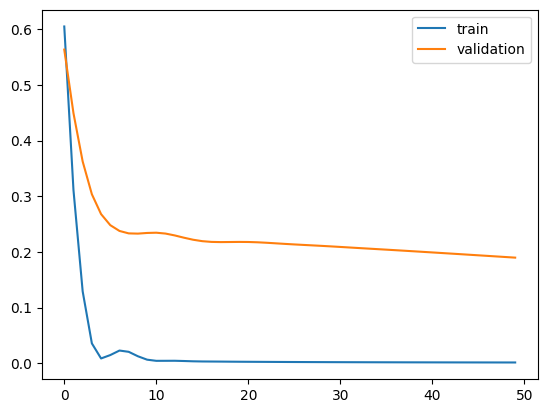

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 3, 128)            68352     
                                                                 
 gru_4 (GRU)                 (None, 64)                37248     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 107713 (420.75 KB)
Trainable params: 107713 (420.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


0.4356594452452729


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot
from pickle import load

# Load data
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

# Parameters
LR = 0.0001
BATCH_SIZE = 128
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]


def basic_GRU(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
    model = Sequential()
    model.add(GRU(units=128, return_sequences = True, input_shape=(input_dim, feature_size)))  # 256, return_sequences = True
    # model.add(GRU(units=256, recurrent_dropout = 0.2)) #, return_sequences = True
    model.add(GRU(units=64, input_shape=(input_dim, feature_size)))
    #model.add(Dense(128))
    model.add(Dense(32))
    # model.add(Dense(32))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate=LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model


model = basic_GRU(input_dim, output_dim, feature_size)
print(model.summary())
model.save('GRU_30to3.h5')

yhat = model.predict(X_test, verbose=0)
# print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)


### plot traing results

<ipython-input-33-6e68c62c1067>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-33-6e68c62c1067>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


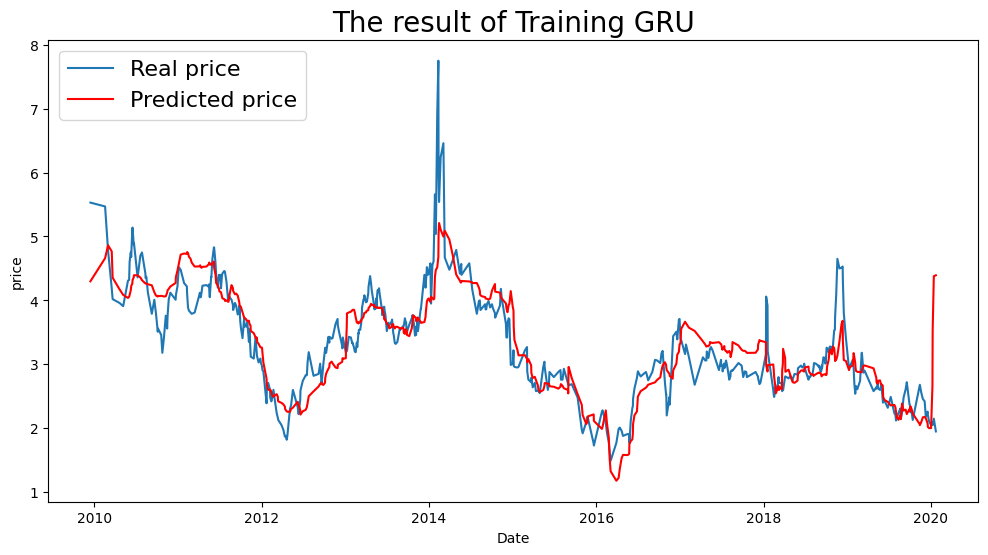

----- Train_RMSE_GRU ----- 0.4270846082692641


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):
    train_yhat = model.predict(X_train, verbose=0)

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(12, 6))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training GRU", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_GRU -----", train_RMSE)

### testing results GRU

<ipython-input-34-45bd035c2624>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-34-45bd035c2624>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


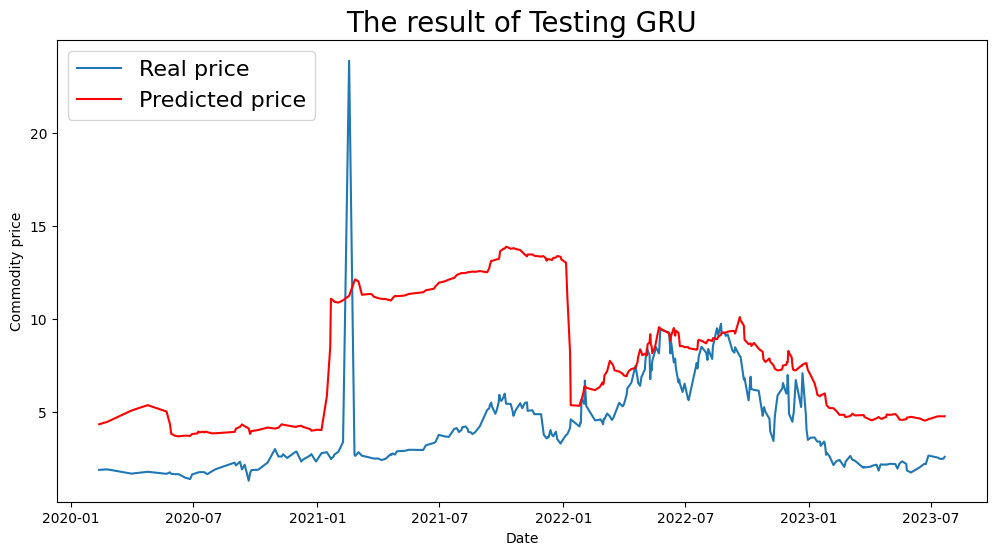

----- Test_RMSE_GRU ----- 4.90770363930397


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(12, 6))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing GRU", fontsize=20)
    plt.savefig('test_resultGRU_coal.jpg', format='jpeg', dpi=350)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE


test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_GRU -----", test_RMSE)

### export results

In [ ]:
import pandas as pd
# 1. Reshape and Inverse Transform
yhat = model.predict(X_test, verbose=0)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(yhat.reshape(-1, 1))  # Reshape
test_dates = dataset.index[-len(y_test):]
# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price'])

df_y_test = pd.DataFrame({'Date': test_dates, 'Real Price': rescaled_y_test.flatten()})
df_predicted_y = pd.DataFrame({'Predicted Price GRU': rescaled_predicted_y.flatten()})
# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted_y], axis=1)
print(combined_df.head())  # Display the first few rows


combined_df.to_excel("pred_act_GRU_GP.xlsx")

        Date  Real Price  Predicted Price GRU
0 2020-02-12        1.91             4.358960
1 2020-02-24        1.94             4.488059
2 2020-03-31        1.71             5.095511
3 2020-04-24        1.81             5.384508
4 2020-05-22        1.70             5.041025


## plot all results

In [ ]:
import pandas as pd

# Read the Excel files
df1 = pd.read_excel("pred_act_GAN_LSTM_CNN_GP.xlsx")
df2 = pd.read_excel("pred_act_GAN_GRU_CNN_GP.xlsx")
df3 = pd.read_excel("pred_act_GRU_GP.xlsx")
df4 = pd.read_excel("pred_act_LSTM_GP.xlsx")

# Now merge the dataframes on 'Date' and 'Real Value'
merged_df = df1.merge(df2, on=['Date', 'Real Price'], how='outer')
merged_df = merged_df.merge(df3, on=['Date', 'Real Price'], how='outer')
merged_df = merged_df.merge(df4, on=['Date', 'Real Price'], how='outer')

merged_df = merged_df.fillna(0)  # Replace 0 with an appropriate fill value if necessary

# Write the combined DataFrame to a new Excel file
merged_df.to_excel("all_predictions_GP.xlsx", index=False)

#### with macro

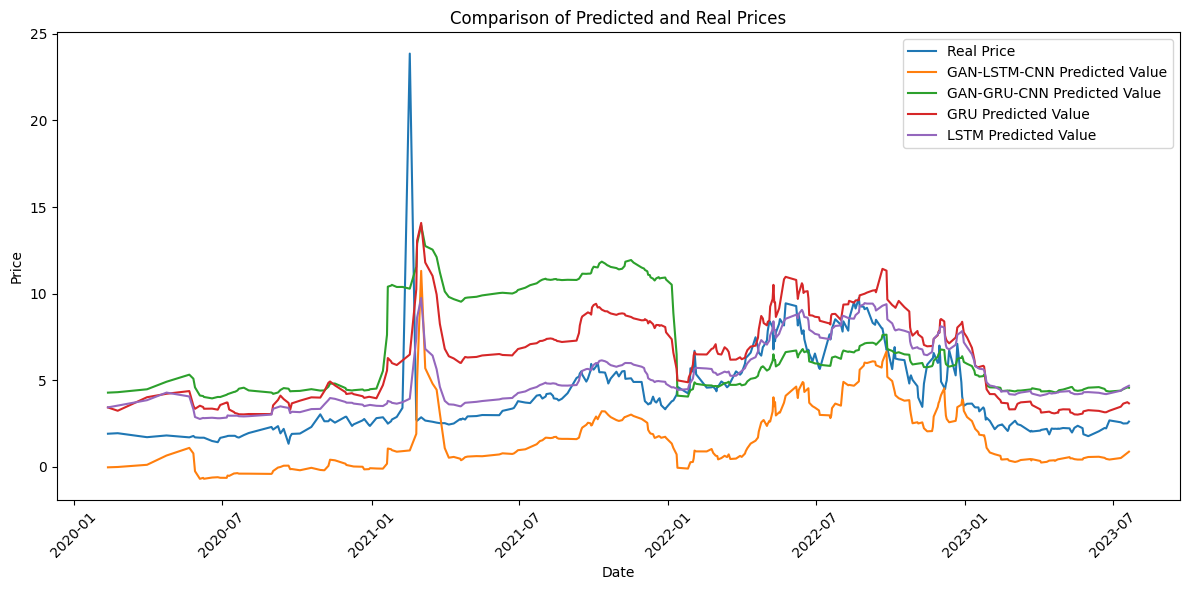

In [ ]:
# prompt: plot merged_df

import pandas as pd
import matplotlib.pyplot as plt
# Read the Excel file
merged_df = pd.read_excel("all_predictions_macro_GP.xlsx")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Real Price'], label='Real Price')
plt.plot(merged_df['Date'], merged_df['Predicted PriceGANLSTMCNN'], label='GAN-LSTM-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted PriceGANGRU'], label='GAN-GRU-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted ValueGRU'], label='GRU Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted ValueLSTM'], label='LSTM Predicted Value')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Comparison of Predicted and Real Prices")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
# Save the plot as JPEG
plt.savefig('price_predictions_comparison.jpeg', format='jpeg', dpi=300)

plt.show()




### with RE and SA

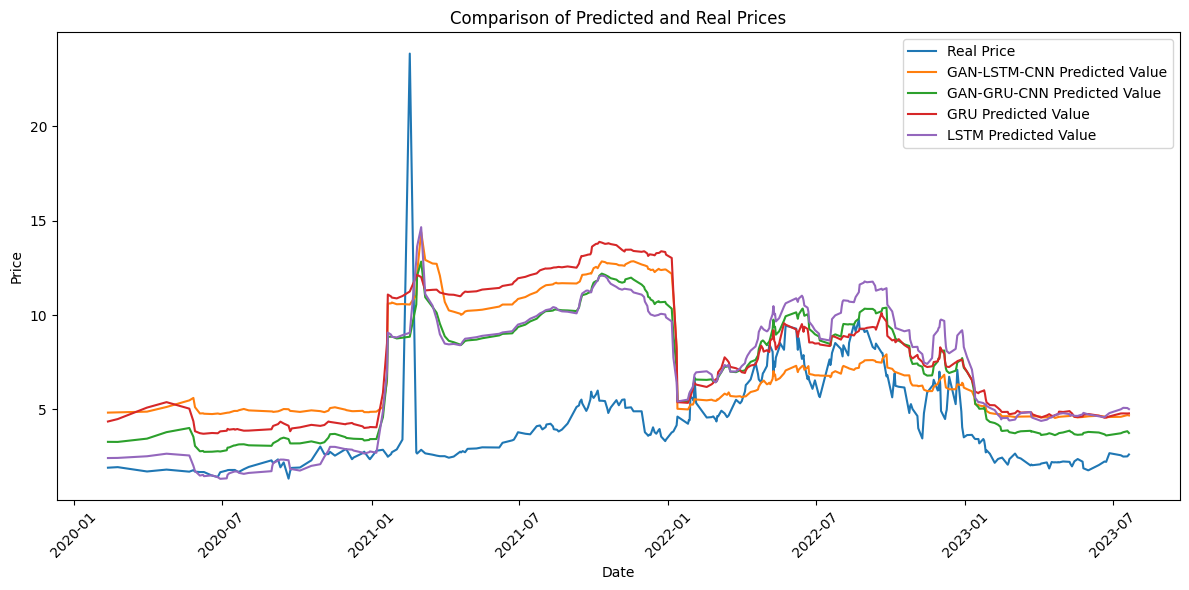

In [ ]:
# prompt: plot merged_df

import pandas as pd
import matplotlib.pyplot as plt
# Read the Excel file
merged_df = pd.read_excel("all_predictions_GP.xlsx")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Real Price'], label='Real Price')
plt.plot(merged_df['Date'], merged_df['Predicted PriceGANLSTM'], label='GAN-LSTM-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted PriceGANGRU'], label='GAN-GRU-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Price GRU'], label='GRU Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Value LSTM'], label='LSTM Predicted Value')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Comparison of Predicted and Real Prices")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
# Save the plot as JPEG
plt.savefig('price_predictions_comparison_GP.jpeg', format='jpeg', dpi=300)

plt.show()




# Coal

## Import dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
# %% --------------------------------------- Load Data  -----------------------------------------------------------------
dataset = pd.read_csv('Finaldata_with_Fourier_coal.csv', parse_dates=['date'])
news = pd.read_csv("averaged_sentiment_coal.csv", parse_dates=["Date"])


In [ ]:
dataset

date    wti    GP        coal  solarthermal  solarpvthermalhybrid  \
0    2006-11-13  58.59  7.26   47.750000        4063.0                1007.0   
1    2006-11-14  58.28  7.42   47.400002        4063.0                1007.0   
2    2006-11-15  58.79  7.45   48.799999        4063.0                1007.0   
3    2006-11-16  56.23  7.59   48.450001        4063.0                1007.0   
4    2006-11-17  55.90  7.23   47.200001        4063.0                1007.0   
...         ...    ...   ...         ...           ...                   ...   
4186 2023-07-18  75.76  2.52  108.949997        8424.0                2513.0   
4187 2023-07-19  75.40  2.51  108.000000        8424.0                2513.0   
4188 2023-07-20  75.65  2.61  109.750000        8424.0                2513.0   
4189 2023-07-21  77.06  2.61  110.500000        8424.0                2513.0   
4190 2023-07-24  78.81  2.68  111.050003        8424.0                2513.0   

      solarpv     wind  hydropower  marineandtidal  ...      MACD      20SD  \
0      6281.0   4141.0      1140.0           809.0  ...  0.290618  0.898156   
1      6281.0   4141.0      1140.0           809.0  ...  0.355983  1.000589   
2      6281.0   4141.0      1140.0           809.0  ...  0.313273  1.005704   
3      6281.0   4141.0      1140.0           809.0  ...  0.299351  1.015702   
4      6281.0   4141.0      1140.0           809.0  ...  0.369010  1.112521   
...       ...      ...         ...             ...  ...       ...       ...   
4186  24718.0  10773.0      2674.0          1585.0  ...  2.725080  6.478597   
4187  24718.0  10773.0      2674.0          1585.0  ...  2.644342  6.523102   
4188  24718.0  10773.0      2674.0          1585.0  ...  2.411349  6.497211   
4189  24718.0  10773.0      2674.0          1585.0  ...  2.141497  6.485004   
4190  24718.0  10773.0      2674.0          1585.0  ...  1.861794  6.469752   

      upper_band  lower_band         EMA  logmomentum  absolute of 3 comp  \
0      51.151074   47.558450   47.900026     3.844814          153.795901   
1      51.277368   47.275013   47.566676     3.837299          153.676148   
2      51.266170   47.243354   48.388892     3.867026          153.555999   
3      51.240928   47.178119   48.429631     3.859677          153.435455   
4      51.360757   46.910672   47.609878     3.832980          153.314518   
...          ...         ...         ...          ...                 ...   
4186  126.461956  100.547567  107.320517     4.681668          154.388663   
4187  126.215251  100.122844  107.773506     4.672829          154.270915   
4188  125.808707   99.819864  109.091169     4.689052          154.152764   
4189  125.486675   99.546658  110.030390     4.695925          154.034210   
4190  125.260933   99.381924  110.710132     4.700935          153.915255   

      angle of 3 comp  absolute of 9 comp  angle of 9 comp  
0           -0.093559           75.714322         0.001803  
1           -0.093923           74.862593         0.002661  
2           -0.094286           74.018172         0.003537  
3           -0.094648           73.181112         0.004433  
4           -0.095008           72.351468         0.005348  
...               ...                 ...              ...  
4186        -0.091723           80.080568        -0.002209  
4187        -0.092092           79.193165        -0.001442  
4188        -0.092461           78.312780        -0.000658  
4189        -0.092828           77.439472         0.000144  
4190        -0.093194           76.573300         0.000965  

[4191 rows x 48 columns]

In [ ]:
import pandas as pd
df1 = pd.read_csv('Finaldata_with_Fourier_coal.csv')
df2 = pd.read_csv('averaged_sentiment_coal.csv')
# Convert the 'date' column in df1 to a common format
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

# Convert the 'date' column in df2 to a common format
df2['Date'] = pd.to_datetime(df2['Date'], format='%b %d, %Y')
df2 = df2.rename(columns={'Date': 'date'})
import pandas as pd

# Merge the first two DataFrames
merged_df = pd.merge(df1, df2, on='date')


In [ ]:
merged_df

date    wti    GP        coal  solarthermal  solarpvthermalhybrid  \
0   2009-09-23  68.74  3.43   68.849998        9470.0                2094.0   
1   2009-12-30  79.35  5.78   83.699997        9470.0                2094.0   
2   2010-03-26  79.75  3.92   73.349998       11170.0                2610.0   
3   2010-04-14  85.62  4.15   76.750000       11170.0                2610.0   
4   2010-04-27  82.43  4.18   85.300003       11170.0                2610.0   
..         ...    ...   ...         ...           ...                   ...   
297 2023-05-26  72.35  1.88   98.949997        8424.0                2513.0   
298 2023-05-31  68.11  2.10   95.500000        8424.0                2513.0   
299 2023-07-06  71.76  2.50  117.250000        8424.0                2513.0   
300 2023-07-12  75.77  2.55  104.050003        8424.0                2513.0   
301 2023-07-24  78.81  2.68  111.050003        8424.0                2513.0   

     solarpv     wind  hydropower  marineandtidal  ...       20SD  upper_band  \
0    19150.0  10773.0      2417.0          1774.0  ...   1.413979   71.532719   
1    19150.0  10773.0      2417.0          1774.0  ...   2.289580   82.705351   
2    24623.0  12010.0      2464.0          1810.0  ...   1.414071   76.192428   
3    24623.0  12010.0      2464.0          1810.0  ...   1.994657   79.136934   
4    24623.0  12010.0      2464.0          1810.0  ...   2.913508   83.688922   
..       ...      ...         ...             ...  ...        ...         ...   
297  24718.0  10773.0      2674.0          1585.0  ...   8.078453  138.525953   
298  24718.0  10773.0      2674.0          1585.0  ...  10.178374  138.711510   
299  24718.0  10773.0      2674.0          1585.0  ...   3.398717  122.792673   
300  24718.0  10773.0      2674.0          1585.0  ...   4.836173  125.284251   
301  24718.0  10773.0      2674.0          1585.0  ...   6.469752  125.260933   

     lower_band         EMA  logmomentum  absolute of 3 comp  angle of 3 comp  \
0     65.876804   68.795315     4.217299           82.389016         0.185812   
1     73.547030   83.277928     4.415220           85.297682         0.201752   
2     70.536145   73.367528     4.281515           88.523310         0.198232   
3     71.158305   76.719538     4.327438           89.226518         0.195726   
4     72.034889   84.419980     4.434382           89.760578         0.193482   
..          ...         ...          ...                 ...              ...   
297  106.212142  105.508046     4.584457          158.141104        -0.078588   
298   97.998015   96.056450     4.548600          157.934371        -0.079390   
299  109.197803  119.126330     4.755743          155.315911        -0.088732   
300  105.939558  105.462056     4.635214          154.855580        -0.090236   
301   99.381924  110.710132     4.700935          153.915255        -0.093194   

     absolute of 9 comp  angle of 9 comp  sentiment_score  
0             62.625744        -0.022353        -0.981020  
1             70.183415        -0.062295        -0.999875  
2             81.731248        -0.051245         0.999898  
3             84.312035        -0.045165        -0.042391  
4             86.263178        -0.040073        -0.099437  
..                  ...              ...              ...  
297          113.956360        -0.019437        -0.999892  
298          111.789768        -0.018820        -0.999566  
299           87.425081        -0.007733        -0.001253  
300           83.699150        -0.005103        -0.999791  
301           76.573300         0.000965        -0.149986  

[302 rows x 49 columns]

## with macro economic variables

In [ ]:
dataset = merged_df
# Check NA and fill them
dataset.isnull().sum()
dataset.iloc[:, 3:] = pd.concat([dataset.iloc[:, 2:].ffill(), dataset.iloc[:, 2:].bfill()]).groupby(level=0).mean()


In [ ]:
dataset

date    wti    GP  coal  solarthermal  solarpvthermalhybrid  \
0   2009-09-23  68.74  3.43  3.43     68.849998                9470.0   
1   2009-12-30  79.35  5.78  5.78     83.699997                9470.0   
2   2010-03-26  79.75  3.92  3.92     73.349998               11170.0   
3   2010-04-14  85.62  4.15  4.15     76.750000               11170.0   
4   2010-04-27  82.43  4.18  4.18     85.300003               11170.0   
..         ...    ...   ...   ...           ...                   ...   
297 2023-05-26  72.35  1.88  1.88     98.949997                8424.0   
298 2023-05-31  68.11  2.10  2.10     95.500000                8424.0   
299 2023-07-06  71.76  2.50  2.50    117.250000                8424.0   
300 2023-07-12  75.77  2.55  2.55    104.050003                8424.0   
301 2023-07-24  78.81  2.68  2.68    111.050003                8424.0   

     solarpv     wind  hydropower  marineandtidal  ...      20SD  upper_band  \
0     2094.0  19150.0     10773.0          2417.0  ...  0.257470    1.413979   
1     2094.0  19150.0     10773.0          2417.0  ... -1.496312    2.289580   
2     2610.0  24623.0     12010.0          2464.0  ...  0.805560    1.414071   
3     2610.0  24623.0     12010.0          2464.0  ... -0.730312    1.994657   
4     2610.0  24623.0     12010.0          2464.0  ... -2.016087    2.913508   
..       ...      ...         ...             ...  ...       ...         ...   
297   2513.0  24718.0     10773.0          2674.0  ...  5.919170    8.078453   
298   2513.0  24718.0     10773.0          2674.0  ...  8.277359   10.178374   
299   2513.0  24718.0     10773.0          2674.0  ... -1.097649    3.398717   
300   2513.0  24718.0     10773.0          2674.0  ...  1.420531    4.836173   
301   2513.0  24718.0     10773.0          2674.0  ...  1.861794    6.469752   

     lower_band         EMA  logmomentum  absolute of 3 comp  angle of 3 comp  \
0     71.532719   65.876804    68.795315            4.217299        82.389016   
1     82.705351   73.547030    83.277928            4.415220        85.297682   
2     76.192428   70.536145    73.367528            4.281515        88.523310   
3     79.136934   71.158305    76.719538            4.327438        89.226518   
4     83.688922   72.034889    84.419980            4.434382        89.760578   
..          ...         ...          ...                 ...              ...   
297  138.525953  106.212142   105.508046            4.584457       158.141104   
298  138.711510   97.998015    96.056450            4.548600       157.934371   
299  122.792673  109.197803   119.126330            4.755743       155.315911   
300  125.284251  105.939558   105.462056            4.635214       154.855580   
301  125.260933   99.381924   110.710132            4.700935       153.915255   

     absolute of 9 comp  angle of 9 comp  sentiment_score  
0              0.185812        62.625744        -0.022353  
1              0.201752        70.183415        -0.062295  
2              0.198232        81.731248        -0.051245  
3              0.195726        84.312035        -0.045165  
4              0.193482        86.263178        -0.040073  
..                  ...              ...              ...  
297           -0.078588       113.956360        -0.019437  
298           -0.079390       111.789768        -0.018820  
299           -0.088732        87.425081        -0.007733  
300           -0.090236        83.699150        -0.005103  
301           -0.093194        76.573300         0.000965  

[302 rows x 49 columns]

In [ ]:
# keep only these variables in merged_df : 'date', 'wti', 'GP', 'coal', 'GR', 'EPI', 'TB', 'LTY', 'I', 'SRV', 'GOP',
#        'GIPIO', 'M2', 'IPI', 'UMP', 'MA7', 'MA21', 'MACD', '20SD',
#        'upper_band', 'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
#        'angle of 3 comp', 'absolute of 9 comp', 'angle of 9 comp',
#        '

cols_to_keep = ['date', 'wti', 'GP', 'coal', 'GR', 'EPI', 'TB', 'LTY', 'I', 'SRV', 'GOP',
       'GIPIO', 'M2', 'IPI', 'UMP', 'MA7', 'MA21', 'MACD', '20SD',
       'upper_band', 'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
       'angle of 3 comp', 'absolute of 9 comp', 'angle of 9 comp'
       ]

merged_df = merged_df[cols_to_keep]


In [ ]:
merged_df

date    wti    GP  coal  solarthermal  solarpvthermalhybrid  \
0   2009-09-23  68.74  3.43  3.43     68.849998                9470.0   
1   2009-12-30  79.35  5.78  5.78     83.699997                9470.0   
2   2010-03-26  79.75  3.92  3.92     73.349998               11170.0   
3   2010-04-14  85.62  4.15  4.15     76.750000               11170.0   
4   2010-04-27  82.43  4.18  4.18     85.300003               11170.0   
..         ...    ...   ...   ...           ...                   ...   
297 2023-05-26  72.35  1.88  1.88     98.949997                8424.0   
298 2023-05-31  68.11  2.10  2.10     95.500000                8424.0   
299 2023-07-06  71.76  2.50  2.50    117.250000                8424.0   
300 2023-07-12  75.77  2.55  2.55    104.050003                8424.0   
301 2023-07-24  78.81  2.68  2.68    111.050003                8424.0   

     solarpv     wind  hydropower  marineandtidal  ...      20SD  upper_band  \
0     2094.0  19150.0     10773.0          2417.0  ...  0.257470    1.413979   
1     2094.0  19150.0     10773.0          2417.0  ... -1.496312    2.289580   
2     2610.0  24623.0     12010.0          2464.0  ...  0.805560    1.414071   
3     2610.0  24623.0     12010.0          2464.0  ... -0.730312    1.994657   
4     2610.0  24623.0     12010.0          2464.0  ... -2.016087    2.913508   
..       ...      ...         ...             ...  ...       ...         ...   
297   2513.0  24718.0     10773.0          2674.0  ...  5.919170    8.078453   
298   2513.0  24718.0     10773.0          2674.0  ...  8.277359   10.178374   
299   2513.0  24718.0     10773.0          2674.0  ... -1.097649    3.398717   
300   2513.0  24718.0     10773.0          2674.0  ...  1.420531    4.836173   
301   2513.0  24718.0     10773.0          2674.0  ...  1.861794    6.469752   

     lower_band         EMA  logmomentum  absolute of 3 comp  angle of 3 comp  \
0     71.532719   65.876804    68.795315            4.217299        82.389016   
1     82.705351   73.547030    83.277928            4.415220        85.297682   
2     76.192428   70.536145    73.367528            4.281515        88.523310   
3     79.136934   71.158305    76.719538            4.327438        89.226518   
4     83.688922   72.034889    84.419980            4.434382        89.760578   
..          ...         ...          ...                 ...              ...   
297  138.525953  106.212142   105.508046            4.584457       158.141104   
298  138.711510   97.998015    96.056450            4.548600       157.934371   
299  122.792673  109.197803   119.126330            4.755743       155.315911   
300  125.284251  105.939558   105.462056            4.635214       154.855580   
301  125.260933   99.381924   110.710132            4.700935       153.915255   

     absolute of 9 comp  angle of 9 comp  sentiment_score  
0              0.185812        62.625744        -0.022353  
1              0.201752        70.183415        -0.062295  
2              0.198232        81.731248        -0.051245  
3              0.195726        84.312035        -0.045165  
4              0.193482        86.263178        -0.040073  
..                  ...              ...              ...  
297           -0.078588       113.956360        -0.019437  
298           -0.079390       111.789768        -0.018820  
299           -0.088732        87.425081        -0.007733  
300           -0.090236        83.699150        -0.005103  
301           -0.093194        76.573300         0.000965  

[302 rows x 49 columns]

## Gan model

### preprocessing

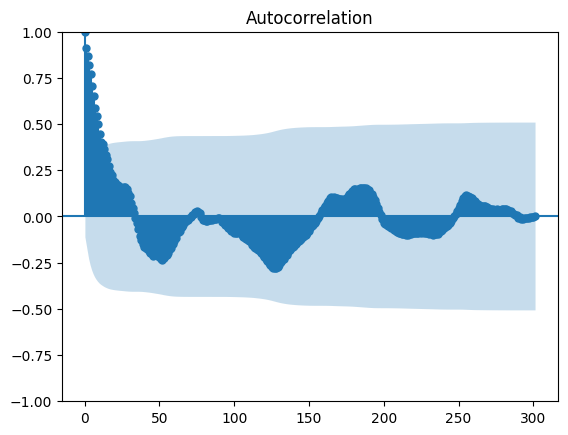

X shape:  (299, 3, 48)
y shape:  (299, 1)
X_train shape:  (224, 3, 48)
y_train shape:  (224, 1)
y_c_train shape:  (224, 3, 1)
X_test shape:  (75, 3, 48)
y_test shape:  (75, 1)
y_c_test shape:  (75, 3, 1)
index_train shape: (224,)
index_test shape: (75,)


In [ ]:
# %% --------------------------------------- Data Preprocessing  -----------------------------------------------------------------
import pandas as pd
# Set the date to datetime data
datetime_series = pd.to_datetime(dataset['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='date')
dataset = dataset.drop(columns='date')

# Get features and target
X_value = pd.DataFrame(dataset.iloc[:,:])
y_value = pd.DataFrame(dataset.iloc[:, 2])

# Autocorrelation Check
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=len(y_value)-1)
plt.show()

# Normalized the data
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))

# Reshape the data
'''Set the data input steps and output steps,
    we use 30 days data to predict 1 day price here,
    reshape it to (None, input_step, number of features) used for LSTM input'''
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1

# Get X/y dataset
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

# get the train test predict index
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

# Split train/test dataset
def split_train_test(data):
    train_size = round(len(X) * 0.75)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

# Get data and check shape
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)
# %% --------------------------------------- Save dataset -----------------------------------------------------------------
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("yc_train.npy", yc_train)
np.save("yc_test.npy", yc_test)
np.save('index_train.npy', index_train)
np.save('index_test.npy', index_test)
np.save('train_predict_index.npy', index_train)
np.save('test_predict_index.npy', index_test)



### define GAN GRU CNN

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU,LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error


X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential()
    model.add(GRU(128, input_shape=(input_dim, feature_size), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='linear'))
    return model
def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net


model = make_discriminator_model()
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             10304     
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            41088     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 220)               28160     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 220)               0         
                                                                 
 dense_1 (Dense)             (None, 220)               4

### train the GAN

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 15, D_loss: 1.3836257457733154, G_loss: 0.690224826335907
Epoch 30, D_loss: 1.387475609779358, G_loss: 0.6872186660766602
Epoch 45, D_loss: 1.3717896938323975, G_loss: 0.7141613364219666
Epoch 60, D_loss: 1.3903758525848389, G_loss: 0.6888200640678406
Epoch 75, D_loss: 1.3690372705459595, G_loss: 0.6914911270141602
Epoch 90, D_loss: 1.3821964263916016, G_loss: 0.6697877049446106
Epoch 105, D_loss: 1.3612207174301147, G_loss: 0.6993082165718079
Epoch 120, D_loss: 1.3948869705200195, G_loss: 0.7139748334884644
Epoch 135, D_loss: 1.357668161392212, G_loss: 0.667847752571106
Epoch 150, D_loss: 1.356368064880371, G_loss: 0.7125874757766724
Epoch 165, D_loss: 1.351731300354004, G_loss: 0.7286859154701233
Epoch 180, D_loss: 1.3930950164794922, G_loss: 0.690753161907196
Epoch 195, D_loss: 1.331338882446289, G_loss: 0.7235694527626038
Epoch 210, D_loss: 1.3659179210662842, G_loss: 0.7296037673950195
Epoch 225, D_loss: 1.3625218868255615, G_loss: 0.7049906849861145
Epoch 240, D_loss: 1.365

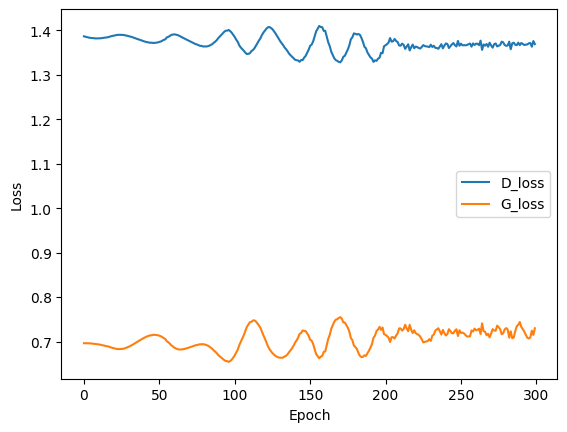

In [ ]:
class GAN:
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(self.generator, 'gen_model_3_1_%d.keras' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                print(f'Epoch {epoch + 1}, D_loss: {loss["d_loss"].numpy()}, G_loss: {loss["g_loss"].numpy()}')

            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price)


if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]

    # For Bayesian
    opt = {"lr": 0.00016, "epoch": 300, 'bs': 128}

    generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, opt)

### plot train results

----- predicted price ----- [[-0.25983003]
 [-0.19810358]
 [-0.34834063]
 [-0.2139236 ]
 [-0.2978813 ]
 [-0.28543356]
 [-0.25497442]
 [-0.32683343]
 [-0.40369102]
 [-0.36013556]
 [-0.4653598 ]
 [-0.4360268 ]
 [-0.3349107 ]
 [-0.41502318]
 [-0.3137051 ]
 [-0.3025659 ]
 [-0.22080189]
 [-0.28141868]
 [-0.20117655]
 [-0.24551582]
 [-0.27854943]
 [-0.15683621]
 [-0.19655192]
 [-0.22834158]
 [-0.2392458 ]
 [-0.17080717]
 [-0.22790551]
 [-0.25798774]
 [-0.2955128 ]
 [-0.25464875]
 [-0.31206864]
 [-0.2822681 ]
 [-0.4663757 ]
 [-0.41277415]
 [-0.5487847 ]
 [-0.46459606]
 [-0.47012675]
 [-0.54427177]
 [-0.60744256]
 [-0.61440104]
 [-0.5575181 ]
 [-0.7114617 ]
 [-0.68994826]
 [-0.616021  ]
 [-0.72412467]
 [-0.6393843 ]
 [-0.3785431 ]
 [-0.54591244]
 [-0.7035338 ]
 [-0.38735074]
 [-0.52585065]
 [-0.6014928 ]
 [-0.52477586]
 [-0.5056763 ]
 [-0.6985672 ]
 [-0.68498296]
 [-0.75593436]
 [-0.6464035 ]
 [-0.69845355]
 [-0.53843963]
 [-0.62689066]
 [-0.6644995 ]
 [-0.6355484 ]
 [-0.5218549 ]
 [-0.4896519

<ipython-input-12-59c6c035039e>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-12-59c6c035039e>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


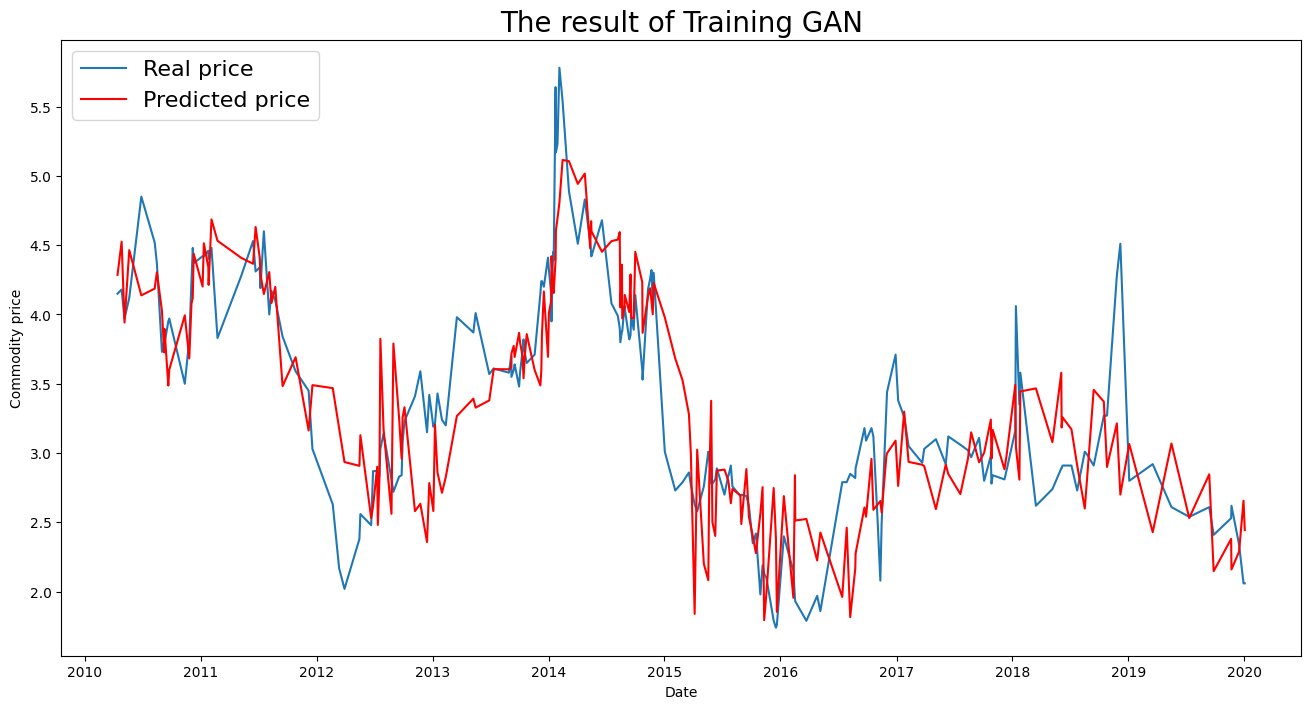

-- Train RMSE --  0.4588375985033276


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------

# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)
test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Commodity price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training GAN", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Train RMSE -- ', RMSE)


### Test GAN results

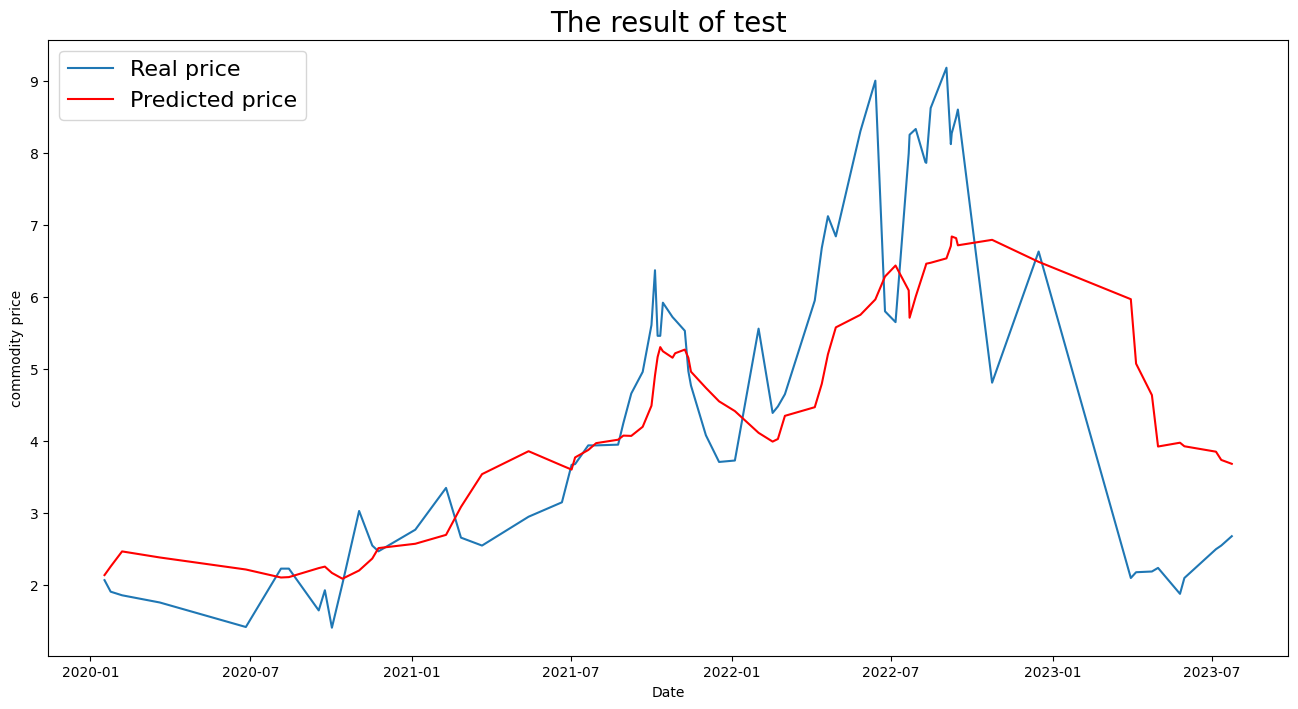

-- RMSE --  1.3315161751566402


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from sklearn.metrics import mean_squared_error


########### Test dataset #########

# Load scaler/ index
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)

# Load test dataset/ model
G_model = tf.keras.models.load_model('gen_model_3_1_299.keras')
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of test", fontsize=20)
    plt.savefig('test_resultGAN.jpg', format='jpeg', dpi=350)
    plt.show()
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- RMSE -- ', RMSE)

    return predict_result, RMSE


test_predicted, test_RMSE = get_test_plot(X_test, y_test)



### export results

In [ ]:
import pandas as pd
from pickle import load


# 1. Reshape and Inverse Transform
y_predicted = G_model(X_test)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(y_predicted.numpy().reshape(-1, 1))  # Reshape and convert to numpy

# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price GAN GRU'])

# 3. Align Indices (adjust based on your original data index)
# Assuming 'test_predict_index' is available and corresponds to the time index
df_y_test.index = test_predict_index
df_predicted.index = test_predict_index

# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted], axis=1)
combined_df.index.name = 'Date'
print(combined_df.head())  # Display the first few rows

combined_df.to_excel("pred_act_GAN_GRU_CNN_coal.xlsx")


            Real Price  Predicted Price GAN GRU
Date                                           
2020-01-17        2.07                 2.140157
2020-01-24        1.91                 2.259317
2020-02-06        1.86                 2.468841
2020-03-20        1.76                 2.384663
2020-06-26        1.42                 2.217901


### define GANLSTM CNN

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU,LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error


X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential()
    model.add(LSTM(128, input_shape=(input_dim, feature_size), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='linear'))
    return model
def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net


model = make_discriminator_model()
print(model.summary())



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 2, 32)             128       
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 64)             10304     
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 128)            41088     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 220)               28160     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 220)               0         
                                                                 
 dense_8 (Dense)             (None, 220)              

### train the gan

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 15, D_loss: 1.3724689483642578, G_loss: 0.6969127058982849
Epoch 30, D_loss: 1.3694148063659668, G_loss: 0.6936766505241394
Epoch 45, D_loss: 1.399942398071289, G_loss: 0.6571121215820312
Epoch 60, D_loss: 1.3800568580627441, G_loss: 0.6898088455200195
Epoch 75, D_loss: 1.3445954322814941, G_loss: 0.7244924306869507
Epoch 90, D_loss: 1.3767184019088745, G_loss: 0.6821385622024536
Epoch 105, D_loss: 1.377877116203308, G_loss: 0.6446002721786499
Epoch 120, D_loss: 1.3327240943908691, G_loss: 0.7348570823669434
Epoch 135, D_loss: 1.3558168411254883, G_loss: 0.6738151907920837
Epoch 150, D_loss: 1.2972140312194824, G_loss: 0.7394877672195435
Epoch 165, D_loss: 1.4022243022918701, G_loss: 0.6588565111160278
Epoch 180, D_loss: 1.3563895225524902, G_loss: 0.6083135604858398
Epoch 195, D_loss: 1.2469080686569214, G_loss: 0.8451756238937378
Epoch 210, D_loss: 1.482399582862854, G_loss: 0.5472992062568665
Epoch 225, D_loss: 1.2311497926712036, G_loss: 1.0220003128051758
Epoch 240, D_loss: 

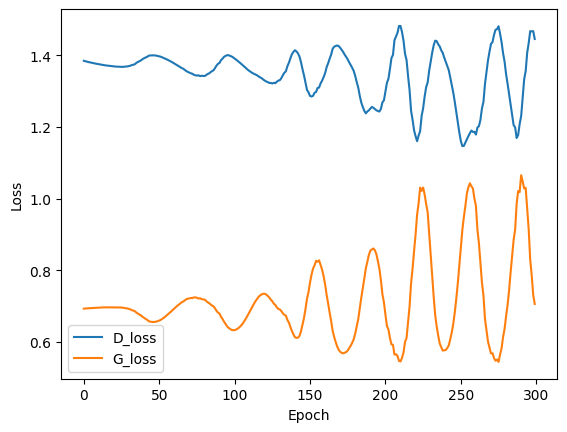

In [ ]:
class GAN:
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(self.generator, 'gen_model_3_1_%d.keras' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                print(f'Epoch {epoch + 1}, D_loss: {loss["d_loss"].numpy()}, G_loss: {loss["g_loss"].numpy()}')

            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price)


if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]

    # For Bayesian
    opt = {"lr": 0.00016, "epoch": 300, 'bs': 128}

    generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, opt)

### plot train result

----- predicted price ----- [[-0.19218662]
 [-0.23068489]
 [-0.25341117]
 [-0.16801395]
 [-0.17075816]
 [-0.23744507]
 [-0.18426496]
 [-0.20439555]
 [-0.16790196]
 [-0.17226827]
 [-0.1934208 ]
 [-0.26321468]
 [-0.23363969]
 [-0.21570706]
 [-0.19762096]
 [-0.17731486]
 [-0.13514748]
 [-0.12510678]
 [-0.17194617]
 [-0.22569968]
 [-0.26481858]
 [-0.3131283 ]
 [-0.28135425]
 [-0.2540338 ]
 [-0.30373347]
 [-0.30208075]
 [-0.27647373]
 [-0.28203177]
 [-0.25745165]
 [-0.2920593 ]
 [-0.3067559 ]
 [-0.19963607]
 [-0.31349862]
 [-0.28909326]
 [-0.31722593]
 [-0.36584795]
 [-0.32346013]
 [-0.36787206]
 [-0.36933115]
 [-0.2958378 ]
 [-0.3330535 ]
 [-0.35765657]
 [-0.37395677]
 [-0.23370567]
 [-0.39819044]
 [-0.3956182 ]
 [-0.42451286]
 [-0.34174043]
 [-0.28261814]
 [-0.36053544]
 [-0.35275692]
 [-0.28664494]
 [-0.36578918]
 [-0.44071296]
 [-0.33383498]
 [-0.3497532 ]
 [-0.384458  ]
 [-0.29112238]
 [-0.4299956 ]
 [-0.36852914]
 [-0.2812859 ]
 [-0.27544022]
 [-0.26867884]
 [-0.28075653]
 [-0.2955961

<ipython-input-17-59c6c035039e>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-17-59c6c035039e>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


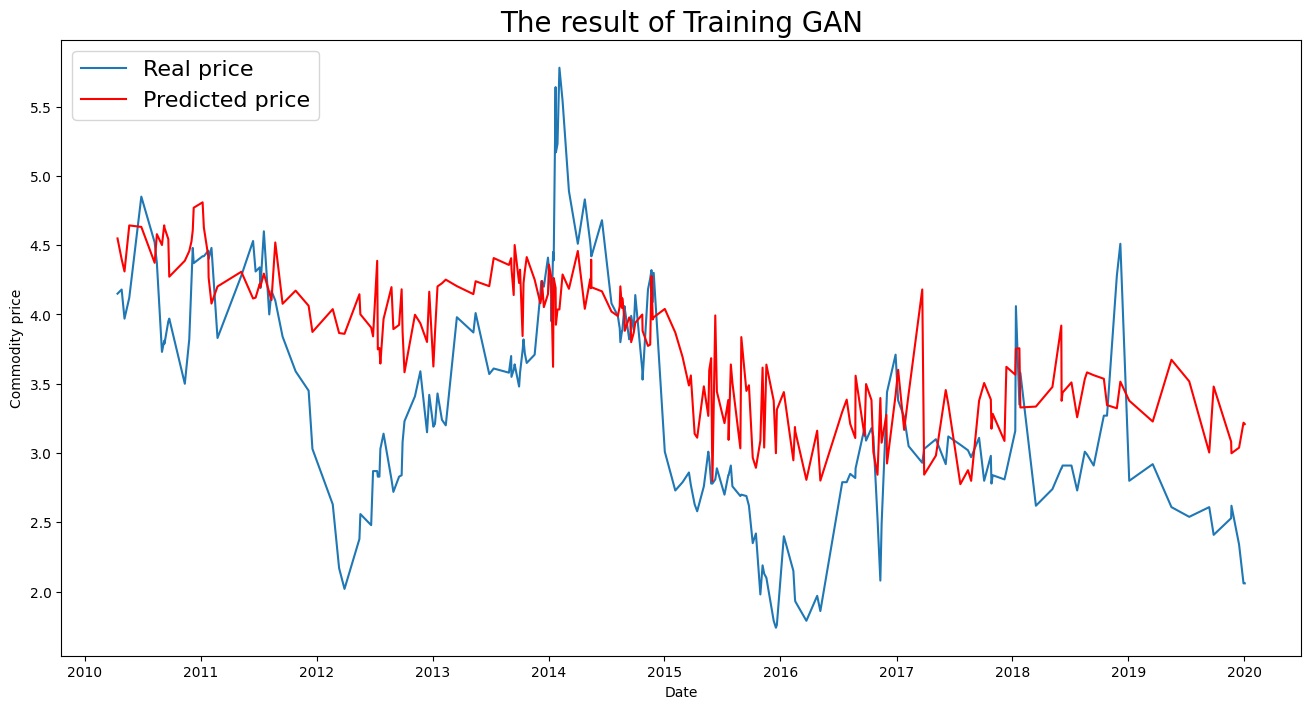

-- Train RMSE --  0.7221949085580359


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------

# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)
test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Commodity price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training GAN", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Train RMSE -- ', RMSE)


### test results GAN LSTM

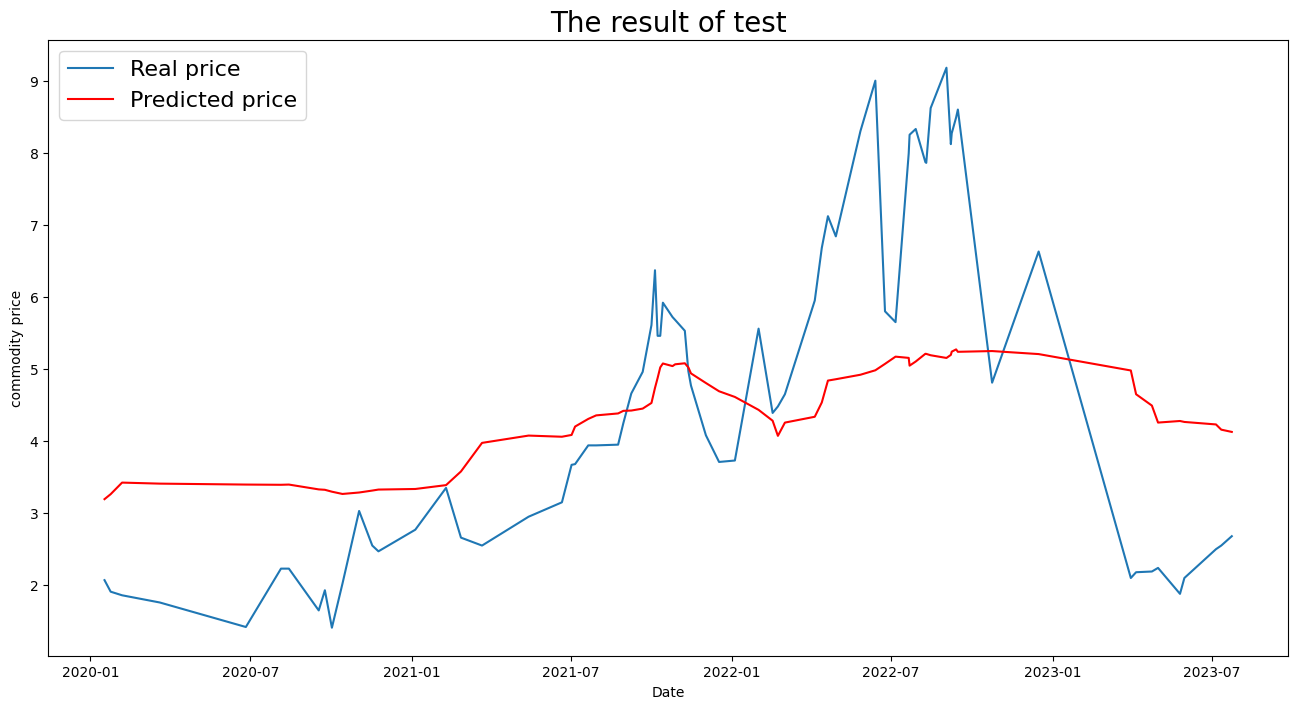

-- RMSE --  1.7950573011837343


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from sklearn.metrics import mean_squared_error


########### Test dataset #########

# Load scaler/ index
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)

# Load test dataset/ model
G_model = tf.keras.models.load_model('gen_model_3_1_299.keras')
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of test", fontsize=20)
    plt.savefig('test_resultGAN.jpg', format='jpeg', dpi=350)
    plt.show()
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- RMSE -- ', RMSE)

    return predict_result, RMSE


test_predicted, test_RMSE = get_test_plot(X_test, y_test)



### export results

In [ ]:
import pandas as pd
from pickle import load


# 1. Reshape and Inverse Transform
y_predicted = G_model(X_test)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(y_predicted.numpy().reshape(-1, 1))  # Reshape and convert to numpy

# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price GAN LSTM'])

# 3. Align Indices (adjust based on your original data index)
# Assuming 'test_predict_index' is available and corresponds to the time index
df_y_test.index = test_predict_index
df_predicted.index = test_predict_index

# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted], axis=1)
combined_df.index.name = 'Date'
print(combined_df.head())  # Display the first few rows

combined_df.to_excel("pred_act_GAN_LSTM_CNN_coal.xlsx")


            Real Price  Predicted Price GAN LSTM
Date                                            
2020-01-17        2.07                  3.193873
2020-01-24        1.91                  3.263188
2020-02-06        1.86                  3.423584
2020-03-20        1.76                  3.409266
2020-06-26        1.42                  3.396316


## LSTM

### Baseline LSTM

Epoch 1/50
4/4 - 8s - loss: 0.1991 - val_loss: 0.3945 - 8s/epoch - 2s/step
Epoch 2/50
4/4 - 0s - loss: 0.4594 - val_loss: 0.4154 - 138ms/epoch - 35ms/step
Epoch 3/50
4/4 - 0s - loss: 0.0973 - val_loss: 0.3271 - 120ms/epoch - 30ms/step
Epoch 4/50
4/4 - 0s - loss: 0.0301 - val_loss: 0.2703 - 115ms/epoch - 29ms/step
Epoch 5/50
4/4 - 0s - loss: 0.0600 - val_loss: 0.2635 - 146ms/epoch - 36ms/step
Epoch 6/50
4/4 - 0s - loss: 0.0255 - val_loss: 0.2536 - 129ms/epoch - 32ms/step
Epoch 7/50
4/4 - 0s - loss: 0.0249 - val_loss: 0.2519 - 138ms/epoch - 34ms/step
Epoch 8/50
4/4 - 0s - loss: 0.0196 - val_loss: 0.2350 - 168ms/epoch - 42ms/step
Epoch 9/50
4/4 - 0s - loss: 0.0130 - val_loss: 0.2192 - 137ms/epoch - 34ms/step
Epoch 10/50
4/4 - 0s - loss: 0.0191 - val_loss: 0.2152 - 145ms/epoch - 36ms/step
Epoch 11/50
4/4 - 0s - loss: 0.0140 - val_loss: 0.2163 - 141ms/epoch - 35ms/step
Epoch 12/50
4/4 - 0s - loss: 0.0115 - val_loss: 0.2110 - 157ms/epoch - 39ms/step
Epoch 13/50
4/4 - 0s - loss: 0.0107 - val_

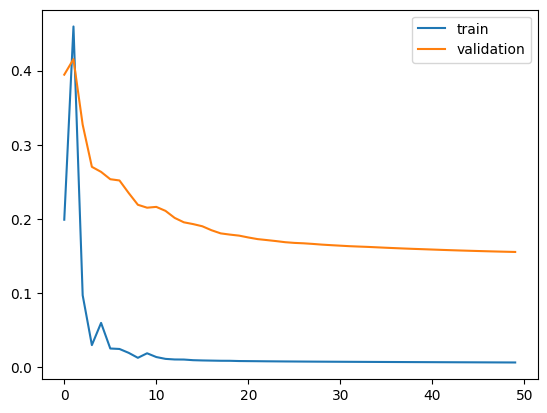

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               181248    
 al)                                                             
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 197761 (772.50 KB)
Trainable params: 197761 (772.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
0.3944492286242884


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot
from pickle import load

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model

model = basic_lstm(input_dim, feature_size)
model.save('LSTM_3to1.keras')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

### plot train result

<ipython-input-21-4795d543c8dd>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-21-4795d543c8dd>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


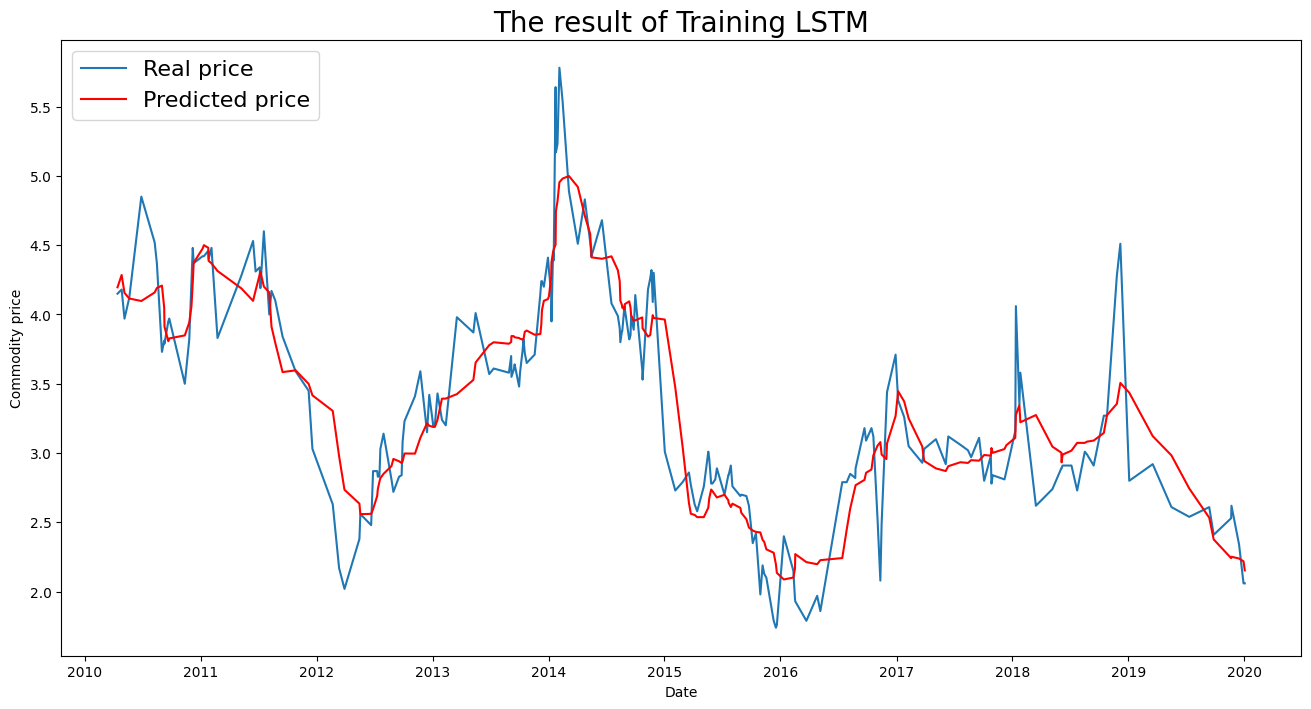

----- Train_RMSE_LSTM ----- 0.3162981499189011


In [ ]:
# %% --------------------------------------- Plot the TRAIN result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):


    train_yhat = model.predict(X_train, verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
    #
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training LSTM", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

### testing results

            predicted_price  predicted_price  predicted_price  \
2022-12-16              NaN              NaN              NaN   
2023-03-31              NaN              NaN              NaN   
2023-04-06              NaN              NaN              NaN   
2023-04-24              NaN              NaN              NaN   
2023-05-01              NaN              NaN              NaN   
2023-05-26              NaN              NaN              NaN   
2023-05-31              NaN              NaN              NaN   
2023-07-06              NaN              NaN              NaN   
2023-07-12              NaN              NaN              NaN   
2023-07-24              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2022-12-16              NaN              NaN              NaN   
2023-03-31              NaN              NaN              NaN   
2023-04-06              NaN              NaN              NaN   
2023-04-24              

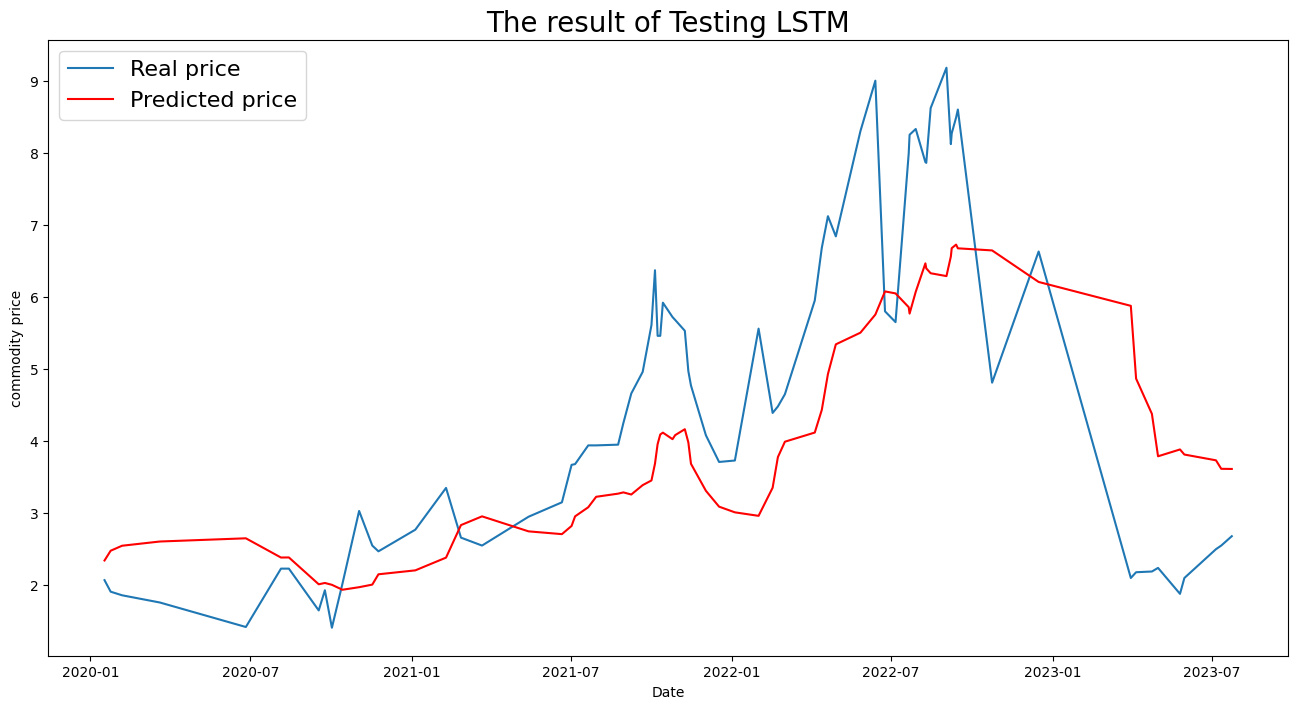

----- Test_RMSE_LSTM ----- 1.5324352720929832


In [ ]:
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    print(predict_result.tail(10))

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing LSTM", fontsize=20)
    plt.savefig('test_resultLSTM_coal.jpg', format='jpeg', dpi=350)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE
test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)

### export results

In [ ]:
import pandas as pd
# 1. Reshape and Inverse Transform
yhat = model.predict(X_test, verbose=0)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(yhat.reshape(-1, 1))  # Reshape
test_dates = dataset.index[-len(y_test):]
# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price'])

df_y_test = pd.DataFrame({'Date': test_dates, 'Real Price': rescaled_y_test.flatten()})
df_predicted_y = pd.DataFrame({'Predicted Value LSTM': rescaled_predicted_y.flatten()})
# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted_y], axis=1)
# Reset the index to make 'Date' a regular column
combined_df = combined_df.reset_index()

# Get the index of the 'Date' column
date_index = combined_df.columns.get_loc('Date')

# Delete the column before 'Date'
if date_index > 0:
  column_to_delete = combined_df.columns[date_index - 1]
  combined_df = combined_df.drop(column_to_delete, axis=1)

# Set 'Date' back as the index
combined_df = combined_df.set_index('Date')


print(combined_df.head())  # Display the first few rows


combined_df.to_excel("pred_act_LSTM_coal.xlsx")

            Real Price  Predicted Value LSTM
Date                                        
2020-01-17        2.07              2.342846
2020-01-24        1.91              2.478431
2020-02-06        1.86              2.547567
2020-03-20        1.76              2.606170
2020-06-26        1.42              2.650719


## GRU

### baseline GRU

Epoch 1/50
2/2 - 7s - loss: 0.3216 - val_loss: 0.3586 - 7s/epoch - 4s/step
Epoch 2/50
2/2 - 0s - loss: 0.2503 - val_loss: 0.3321 - 88ms/epoch - 44ms/step
Epoch 3/50
2/2 - 0s - loss: 0.1932 - val_loss: 0.3072 - 85ms/epoch - 43ms/step
Epoch 4/50
2/2 - 0s - loss: 0.1476 - val_loss: 0.2843 - 114ms/epoch - 57ms/step
Epoch 5/50
2/2 - 0s - loss: 0.1128 - val_loss: 0.2636 - 89ms/epoch - 45ms/step
Epoch 6/50
2/2 - 0s - loss: 0.0878 - val_loss: 0.2451 - 102ms/epoch - 51ms/step
Epoch 7/50
2/2 - 0s - loss: 0.0714 - val_loss: 0.2288 - 155ms/epoch - 78ms/step
Epoch 8/50
2/2 - 0s - loss: 0.0618 - val_loss: 0.2147 - 152ms/epoch - 76ms/step
Epoch 9/50
2/2 - 0s - loss: 0.0573 - val_loss: 0.2026 - 221ms/epoch - 110ms/step
Epoch 10/50
2/2 - 0s - loss: 0.0559 - val_loss: 0.1925 - 99ms/epoch - 49ms/step
Epoch 11/50
2/2 - 0s - loss: 0.0560 - val_loss: 0.1840 - 174ms/epoch - 87ms/step
Epoch 12/50
2/2 - 0s - loss: 0.0562 - val_loss: 0.1770 - 148ms/epoch - 74ms/step
Epoch 13/50
2/2 - 0s - loss: 0.0558 - val_los

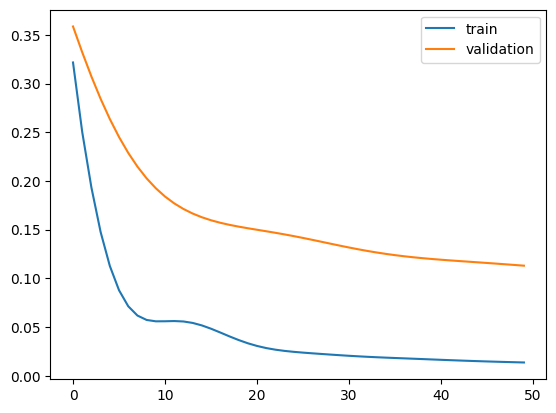

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 3, 128)            68352     
                                                                 
 gru_4 (GRU)                 (None, 64)                37248     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 107713 (420.75 KB)
Trainable params: 107713 (420.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


0.3361913798902894


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot
from pickle import load

# Load data
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

# Parameters
LR = 0.0001
BATCH_SIZE = 128
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]


def basic_GRU(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
    model = Sequential()
    model.add(GRU(units=128, return_sequences = True, input_shape=(input_dim, feature_size)))  # 256, return_sequences = True
    # model.add(GRU(units=256, recurrent_dropout = 0.2)) #, return_sequences = True
    model.add(GRU(units=64, input_shape=(input_dim, feature_size)))
    #model.add(Dense(128))
    model.add(Dense(32))
    # model.add(Dense(32))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate=LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model


model = basic_GRU(input_dim, output_dim, feature_size)
print(model.summary())
model.save('GRU_30to3.h5')

yhat = model.predict(X_test, verbose=0)
# print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)


### plot training

<ipython-input-25-6e68c62c1067>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-25-6e68c62c1067>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


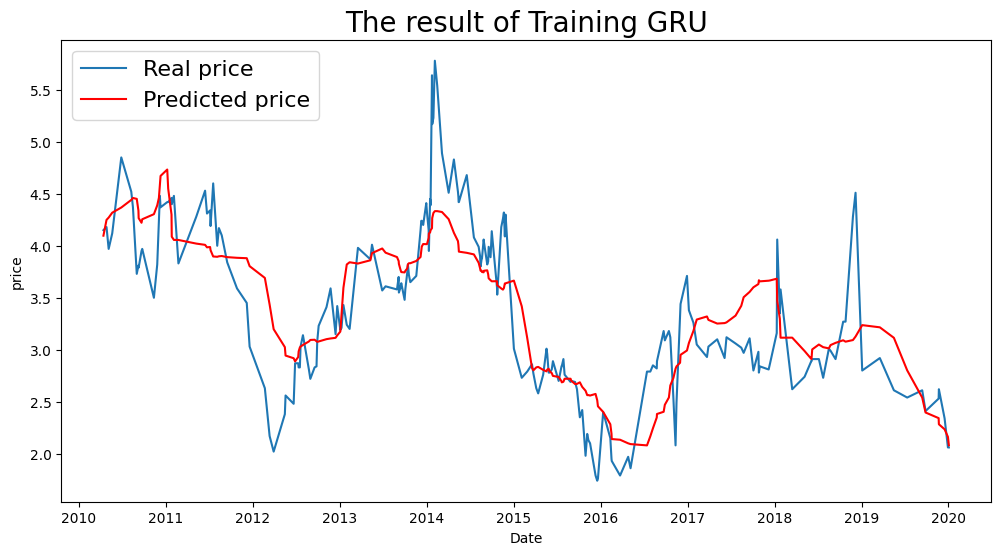

----- Train_RMSE_GRU ----- 0.450789440187299


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):
    train_yhat = model.predict(X_train, verbose=0)

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(12, 6))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training GRU", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_GRU -----", train_RMSE)

### testing results

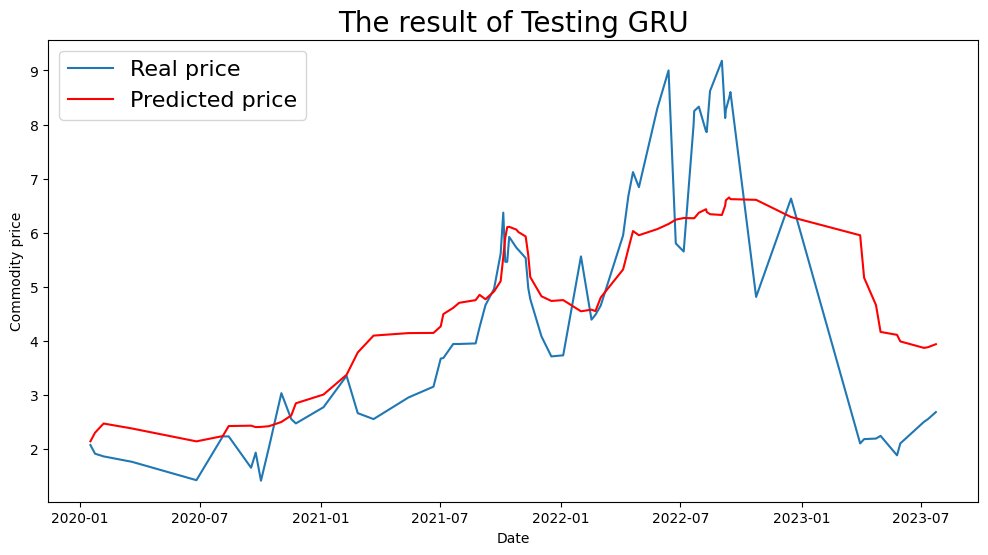

----- Test_RMSE_GRU ----- 1.3061035249120057


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(12, 6))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing GRU", fontsize=20)
    plt.savefig('test_resultGRU_coal.jpg', format='jpeg', dpi=350)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE


test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_GRU -----", test_RMSE)

### export results

In [ ]:
import pandas as pd
# 1. Reshape and Inverse Transform
yhat = model.predict(X_test, verbose=0)
rescaled_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape if needed
rescaled_predicted_y = y_scaler.inverse_transform(yhat.reshape(-1, 1))  # Reshape
test_dates = dataset.index[-len(y_test):]
# 2. Create DataFrames
df_y_test = pd.DataFrame(rescaled_y_test, columns=['Real Price'])
df_predicted = pd.DataFrame(rescaled_predicted_y, columns=['Predicted Price'])

df_y_test = pd.DataFrame({'Date': test_dates, 'Real Price': rescaled_y_test.flatten()})
df_predicted_y = pd.DataFrame({'Predicted Price GRU coal': rescaled_predicted_y.flatten()})
# 4. Concatenate DataFrames
combined_df = pd.concat([df_y_test, df_predicted_y], axis=1)

# Get the index of the 'Date' column
date_index = combined_df.columns.get_loc('Date')

# Delete the column before 'Date'
if date_index > 0:
  column_to_delete = combined_df.columns[date_index - 1]
  combined_df = combined_df.drop(column_to_delete, axis=1)

# Set 'Date' back as the index
combined_df = combined_df.set_index('Date')

print(combined_df.head())  # Display the first few rows


combined_df.to_excel("pred_act_GRU_coal.xlsx")

            Real Price  Predicted Price GRU coal
Date                                            
2020-01-17        2.07                  2.139459
2020-01-24        1.91                  2.298621
2020-02-06        1.86                  2.467924
2020-03-20        1.76                  2.376685
2020-06-26        1.42                  2.138025


### plot all results

In [ ]:
import pandas as pd

# Read the Excel files
df1 = pd.read_excel("pred_act_GAN_LSTM_CNN_coal.xlsx")
df2 = pd.read_excel("pred_act_GAN_GRU_CNN_coal.xlsx")
df3 = pd.read_excel("pred_act_GRU_coal.xlsx")
df4 = pd.read_excel("pred_act_LSTM_coal.xlsx")

# Now merge the dataframes on 'Date' and 'Real Value'
merged_df = df1.merge(df2, on=['Date', 'Real Price'], how='outer')
merged_df = merged_df.merge(df3, on=['Date', 'Real Price'], how='outer')
merged_df = merged_df.merge(df4, on=['Date', 'Real Price'], how='outer')

merged_df = merged_df.fillna(0)  # Replace 0 with an appropriate fill value if necessary

# Write the combined DataFrame to a new Excel file
merged_df.to_excel("all_predictions_coal.xlsx", index=False)

### with macro

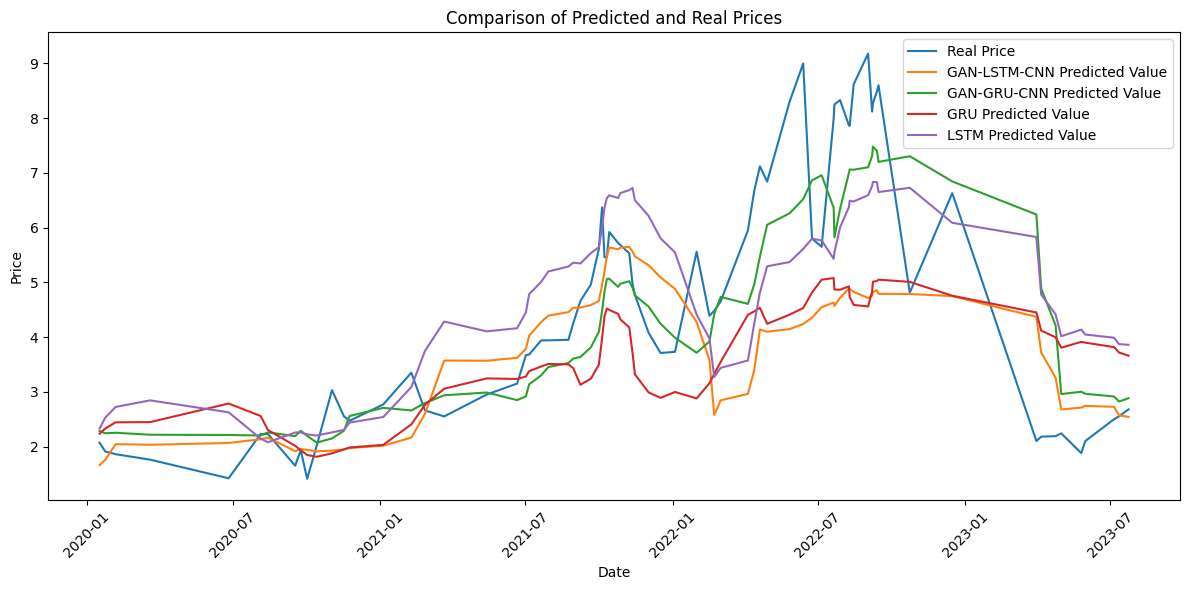

In [ ]:
# prompt: plot merged_df

import pandas as pd
import matplotlib.pyplot as plt
# Read the Excel file
merged_df = pd.read_excel("all_predictions_coal.xlsx")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Real Price'], label='Real Price')
plt.plot(merged_df['Date'], merged_df['Predicted Price GAN LSTM'], label='GAN-LSTM-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Price GAN GRU'], label='GAN-GRU-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Price GRU coal'], label='GRU Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Value LSTM'], label='LSTM Predicted Value')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Comparison of Predicted and Real Prices")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
# Save the plot as JPEG
plt.savefig('price_predictions_comparison_macro_coal.jpeg', format='jpeg', dpi=300)

plt.show()




### plot all

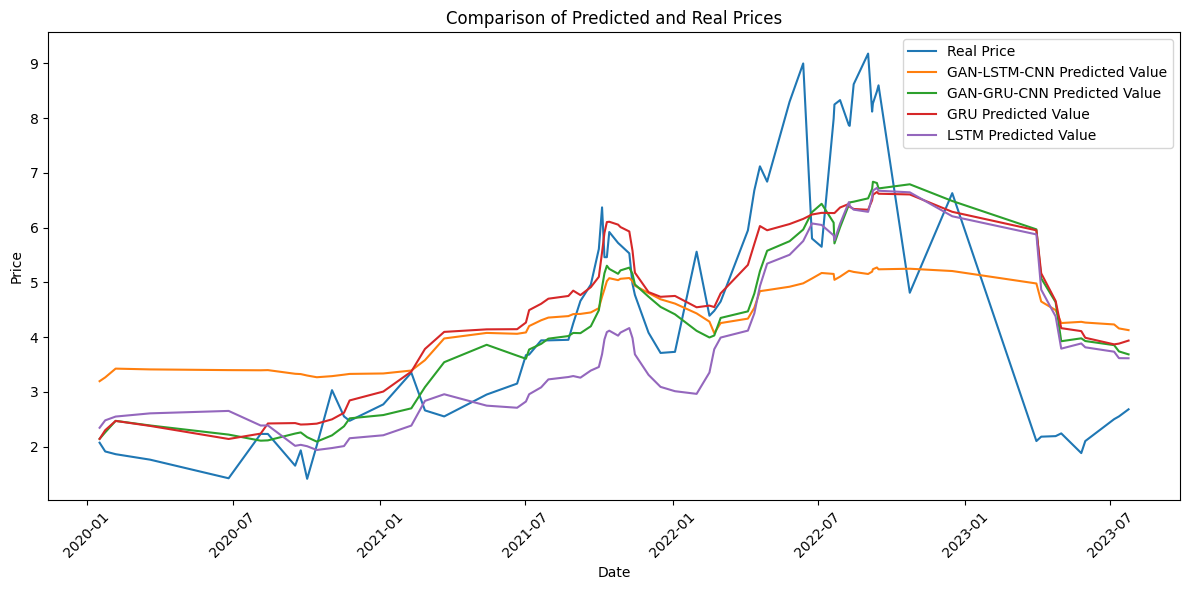

In [ ]:
# prompt: plot merged_df

import pandas as pd
import matplotlib.pyplot as plt
# Read the Excel file
merged_df = pd.read_excel("all_predictions_coal.xlsx")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Real Price'], label='Real Price')
plt.plot(merged_df['Date'], merged_df['Predicted Price GAN LSTM'], label='GAN-LSTM-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Price GAN GRU'], label='GAN-GRU-CNN Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Price GRU coal'], label='GRU Predicted Value')
plt.plot(merged_df['Date'], merged_df['Predicted Value LSTM'], label='LSTM Predicted Value')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Comparison of Predicted and Real Prices")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
# Save the plot as JPEG
plt.savefig('price_predictions_comparison_coal.jpeg', format='jpeg', dpi=300)

plt.show()




# Nouvelle section
# during Russia Ukraine war


# wti

## preprocessing

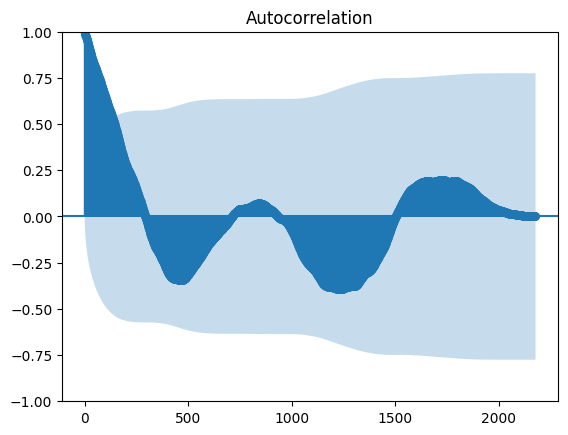

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'Timestamp'

In [ ]:
# %% --------------------------------------- Data Preprocessing  -----------------------------------------------------------------
import pandas as pd
# Set the date to datetime data
datetime_series = pd.to_datetime(dataset['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='date')
dataset = dataset.drop(columns='date')

# Get features and target
X_value = pd.DataFrame(dataset.iloc[:,:])
y_value = pd.DataFrame(dataset.iloc[:, 0])

# Autocorrelation Check
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=len(y_value)-1)
plt.show()

# Normalized the data
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))

# Reshape the data
'''Set the data input steps and output steps,
    we use 30 days data to predict 1 day price here,
    reshape it to (None, input_step, number of features) used for LSTM input'''
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1

# Get X/y dataset
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

# get the train test predict index
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

# %% --------------------------------------- Data Preprocessing  -----------------------------------------------------------------
# ... (rest of your code)

# Split train/test dataset
def split_train_test(data, split_date):
    # Convert the split date to datetime
    split_date = pd.to_datetime(split_date)

    # Find the index corresponding to the split date
    train_size = data[data.index <= split_date].shape[0]  # Assuming 'data' is a DataFrame

    # Split the data
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

# Get data and check shape
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)

# Convert X to a DataFrame before splitting
X_df = pd.DataFrame(X.reshape(X.shape[0], -1))  # Reshape and convert to DataFrame
X_train, X_test, = split_train_test(X_df, '2021-11-28')  # Pass DataFrame to split function

# Convert X_train and X_test back to the original shape
X_train = X_train.values.reshape(X_train.shape[0], n_steps_in, n_features)
X_test = X_test.values.reshape(X_test.shape[0], n_steps_in, n_features)

y_train, y_test, = split_train_test(y, '2021-11-28')
yc_train, yc_test, = split_train_test(yc, '2021-11-28')
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)

# %% --------------------------------------- Save dataset -----------------------------------------------------------------
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("yc_train.npy", yc_train)
np.save("yc_test.npy", yc_test)
np.save('index_train.npy', index_train)
np.save('index_test.npy', index_test)
np.save('train_predict_index.npy', index_train)
np.save('test_predict_index.npy', index_test)



## define GAN GRU CNN

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU,LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error


X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential()
    model.add(GRU(128, input_shape=(input_dim, feature_size), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='linear'))
    return model
def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net


model = make_discriminator_model()
print(model.summary())



/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 2, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 1, 64)               │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 1, 128)              │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 220)                 │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 220)                 │          48,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             221 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,301 (501.18 KB)

 Trainable params: 128,301 (501.18 KB)

 Non-trainable params: 0 (0.00 B)

None


##  train the GAN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 15, D_loss: 1.3803467750549316, G_loss: 0.6966341137886047
Epoch 30, D_loss: 1.3775100708007812, G_loss: 0.6966969966888428
Epoch 45, D_loss: 1.3785814046859741, G_loss: 0.6940974593162537
Epoch 60, D_loss: 1.3754059076309204, G_loss: 0.6961731910705566
Epoch 75, D_loss: 1.370072841644287, G_loss: 0.6951655745506287
Epoch 90, D_loss: 1.3618155717849731, G_loss: 0.6982585787773132
Epoch 105, D_loss: 1.3490889072418213, G_loss: 0.7062148451805115
Epoch 120, D_loss: 1.3383389711380005, G_loss: 0.7145093679428101
Epoch 135, D_loss: 1.3204734325408936, G_loss: 0.7471858859062195
Epoch 150, D_loss: 1.3096530437469482, G_loss: 0.7722611427307129
Epoch 165, D_loss: 1.3011395931243896, G_loss: 0.7937092185020447
Epoch 180, D_loss: 1.3083499670028687, G_loss: 0.824037492275238
Epoch 195, D_loss: 1.3088726997375488, G_loss: 0.8256832361221313
Epoch 210, D_loss: 1.2959178686141968, G_loss: 0.8045027256011963
Epoch 225, D_loss: 1.2941813468933105, G_loss: 0.8174018859863281
Epoch 240, D_loss:

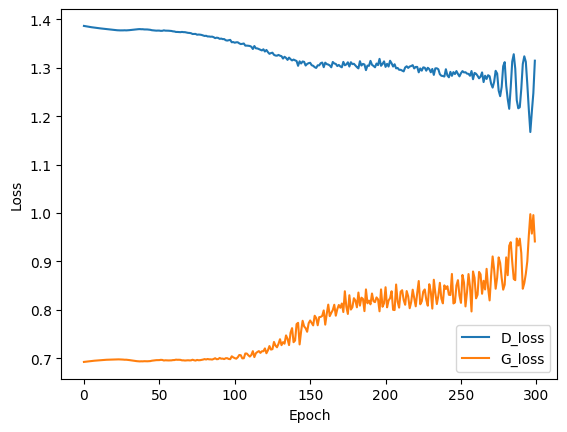

In [ ]:
class GAN:
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(self.generator, 'gen_model_3_1_%d.keras' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                print(f'Epoch {epoch + 1}, D_loss: {loss["d_loss"].numpy()}, G_loss: {loss["g_loss"].numpy()}')

            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price)


if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]

    # For Bayesian
    opt = {"lr": 0.00016, "epoch": 300, 'bs': 128}

    generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, opt)

## plot train results

----- predicted price ----- [[0.28215578]
 [0.34497324]
 [0.3685808 ]
 ...
 [0.8077823 ]
 [0.93549454]
 [0.8699195 ]]
----- rescaled predicted price ----- [[ 65.98993 ]
 [ 71.0348  ]
 [ 72.930725]
 ...
 [108.202995]
 [118.45957 ]
 [113.19323 ]]
----- SHAPE rescaled predicted price ----- (1958, 1)


<ipython-input-43-59c6c035039e>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-43-59c6c035039e>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


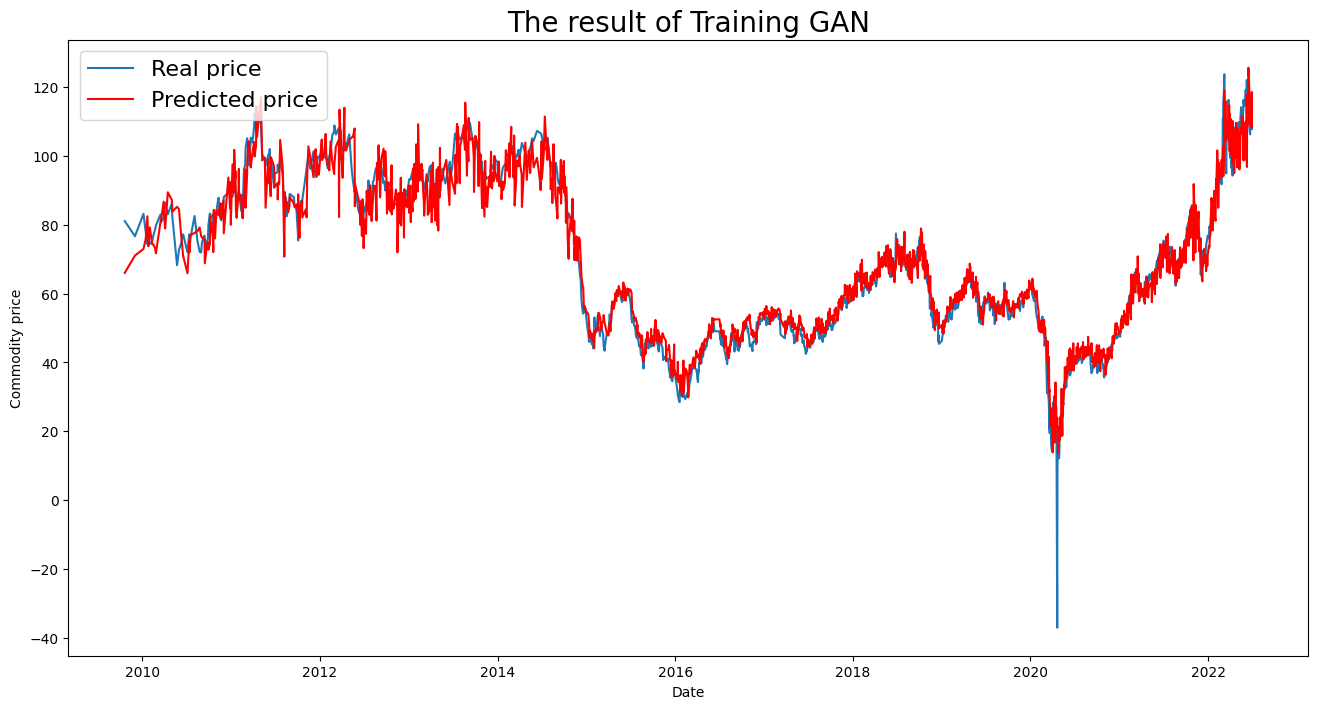

-- Train RMSE --  4.794179448407747


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------

# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("train_predict_index.npy", allow_pickle=True)
test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Commodity price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training GAN", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Train RMSE -- ', RMSE)


## testing GAN

<ipython-input-44-db0841eb51dc>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-44-db0841eb51dc>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


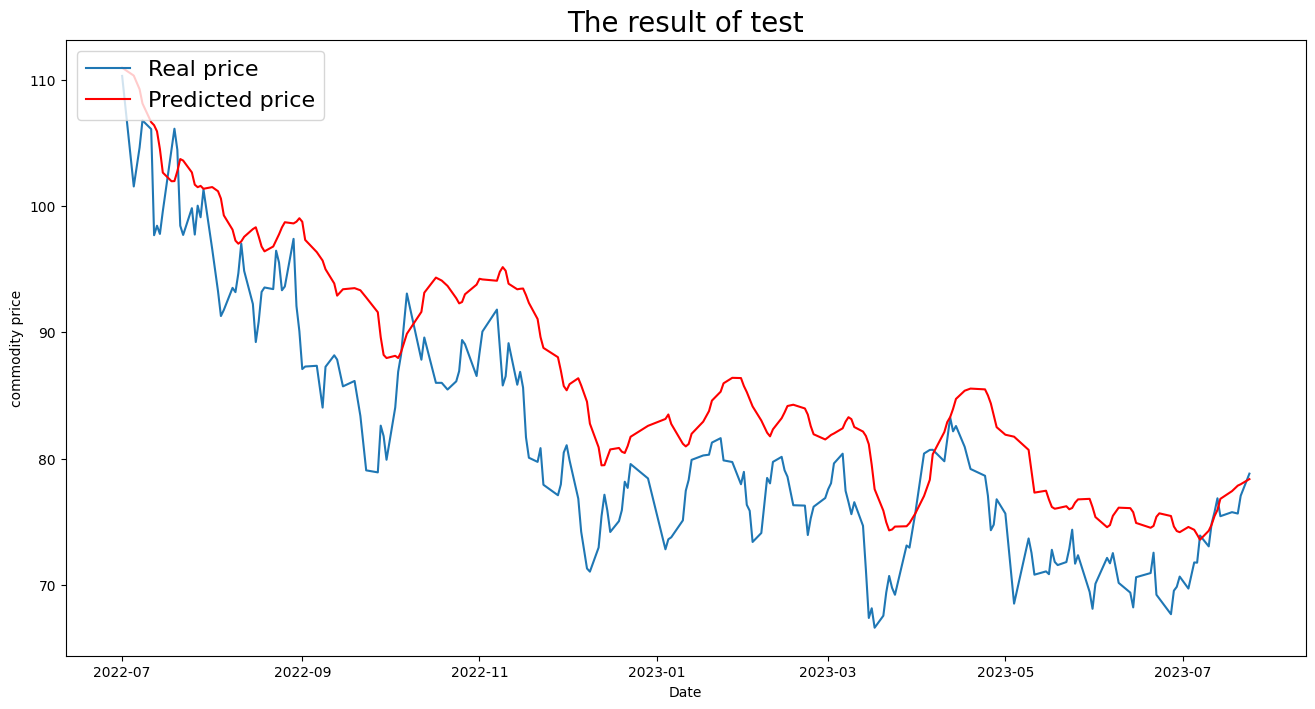

-- RMSE --  6.334062839289751


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from sklearn.metrics import mean_squared_error


########### Test dataset #########

# Load scaler/ index
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)

# Load test dataset/ model
G_model = tf.keras.models.load_model('gen_model_3_1_299.keras')
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)


    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("commodity price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of test", fontsize=20)
    plt.savefig('test_resultGAN.jpg', format='jpeg', dpi=350)
    plt.show()
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- RMSE -- ', RMSE)

    return predict_result, RMSE


test_predicted, test_RMSE = get_test_plot(X_test, y_test)

